In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# Check what I downloaded from NCES
import os
enrollment_files = os.listdir('data/enrollment/')
print("My downloaded enrollment files:")
for file in sorted(enrollment_files):
    print(file)

# Examine the structure of one file to understand the data format
sample_df = pd.read_csv('data/enrollment/ccd_sea_052_1617_l_1a_11212017.csv', sep=',')  # 2016-17 data
print(f"Columns in this dataset: {list(sample_df.columns)}")
print(f"Dataset shape: {sample_df.shape}")
sample_df.head()

My downloaded enrollment files:
.DS_Store
2016-17_SEA_Membership_Companion.xlsx
SY_2023-24_SEA_Membership_Companion_2024-252.xlsx
ccd_sea_052_1617_l_1a_11212017.csv
ccd_sea_052_1718_l_1a_083118
ccd_sea_052_1819_l_1a_091019
ccd_sea_052_1920_l_1a_082120
ccd_sea_052_2021_l_1a_080621
ccd_sea_052_2122_l_1a_071722
ccd_sea_052_2223_l_1a_083023
ccd_sea_052_2324_l_1a_073124
Columns in this dataset: ['SCHOOL_YEAR', 'FIPST', 'STATENAME', 'ST', 'SEA_NAME', 'STATE_AGENCY_NO', 'GRADE', 'RACE_ETHNICITY', 'SEX', 'STUDENT_COUNT', 'TOTAL_INDICATOR', 'DMS_FLAG']
Dataset shape: (14475, 12)


,SCHOOL_YEAR,FIPST,STATENAME,ST,SEA_NAME,STATE_AGENCY_NO,GRADE,RACE_ETHNICITY,SEX,STUDENT_COUNT,TOTAL_INDICATOR,DMS_FLAG
0,2016-2017,1,ALABAMA,AL,Alabama Department Of Education,1,Grade 1,American Indian or Alaska Native,Female,235.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
1,2016-2017,1,ALABAMA,AL,Alabama Department Of Education,1,Grade 1,American Indian or Alaska Native,Male,241.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
2,2016-2017,1,ALABAMA,AL,Alabama Department Of Education,1,Grade 1,Asian,Female,397.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
3,2016-2017,1,ALABAMA,AL,Alabama Department Of Education,1,Grade 1,Asian,Male,404.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
4,2016-2017,1,ALABAMA,AL,Alabama Department Of Education,1,Grade 1,Black or African American,Female,9070.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported


In [86]:
# Examine files without extension
import os

# Check if it's actually a directory or compressed file
file_path = 'data/enrollment/ccd_sea_052_1718_l_1a_083118'

# Check if it's a directory
if os.path.isdir(file_path):
   print(f"{file_path} is a directory containing:")
   for item in os.listdir(file_path):
       print(f"  {item}")
else:
   print(f"{file_path} is a file")
   # Examine first few lines to determine format
   with open(file_path, 'r') as f:
       print("First few lines:")
       for i in range(5):
           try:
               line = f.readline()
               print(repr(line))  # shows tabs/separators clearly
           except:
               print("Cannot read as text - might be compressed")
               break

data/enrollment/ccd_sea_052_1718_l_1a_083118 is a directory containing:
  ccd_sea_052_1718_l_1a_083118.sas7bdat
  ccd_sea_052_1718_l_1a_083118.csv


In [87]:
# Test reading the 2017-18 CSV file
df_2017 = pd.read_csv('data/enrollment/ccd_sea_052_1718_l_1a_083118/ccd_sea_052_1718_l_1a_083118.csv')
print(f"2017-18 Columns: {list(df_2017.columns)}")
print(f"2017-18 Shape: {df_2017.shape}")
df_2017.head()

2017-18 Columns: ['SCHOOL_YEAR', 'FIPST', 'STATENAME', 'ST', 'SEA_NAME', 'STATE_AGENCY_NO', 'GRADE', 'RACE_ETHNICITY', 'SEX', 'STUDENT_COUNT', 'TOTAL_INDICATOR', 'DMS_FLAG']
2017-18 Shape: (14152, 12)


,SCHOOL_YEAR,FIPST,STATENAME,ST,SEA_NAME,STATE_AGENCY_NO,GRADE,RACE_ETHNICITY,SEX,STUDENT_COUNT,TOTAL_INDICATOR,DMS_FLAG
0,2017-2018,1,ALABAMA,AL,Alabama State Department of Education,1,Grade 1,American Indian or Alaska Native,Female,241.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
1,2017-2018,1,ALABAMA,AL,Alabama State Department of Education,1,Grade 1,American Indian or Alaska Native,Male,256.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
2,2017-2018,1,ALABAMA,AL,Alabama State Department of Education,1,Grade 1,Asian,Female,395.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
3,2017-2018,1,ALABAMA,AL,Alabama State Department of Education,1,Grade 1,Asian,Male,397.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
4,2017-2018,1,ALABAMA,AL,Alabama State Department of Education,1,Grade 1,Black or African American,Female,8924.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported


In [88]:
# Check if column structure matches 2016-17
print("Column comparison:")
print("2016-17:", list(sample_df.columns))
print("2017-18:", list(df_2017.columns))

Column comparison:
2016-17: ['SCHOOL_YEAR', 'FIPST', 'STATENAME', 'ST', 'SEA_NAME', 'STATE_AGENCY_NO', 'GRADE', 'RACE_ETHNICITY', 'SEX', 'STUDENT_COUNT', 'TOTAL_INDICATOR', 'DMS_FLAG']
2017-18: ['SCHOOL_YEAR', 'FIPST', 'STATENAME', 'ST', 'SEA_NAME', 'STATE_AGENCY_NO', 'GRADE', 'RACE_ETHNICITY', 'SEX', 'STUDENT_COUNT', 'TOTAL_INDICATOR', 'DMS_FLAG']


In [89]:
# Create function to load enrollment data for all years
def load_enrollment_data():
    enrollment_data = []
    
    # 2016-17 is a direct CSV file
    df_2016 = pd.read_csv('data/enrollment/ccd_sea_052_1617_l_1a_11212017.csv')
    enrollment_data.append(df_2016)
    
    # 2017-18 through 2023-24 are in directories with CSV files inside
    years = ['1718', '1819', '1920', '2021', '2122', '2223', '2324']
    dates = ['083118', '091019', '082120', '080621', '071722', '083023', '073124']
    
    for year, date in zip(years, dates):
        file_path = f'data/enrollment/ccd_sea_052_{year}_l_1a_{date}/ccd_sea_052_{year}_l_1a_{date}.csv'
        df = pd.read_csv(file_path)
        enrollment_data.append(df)
    
    # Combine all years
    all_enrollment = pd.concat(enrollment_data, ignore_index=True)
    return all_enrollment

# Load all enrollment data
enrollment_df = load_enrollment_data()
print(f"Combined enrollment data shape: {enrollment_df.shape}")
print(f"Years included: {sorted(enrollment_df['SCHOOL_YEAR'].unique())}")

Combined enrollment data shape: (114044, 12)
Years included: ['2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024']


In [90]:
# Examine grade categories in the data
print("Unique grade values:")
print(sorted(enrollment_df['GRADE'].unique()))

# Check a few states to understand the data structure
print("\nSample of data:")
print(enrollment_df[enrollment_df['STATENAME'] == 'ALABAMA'].groupby('GRADE')['STUDENT_COUNT'].sum().head(10))

Unique grade values:
['Adult Education', 'Grade 1', 'Grade 10', 'Grade 11', 'Grade 12', 'Grade 13', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8', 'Grade 9', 'Kindergarten', 'No Category Codes', 'Not Specified', 'Pre-Kindergarten', 'Ungraded']

Sample of data:
GRADE
Grade 1     910084.0
Grade 10    896926.0
Grade 11    847570.0
Grade 12    819134.0
Grade 2     890098.0
Grade 3     886976.0
Grade 4     892788.0
Grade 5     897540.0
Grade 6     903050.0
Grade 7     910048.0
Name: STUDENT_COUNT, dtype: float64


In [91]:
# Aggregate enrollment by state, year, and grade
state_enrollment = enrollment_df.groupby(['SCHOOL_YEAR', 'STATENAME', 'GRADE'])['STUDENT_COUNT'].sum().reset_index()

# Create Elementary/Secondary categories to match teacher classifications
def categorize_grade(grade):
    elementary = ['Pre-Kindergarten', 'Kindergarten', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5']
    secondary = ['Grade 6', 'Grade 7', 'Grade 8', 'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12']
    exclude = ['Adult Education', 'Grade 13']  # Remove adult education from K-12 analysis
    
    if grade in elementary:
        return 'Elementary'
    elif grade in secondary:
        return 'Secondary'
    elif grade in exclude:
        return 'Exclude'
    else:
        return 'Other'

state_enrollment['Grade_Category'] = state_enrollment['GRADE'].apply(categorize_grade)
print(state_enrollment['Grade_Category'].value_counts())

# Filter out adult education for K-12 analysis
k12_enrollment = state_enrollment[state_enrollment['Grade_Category'] != 'Exclude'].copy()
print(f"\nAfter excluding adult education: {k12_enrollment.shape[0]} rows")

Grade_Category
Elementary    3164
Secondary     3164
Other         1054
Exclude        113
Name: count, dtype: int64

After excluding adult education: 7382 rows


In [92]:
# Examine what grades are categorized as 'Other'
other_grades = k12_enrollment[k12_enrollment['Grade_Category'] == 'Other']['GRADE'].value_counts()
print("Grades categorized as 'Other':")
print(other_grades)

Grades categorized as 'Other':
GRADE
No Category Codes    452
Not Specified        452
Ungraded             150
Name: count, dtype: int64


In [93]:
# Calculate total enrollment by grade category
enrollment_totals = k12_enrollment.groupby('Grade_Category')['STUDENT_COUNT'].sum()
print("Total enrollment by category:")
for category, total in enrollment_totals.items():
    print(f"{category}: {total:,.0f} students")

# Show percentage breakdown
enrollment_pct = (enrollment_totals / enrollment_totals.sum() * 100).round(1)
print("\nPercentage by category:")
for category, pct in enrollment_pct.items():
    print(f"{category}: {pct}%")

Total enrollment by category:
Elementary: 372,141,730 students
Other: 1,206,439,493 students
Secondary: 426,021,625 students

Percentage by category:
Elementary: 18.6%
Other: 60.2%
Secondary: 21.3%


In [94]:
# Examine the actual student counts for each problematic grade category
other_breakdown = k12_enrollment[k12_enrollment['Grade_Category'] == 'Other'].groupby('GRADE')['STUDENT_COUNT'].sum()
print("Student counts by 'Other' grade categories:")
for grade, count in other_breakdown.items():
    print(f"{grade}: {count:,.0f} students")

Student counts by 'Other' grade categories:
No Category Codes: 1,203,999,690 students
Not Specified: 311,535 students
Ungraded: 2,128,268 students


In [95]:
# Look at a few sample records to understand the data structure
sample_other = k12_enrollment[k12_enrollment['Grade_Category'] == 'Other'].head(10)
print("\nSample 'Other' records:")
print(sample_other[['SCHOOL_YEAR', 'STATENAME', 'GRADE', 'STUDENT_COUNT']])


Sample 'Other' records:
   SCHOOL_YEAR       STATENAME              GRADE  STUDENT_COUNT
13   2016-2017         ALABAMA  No Category Codes      2234790.0
14   2016-2017         ALABAMA      Not Specified            0.0
29   2016-2017          ALASKA  No Category Codes       398211.0
30   2016-2017          ALASKA      Not Specified            0.0
46   2016-2017  AMERICAN SAMOA  No Category Codes            0.0
47   2016-2017  AMERICAN SAMOA      Not Specified            0.0
62   2016-2017         ARIZONA  No Category Codes      3369411.0
63   2016-2017         ARIZONA      Not Specified            0.0
65   2016-2017         ARIZONA           Ungraded          864.0
80   2016-2017        ARKANSAS  No Category Codes      1480343.0


In [96]:
# Check if this is a total/summary row issue
print("Alabama 2016-17 enrollment breakdown:")
alabama_2016 = enrollment_df[(enrollment_df['STATENAME'] == 'ALABAMA') & 
                           (enrollment_df['SCHOOL_YEAR'] == '2016-2017')]
alabama_by_grade = alabama_2016.groupby('GRADE')['STUDENT_COUNT'].sum().sort_values(ascending=False)
print(alabama_by_grade)

Alabama 2016-17 enrollment breakdown:
GRADE
No Category Codes    2234790.0
Grade 9               117584.0
Grade 3               117108.0
Grade 4               115890.0
Grade 2               115216.0
Grade 10              114074.0
Grade 1               113154.0
Grade 5               111596.0
Kindergarten          110948.0
Grade 7               110540.0
Grade 6               110512.0
Grade 8               110110.0
Grade 11              108978.0
Grade 12              104640.0
Pre-Kindergarten       29510.0
Not Specified              0.0
Name: STUDENT_COUNT, dtype: float64


In [97]:
# Compare with individual grade totals
print("\nAlabama individual grades:")
alabama_regular_grades = alabama_2016[alabama_2016['GRADE'].str.startswith('Grade')]
print(alabama_regular_grades.groupby('GRADE')['STUDENT_COUNT'].sum())


Alabama individual grades:
GRADE
Grade 1     113154.0
Grade 10    114074.0
Grade 11    108978.0
Grade 12    104640.0
Grade 2     115216.0
Grade 3     117108.0
Grade 4     115890.0
Grade 5     111596.0
Grade 6     110512.0
Grade 7     110540.0
Grade 8     110110.0
Grade 9     117584.0
Name: STUDENT_COUNT, dtype: float64


In [98]:
# Remove problematic categories that appear to be totals or duplicates
valid_grades = k12_enrollment[~k12_enrollment['GRADE'].isin(['No Category Codes', 'Not Specified'])].copy()

print(f"Valid grades data shape: {valid_grades.shape}")

Valid grades data shape: (6478, 5)


In [99]:
#Examine the remaining 'Other' category
other_breakdown = valid_grades[valid_grades['Grade_Category'] == 'Other'].groupby('GRADE')['STUDENT_COUNT'].sum()
print("Remaining 'Other' grades:")
for grade, count in other_breakdown.items():
    print(f"{grade}: {count:,.0f} students")

# Calculate final percentages
total_clean_enrollment = valid_grades['STUDENT_COUNT'].sum()
enrollment_pct = (valid_grades.groupby('Grade_Category')['STUDENT_COUNT'].sum() / total_clean_enrollment * 100).round(1)
print(f"\nClean enrollment percentages (Total: {total_clean_enrollment:,.0f}):")
for category, pct in enrollment_pct.items():
    print(f"{category}: {pct}%")

Remaining 'Other' grades:
Ungraded: 2,128,268 students

Clean enrollment percentages (Total: 800,291,623):
Elementary: 46.5%
Other: 0.3%
Secondary: 53.2%


In [100]:
# Check ungraded enrollment by state
ungraded_by_state = valid_grades[valid_grades['GRADE'] == 'Ungraded'].groupby('STATENAME')['STUDENT_COUNT'].sum().sort_values(ascending=False)
print("Top 10 states with ungraded students:")
print(ungraded_by_state.head(10))

# Check if certain states consistently report ungraded students
ungraded_states = valid_grades[valid_grades['GRADE'] == 'Ungraded']['STATENAME'].value_counts()
print(f"\nNumber of states reporting ungraded students: {len(ungraded_states)}")
print("States with most ungraded reports:")
print(ungraded_states.head(10))

Top 10 states with ungraded students:
STATENAME
NEW JERSEY       872206.0
NEW YORK         710402.0
PUERTO RICO      156768.0
MISSISSIPPI      118208.0
MICHIGAN          64646.0
KANSAS            55198.0
MASSACHUSETTS     43060.0
CALIFORNIA        29990.0
INDIANA           28456.0
NEVADA            15784.0
Name: STUDENT_COUNT, dtype: float64

Number of states reporting ungraded students: 26
States with most ungraded reports:
STATENAME
ARKANSAS                8
DISTRICT OF COLUMBIA    8
KENTUCKY                8
HAWAII                  8
KANSAS                  8
INDIANA                 8
MASSACHUSETTS           8
NEVADA                  8
MISSISSIPPI             8
MICHIGAN                8
Name: count, dtype: int64


In [101]:
# Check what percentage of each state's total enrollment is ungraded
state_totals = valid_grades.groupby('STATENAME')['STUDENT_COUNT'].sum()
ungraded_pct = (ungraded_by_state / state_totals * 100).round(1)

print("States with highest percentage of ungraded students:")
print(ungraded_pct.sort_values(ascending=False).head(10))

# Check New Jersey specifically - is this realistic?
nj_breakdown = valid_grades[valid_grades['STATENAME'] == 'NEW JERSEY'].groupby('GRADE')['STUDENT_COUNT'].sum().sort_values(ascending=False)
print(f"\nNew Jersey enrollment breakdown:")
print(nj_breakdown.head(10))

States with highest percentage of ungraded students:
STATENAME
NEW JERSEY           3.9
PUERTO RICO          3.4
NEW YORK             1.7
MISSISSIPPI          1.6
KANSAS               0.7
NORTHERN MARIANAS    0.5
MASSACHUSETTS        0.3
MICHIGAN             0.3
HAWAII               0.3
INDIANA              0.2
Name: STUDENT_COUNT, dtype: float64

New Jersey enrollment breakdown:
GRADE
Grade 9     1678960.0
Grade 10    1642442.0
Grade 8     1615746.0
Grade 11    1610414.0
Grade 7     1602200.0
Grade 12    1594434.0
Grade 6     1582094.0
Grade 5     1560436.0
Grade 4     1544602.0
Grade 3     1521786.0
Name: STUDENT_COUNT, dtype: float64


In [102]:
# Check if New Jersey's uniform numbers appear across years
nj_by_year = valid_grades[valid_grades['STATENAME'] == 'NEW JERSEY'].groupby(['SCHOOL_YEAR', 'GRADE'])['STUDENT_COUNT'].sum().unstack(fill_value=0)
print("New Jersey enrollment by year and grade:")
print(nj_by_year)

New Jersey enrollment by year and grade:
GRADE         Grade 1  Grade 10  Grade 11  Grade 12   Grade 2   Grade 3  \
SCHOOL_YEAR                                                               
2016-2017    191624.0  202746.0  199744.0  196980.0  196050.0  200278.0   
2017-2018    189840.0  201562.0  199226.0  197690.0  190506.0  196850.0   
2018-2019    188128.0  202910.0  196510.0  197796.0  188326.0  190580.0   
2019-2020    187344.0  205386.0  199794.0  194990.0  188976.0  190108.0   
2020-2021    182226.0  202786.0  201292.0  199654.0  183252.0  185428.0   
2021-2022    176972.0  201014.0  197632.0  198576.0  181020.0  182652.0   
2022-2023    182818.0  210698.0  199596.0  197004.0  180920.0  183720.0   
2023-2024    188260.0  215340.0  216620.0  211744.0  193904.0  192170.0   

GRADE         Grade 4   Grade 5   Grade 6   Grade 7   Grade 8   Grade 9  \
SCHOOL_YEAR                                                               
2016-2017    203408.0  198854.0  197090.0  201250.0  20040

In [103]:
# Compare with a normal state like California
ca_by_grade = valid_grades[valid_grades['STATENAME'] == 'CALIFORNIA'].groupby('GRADE')['STUDENT_COUNT'].sum().sort_values(ascending=False)
print("California grade distribution:")
print(ca_by_grade.head(10))

California grade distribution:
GRADE
Kindergarten    7636115.0
Grade 12        7360200.0
Grade 9         7343788.0
Grade 10        7340224.0
Grade 11        7167500.0
Grade 8         6998154.0
Grade 7         6933437.0
Grade 6         6869594.0
Grade 5         6829873.0
Grade 4         6727637.0
Name: STUDENT_COUNT, dtype: float64


In [104]:
# Examine the excluded categories by state
excluded_data = k12_enrollment[k12_enrollment['Grade_Category'] == 'Exclude']
excluded_by_state = excluded_data.groupby(['STATENAME', 'GRADE'])['STUDENT_COUNT'].sum().unstack(fill_value=0)
print("Excluded categories by state:")
print(excluded_by_state.head(10))

Excluded categories by state:
Empty DataFrame
Columns: []
Index: []


In [105]:
# Check the original enrollment data for the problematic categories
problem_categories = enrollment_df[enrollment_df['GRADE'].isin(['No Category Codes', 'Not Specified'])]
print(f"Total records with problematic categories: {len(problem_categories)}")

# Look at Alabama specifically
alabama_problems = problem_categories[problem_categories['STATENAME'] == 'ALABAMA']
print("\nAlabama problematic categories:")
print(alabama_problems.groupby(['SCHOOL_YEAR', 'GRADE'])['STUDENT_COUNT'].sum())

Total records with problematic categories: 8588

Alabama problematic categories:
SCHOOL_YEAR  GRADE            
2016-2017    No Category Codes    2234790.0
             Not Specified              0.0
2017-2018    No Category Codes    2227332.0
             Not Specified              0.0
2018-2019    No Category Codes    2219148.0
             Not Specified              0.0
2019-2020    No Category Codes    2232705.0
             Not Specified              0.0
2020-2021    No Category Codes    2203677.0
             Not Specified              0.0
2021-2022    No Category Codes    2244822.0
             Not Specified              0.0
2022-2023    No Category Codes    2252769.0
             Not Specified              0.0
2023-2024    No Category Codes    2245950.0
             Not Specified              0.0
Name: STUDENT_COUNT, dtype: float64


In [106]:
# Check which states have the highest "No Category Codes" numbers
no_category_by_state = problem_categories[problem_categories['GRADE'] == 'No Category Codes'].groupby('STATENAME')['STUDENT_COUNT'].sum().sort_values(ascending=False)
print("\nTop 10 states with 'No Category Codes':")
print(no_category_by_state.head(10))


Top 10 states with 'No Category Codes':
STATENAME
CALIFORNIA        140171096.0
TEXAS             130633785.0
FLORIDA            68165625.0
NEW YORK           63208308.0
ILLINOIS           46231320.0
GEORGIA            42124230.0
PENNSYLVANIA       41109528.0
OHIO               40455402.0
NORTH CAROLINA     37023999.0
MICHIGAN           35339445.0
Name: STUDENT_COUNT, dtype: float64


In [107]:
# Compare Alabama's "No Category Codes" to its actual grade-level totals
alabama_actual_grades = enrollment_df[
    (enrollment_df['STATENAME'] == 'ALABAMA') & 
    (enrollment_df['SCHOOL_YEAR'] == '2016-2017') &
    (~enrollment_df['GRADE'].isin(['No Category Codes', 'Not Specified', 'Adult Education']))
]['STUDENT_COUNT'].sum()

print(f"Alabama 2016-17:")
print(f"'No Category Codes': {2234790:,}")
print(f"Sum of actual grades: {alabama_actual_grades:,}")
print(f"Ratio: {2234790/alabama_actual_grades:.1f}x")

Alabama 2016-17:
'No Category Codes': 2,234,790
Sum of actual grades: 1,489,860.0
Ratio: 1.5x


In [108]:
# Check if these numbers represent demographic totals (summing across race/ethnicity/sex breakdowns)
# Count how many demographic categories exist
alabama_2016_sample = enrollment_df[
    (enrollment_df['STATENAME'] == 'ALABAMA') & 
    (enrollment_df['SCHOOL_YEAR'] == '2016-2017') &
    (enrollment_df['GRADE'] == 'Grade 1')
]
print(f"Grade 1 demographic breakdowns: {len(alabama_2016_sample)} records")
print("Race/ethnicity categories:", alabama_2016_sample['RACE_ETHNICITY'].unique())
print("Sex categories:", alabama_2016_sample['SEX'].unique())

Grade 1 demographic breakdowns: 16 records
Race/ethnicity categories: ['American Indian or Alaska Native' 'Asian' 'Black or African American'
 'Hispanic/Latino' 'Native Hawaiian or Other Pacific Islander'
 'Not Specified' 'Two or more races' 'White' 'No Category Codes']
Sex categories: ['Female' 'Male' 'Not Specified' 'No Category Codes']


In [109]:
# Check what the TOTAL_INDICATOR field contains for "No Category Codes"
no_category_sample = enrollment_df[
    (enrollment_df['STATENAME'] == 'ALABAMA') & 
    (enrollment_df['SCHOOL_YEAR'] == '2016-2017') &
    (enrollment_df['GRADE'] == 'No Category Codes')
]
print(f"\n'No Category Codes' TOTAL_INDICATOR values:")
print(no_category_sample['TOTAL_INDICATOR'].unique())


'No Category Codes' TOTAL_INDICATOR values:
['Derived - Education Unit Total minus Adult Education Count'
 'Derived - Subtotal by Race/Ethnicity and Sex minus Adult Education Count'
 'Education Unit Total']


In [110]:
# Create final clean enrollment dataset excluding ungraded
final_enrollment = valid_grades[valid_grades['Grade_Category'].isin(['Elementary', 'Secondary'])].copy()
print(f"Final enrollment for ratios: {final_enrollment.shape}")
print("Final enrollment totals:")
print(final_enrollment.groupby('Grade_Category')['STUDENT_COUNT'].sum())

Final enrollment for ratios: (6328, 5)
Final enrollment totals:
Grade_Category
Elementary    372141730.0
Secondary     426021625.0
Name: STUDENT_COUNT, dtype: float64


In [111]:
# Load teacher/staff data from your data directory
def load_teacher_data():
    teacher_data = []
    
    # 2016-17 is direct CSV
    df_2016 = pd.read_csv('data/staff_2016-17.csv')
    df_2016['YEAR'] = '2016-2017'
    teacher_data.append(df_2016)
    
    # 2017-18 through 2023-24 are in directories with specific CSV files
    file_mapping = {
        '2017-2018': 'staff_2017-18.txt/ccd_sea_059_1718_l_1a_083118.csv',
        '2018-2019': 'staff_2018-19.txt/ccd_sea_059_1819_l_1a_091019.csv',
        '2019-2020': 'staff_2019-20.txt/ccd_sea_059_1920_l_1a_082120.csv',
        '2020-2021': 'staff_2020-21.txt/ccd_sea_059_2021_l_1a_080621.csv',
        '2021-2022': 'staff_2021-22.txt/ccd_sea_059_2122_l_1a_071722.csv',
        '2022-2023': 'staff_2022-23.txt/ccd_sea_059_2223_l_1a_083023.csv',
        '2023-2024': 'staff_2023-24.txt/ccd_sea_059_2324_l_1a_073124.csv'
    }
    
    for year, filepath in file_mapping.items():
        try:
            df = pd.read_csv(f'data/{filepath}')
            df['YEAR'] = year
            teacher_data.append(df)
            print(f"Loaded {year}: {len(df)} records")
        except Exception as e:
            print(f"Error loading {year}: {e}")
    
    # Combine all years
    all_teachers = pd.concat(teacher_data, ignore_index=True)
    return all_teachers

# Load teacher data
teacher_df = load_teacher_data()
print(f"\nTotal teacher records: {len(teacher_df)}")
print(f"Years included: {sorted(teacher_df['YEAR'].unique())}")

Loaded 2017-2018: 1379 records
Loaded 2018-2019: 1382 records
Loaded 2019-2020: 1436 records
Loaded 2020-2021: 1434 records
Loaded 2021-2022: 1460 records
Loaded 2022-2023: 1457 records
Loaded 2023-2024: 1454 records

Total teacher records: 11407
Years included: ['2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024']


In [112]:
# Examine teacher data structure
print("Teacher data columns:")
print(list(teacher_df.columns))
print(f"\nTeacher data shape: {teacher_df.shape}")

# Check what staff categories are available
print("\nStaff categories:")
print(teacher_df['STAFF'].value_counts())

Teacher data columns:
['SCHOOL_YEAR', 'FIPST', 'STATENAME', 'ST', 'SEA_NAME', 'STATE_AGENCY_NO', 'STAFF', 'STAFF_COUNT', 'TOTAL_INDICATOR', 'DMS_FLAG', 'YEAR']

Teacher data shape: (11407, 11)

Staff categories:
STAFF
All Other Support Staff                                    452
Elementary School Counselors                               452
Elementary Teachers                                        452
Instructional Coordinators and Supervisors to the Staff    452
Kindergarten Teachers                                      452
LEA Administrative Support Staff                           452
LEA Administrators                                         452
Librarians/media specialists                               452
Library/Media Support Staff                                452
Missing                                                    452
Paraprofessionals/Instructional Aides                      452
Pre-kindergarten Teachers                                  452
School Administrative Supp

In [113]:
# Filter for relevant teacher categories (excluding problematic ones)
relevant_teachers = teacher_df[teacher_df['STAFF'].isin(['Elementary Teachers', 'Secondary Teachers'])].copy()

print(f"Relevant teacher records: {len(relevant_teachers)}")
print("Teacher categories for ratios:")
print(relevant_teachers['STAFF'].value_counts())

# Check for any missing data
print(f"\nMissing teacher counts: {relevant_teachers['STAFF_COUNT'].isna().sum()}")

# Aggregate teacher data by state and year
teacher_totals = relevant_teachers.groupby(['YEAR', 'STATENAME', 'STAFF'])['STAFF_COUNT'].sum().reset_index()
print(f"Teacher totals shape: {teacher_totals.shape}")
print(teacher_totals.head())

Relevant teacher records: 904
Teacher categories for ratios:
STAFF
Elementary Teachers    452
Secondary Teachers     452
Name: count, dtype: int64

Missing teacher counts: 30
Teacher totals shape: (904, 4)
        YEAR       STATENAME                STAFF  STAFF_COUNT
0  2016-2017         ALABAMA  Elementary Teachers     16936.40
1  2016-2017         ALABAMA   Secondary Teachers     20056.80
2  2016-2017          ALASKA  Elementary Teachers      3453.08
3  2016-2017          ALASKA   Secondary Teachers      3754.45
4  2016-2017  AMERICAN SAMOA  Elementary Teachers         0.00


In [114]:
# Check which records have missing teacher data
missing_teachers = relevant_teachers[relevant_teachers['STAFF_COUNT'].isna()]
print("Records with missing teacher counts:")
print(missing_teachers[['YEAR', 'STATENAME', 'STAFF']].value_counts())

# Remove missing data from teacher totals
clean_teacher_totals = teacher_totals[teacher_totals['STAFF_COUNT'].notna()].copy()
print(f"\nClean teacher records: {len(clean_teacher_totals)} (removed {len(teacher_totals) - len(clean_teacher_totals)} missing)")

Records with missing teacher counts:
YEAR       STATENAME                                 STAFF              
2016-2017  AMERICAN SAMOA                            Elementary Teachers    1
                                                     Secondary Teachers     1
           BUREAU OF INDIAN EDUCATION                Elementary Teachers    1
                                                     Secondary Teachers     1
           DEPARTMENT OF DEFENSE EDUCATION ACTIVITY  Elementary Teachers    1
                                                     Secondary Teachers     1
2017-2018  AMERICAN SAMOA                            Elementary Teachers    1
                                                     Secondary Teachers     1
           BUREAU OF INDIAN EDUCATION                Elementary Teachers    1
                                                     Secondary Teachers     1
2018-2019  AMERICAN SAMOA                            Elementary Teachers    1
                                

In [115]:
# Check the actual values in STAFF_COUNT for missing records
print("Sample of missing teacher data:")
print(relevant_teachers[relevant_teachers['STAFF_COUNT'].isna()]['STAFF_COUNT'].head())

# Also check for zero values that might represent missing data
print("Zero teacher counts:")
zero_teachers = relevant_teachers[relevant_teachers['STAFF_COUNT'] == 0]
print(zero_teachers[['YEAR', 'STATENAME', 'STAFF']].head(10))

# Remove both NaN and zero values
clean_teacher_totals = teacher_totals[(teacher_totals['STAFF_COUNT'].notna()) & (teacher_totals['STAFF_COUNT'] > 0)].copy()
print(f"\nAfter removing NaN and zeros: {len(clean_teacher_totals)} records")

Sample of missing teacher data:
1260   NaN
1274   NaN
1284   NaN
1298   NaN
1308   NaN
Name: STAFF_COUNT, dtype: float64
Zero teacher counts:
Empty DataFrame
Columns: [YEAR, STATENAME, STAFF]
Index: []

After removing NaN and zeros: 874 records


In [116]:
# First create the CATEGORY column by mapping teacher staff types
teacher_category_map = {'Elementary Teachers': 'Elementary', 'Secondary Teachers': 'Secondary'}
clean_teacher_totals['CATEGORY'] = clean_teacher_totals['STAFF'].map(teacher_category_map)

print("Teacher data with CATEGORY column:")
print(clean_teacher_totals.head())
print(f"Categories: {clean_teacher_totals['CATEGORY'].unique()}")

Teacher data with CATEGORY column:
        YEAR STATENAME                STAFF  STAFF_COUNT    CATEGORY
0  2016-2017   ALABAMA  Elementary Teachers     16936.40  Elementary
1  2016-2017   ALABAMA   Secondary Teachers     20056.80   Secondary
2  2016-2017    ALASKA  Elementary Teachers      3453.08  Elementary
3  2016-2017    ALASKA   Secondary Teachers      3754.45   Secondary
6  2016-2017   ARIZONA  Elementary Teachers     30243.03  Elementary
Categories: ['Elementary' 'Secondary']


In [117]:
# Check for dramatic drops in teacher counts that indicate data quality issues
teacher_drops = []

for state in clean_teacher_totals['STATENAME'].unique():
    for category in clean_teacher_totals['CATEGORY'].unique():
        state_category_data = clean_teacher_totals[
            (clean_teacher_totals['STATENAME'] == state) & 
            (clean_teacher_totals['CATEGORY'] == category)
        ].sort_values('YEAR')
        
        if len(state_category_data) > 1:
            for i in range(1, len(state_category_data)):
                prev_count = state_category_data.iloc[i-1]['STAFF_COUNT']
                curr_count = state_category_data.iloc[i]['STAFF_COUNT']
                
                if prev_count > 1000:  # Only check states with substantial baseline
                    pct_change = ((curr_count - prev_count) / prev_count) * 100
                    if pct_change < -50:  # Drops exceeding 50%
                        teacher_drops.append({
                            'STATE': state,
                            'CATEGORY': category,
                            'YEAR_FROM': state_category_data.iloc[i-1]['YEAR'],
                            'YEAR_TO': state_category_data.iloc[i]['YEAR'],
                            'COUNT_FROM': prev_count,
                            'COUNT_TO': curr_count,
                            'PCT_CHANGE': pct_change
                        })

drops_df = pd.DataFrame(teacher_drops)
if len(drops_df) > 0:
    print("Dramatic teacher count drops (likely data quality issues):")
    print(drops_df.sort_values('PCT_CHANGE'))
else:
    print("No dramatic drops detected in teacher data")

Dramatic teacher count drops (likely data quality issues):
                        STATE   CATEGORY  YEAR_FROM    YEAR_TO  COUNT_FROM  \
0  BUREAU OF INDIAN EDUCATION  Secondary  2021-2022  2022-2023     1027.84   

   COUNT_TO  PCT_CHANGE  
0    458.12  -55.428861  


In [118]:
# Remove the dramatic drop record
clean_teacher_totals = clean_teacher_totals[
    ~((clean_teacher_totals['STATENAME'] == 'BUREAU OF INDIAN EDUCATION') & 
      (clean_teacher_totals['CATEGORY'] == 'Secondary') & 
      (clean_teacher_totals['YEAR'] == '2022-2023'))
].copy()

print(f"After removing dramatic drop: {len(clean_teacher_totals)} teacher records")

After removing dramatic drop: 873 teacher records


In [119]:
# Quick verification - check the data is ready for merging
print("Clean teacher data ready for ratios:")
print(clean_teacher_totals.groupby('CATEGORY')['STAFF_COUNT'].sum())

Clean teacher data ready for ratios:
CATEGORY
Elementary    12113611.77
Secondary     10082505.02
Name: STAFF_COUNT, dtype: float64


In [120]:
# Check what problematic categories exist in teacher data
print("All teacher staff categories:")
print(teacher_df['STAFF'].value_counts())

# Remove "No Category Codes" and other problematic categories from teacher data
problematic_teacher_categories = ['No Category Codes', 'Missing']
clean_teacher_totals = clean_teacher_totals[
    ~clean_teacher_totals['STAFF'].isin(problematic_teacher_categories)
].copy()

print(f"\nAfter removing problematic categories: {len(clean_teacher_totals)} records")
print("Remaining teacher categories:")
print(clean_teacher_totals['STAFF'].value_counts())

All teacher staff categories:
STAFF
All Other Support Staff                                    452
Elementary School Counselors                               452
Elementary Teachers                                        452
Instructional Coordinators and Supervisors to the Staff    452
Kindergarten Teachers                                      452
LEA Administrative Support Staff                           452
LEA Administrators                                         452
Librarians/media specialists                               452
Library/Media Support Staff                                452
Missing                                                    452
Paraprofessionals/Instructional Aides                      452
Pre-kindergarten Teachers                                  452
School Administrative Support Staff                        452
School administrators                                      452
School Counselors                                          452
Secondary School Co

In [121]:
# Aggregate enrollment data to match teacher structure
enrollment_totals = final_enrollment.groupby(['SCHOOL_YEAR', 'STATENAME', 'Grade_Category'])['STUDENT_COUNT'].sum().reset_index()
enrollment_totals = enrollment_totals.rename(columns={
    'SCHOOL_YEAR': 'YEAR',
    'Grade_Category': 'CATEGORY'
})

print(f"Enrollment totals shape: {enrollment_totals.shape}")

# Merge teacher and enrollment data
ratios_data = pd.merge(clean_teacher_totals, enrollment_totals, 
                      on=['YEAR', 'STATENAME', 'CATEGORY'], 
                      how='inner')

print(f"Merged data shape: {ratios_data.shape}")

# Calculate teacher-student ratios
ratios_data['TEACHER_STUDENT_RATIO'] = ratios_data['STUDENT_COUNT'] / ratios_data['STAFF_COUNT']

print("Sample ratios:")
print(ratios_data[['YEAR', 'STATENAME', 'CATEGORY', 'STAFF_COUNT', 'STUDENT_COUNT', 'TEACHER_STUDENT_RATIO']].head())

Enrollment totals shape: (904, 4)
Merged data shape: (873, 6)
Sample ratios:
        YEAR STATENAME    CATEGORY  STAFF_COUNT  STUDENT_COUNT  \
0  2016-2017   ALABAMA  Elementary     16936.40       713422.0   
1  2016-2017   ALABAMA   Secondary     20056.80       776438.0   
2  2016-2017    ALASKA  Elementary      3453.08       130768.0   
3  2016-2017    ALASKA   Secondary      3754.45       134706.0   
4  2016-2017   ARIZONA  Elementary     30243.03      1046762.0   

   TEACHER_STUDENT_RATIO  
0              42.123592  
1              38.711958  
2              37.869960  
3              35.879024  
4              34.611677  


In [122]:
# Check a specific example - Alabama 2016-17 Elementary
print("Alabama 2016-17 Elementary breakdown:")
print(f"Teachers: {16936.40:,.1f}")
print(f"Students: {713422:,.0f}")
print(f"Ratio: {713422/16936.40:.1f} students per teacher")

# This should be closer to 15-20 students per teacher for realistic class sizes
# Let's check if we're missing teacher categories

# Look at total teachers vs specific categories for Alabama
alabama_all_teachers = teacher_df[
    (teacher_df['STATENAME'] == 'ALABAMA') & 
    (teacher_df['YEAR'] == '2016-2017') & 
    (teacher_df['STAFF'] == 'Teachers')
]['STAFF_COUNT'].sum()

print(f"\nAlabama 2016-17 Total Teachers: {alabama_all_teachers:,.1f}")
print(f"Elementary + Secondary: {16936.40 + 20056.80:,.1f}")
print(f"Missing teacher categories: {alabama_all_teachers - (16936.40 + 20056.80):,.1f}")

Alabama 2016-17 Elementary breakdown:
Teachers: 16,936.4
Students: 713,422
Ratio: 42.1 students per teacher

Alabama 2016-17 Total Teachers: 42,532.9
Elementary + Secondary: 36,993.2
Missing teacher categories: 5,539.8


In [123]:
# Look at all teacher categories for Alabama to see what we're missing
alabama_all_categories = teacher_df[
    (teacher_df['STATENAME'] == 'ALABAMA') & 
    (teacher_df['YEAR'] == '2016-2017')
][['STAFF', 'STAFF_COUNT']].sort_values('STAFF_COUNT', ascending=False)

print("All Alabama 2016-17 teacher categories:")
print(alabama_all_categories)

All Alabama 2016-17 teacher categories:
                                                STAFF  STAFF_COUNT
23                                  No Category Codes     87251.13
22                                           Teachers     42532.95
0                             All Other Support Staff     20784.11
20                                        Other Staff     20784.11
16                                 Secondary Teachers     20056.80
21                                       School Staff     18467.96
2                                 Elementary Teachers     16936.40
10              Paraprofessionals/Instructional Aides      6872.86
4                               Kindergarten Teachers      4690.95
13                              School administrators      4415.74
19                                          LEA Staff      3680.28
17                     Student Support Services Staff      3044.60
12                School Administrative Support Staff      2588.92
5                    L

In [124]:
# Include Kindergarten Teachers with Elementary
relevant_teacher_categories = ['Elementary Teachers', 'Secondary Teachers', 'Kindergarten Teachers']

# Filter teacher data to include Kindergarten
expanded_teachers = teacher_df[teacher_df['STAFF'].isin(relevant_teacher_categories)].copy()

# Remove missing data
expanded_teachers_clean = expanded_teachers[(expanded_teachers['STAFF_COUNT'].notna()) & (expanded_teachers['STAFF_COUNT'] > 0)].copy()

# Map categories
teacher_category_map = {
    'Elementary Teachers': 'Elementary', 
    'Secondary Teachers': 'Secondary',
    'Kindergarten Teachers': 'Elementary'  # Include K with Elementary
}
expanded_teachers_clean['CATEGORY'] = expanded_teachers_clean['STAFF'].map(teacher_category_map)

# Aggregate by state, year, category
expanded_teacher_totals = expanded_teachers_clean.groupby(['YEAR', 'STATENAME', 'CATEGORY'])['STAFF_COUNT'].sum().reset_index()

print(f"Expanded teacher data shape: {expanded_teacher_totals.shape}")

# Check Alabama again
alabama_elementary_total = expanded_teacher_totals[
    (expanded_teacher_totals['YEAR'] == '2016-2017') & 
    (expanded_teacher_totals['STATENAME'] == 'ALABAMA') & 
    (expanded_teacher_totals['CATEGORY'] == 'Elementary')
]['STAFF_COUNT'].iloc[0]

print(f"Alabama Elementary + K Teachers: {alabama_elementary_total:,.1f}")
print(f"New ratio: {713422/alabama_elementary_total:.1f} students per teacher")

Expanded teacher data shape: (874, 4)
Alabama Elementary + K Teachers: 21,627.4
New ratio: 33.0 students per teacher


In [125]:
# Merge with enrollment data using the expanded teacher dataset
ratios_data_v2 = pd.merge(expanded_teacher_totals, enrollment_totals, 
                         on=['YEAR', 'STATENAME', 'CATEGORY'], 
                         how='inner')

# Calculate ratios
ratios_data_v2['TEACHER_STUDENT_RATIO'] = ratios_data_v2['STUDENT_COUNT'] / ratios_data_v2['STAFF_COUNT']

print(f"Final ratios dataset shape: {ratios_data_v2.shape}")
print("\nUpdated ratio summary:")
print(ratios_data_v2['TEACHER_STUDENT_RATIO'].describe().round(1))

print("\nRatios by category:")
print(ratios_data_v2.groupby('CATEGORY')['TEACHER_STUDENT_RATIO'].agg(['mean', 'median']).round(1))

print("\nSample of improved ratios:")
print(ratios_data_v2[['YEAR', 'STATENAME', 'CATEGORY', 'STAFF_COUNT', 'STUDENT_COUNT', 'TEACHER_STUDENT_RATIO']].head())

Final ratios dataset shape: (874, 6)

Updated ratio summary:
count    874.0
mean      34.4
std       12.9
min        0.0
25%       26.2
50%       31.7
75%       40.0
max       83.3
Name: TEACHER_STUDENT_RATIO, dtype: float64

Ratios by category:
            mean  median
CATEGORY                
Elementary  26.5    26.6
Secondary   42.2    39.4

Sample of improved ratios:
        YEAR STATENAME    CATEGORY  STAFF_COUNT  STUDENT_COUNT  \
0  2016-2017   ALABAMA  Elementary     21627.35       713422.0   
1  2016-2017   ALABAMA   Secondary     20056.80       776438.0   
2  2016-2017    ALASKA  Elementary      3911.10       130768.0   
3  2016-2017    ALASKA   Secondary      3754.45       134706.0   
4  2016-2017   ARIZONA  Elementary     32763.35      1046762.0   

   TEACHER_STUDENT_RATIO  
0              32.987028  
1              38.711958  
2              33.435095  
3              35.879024  
4              31.949175  


In [126]:
# Check the extreme values
print("States with lowest ratios (possible data errors):")
low_ratios = ratios_data_v2[ratios_data_v2['TEACHER_STUDENT_RATIO'] < 5]
print(low_ratios[['YEAR', 'STATENAME', 'CATEGORY', 'STAFF_COUNT', 'STUDENT_COUNT', 'TEACHER_STUDENT_RATIO']])

print("\nStates with highest ratios:")
high_ratios = ratios_data_v2[ratios_data_v2['TEACHER_STUDENT_RATIO'] > 60]
print(high_ratios[['YEAR', 'STATENAME', 'CATEGORY', 'STAFF_COUNT', 'STUDENT_COUNT', 'TEACHER_STUDENT_RATIO']])

# Look at some typical large states for comparison
typical_states = ['CALIFORNIA', 'TEXAS', 'FLORIDA', 'NEW YORK']
sample_states = ratios_data_v2[ratios_data_v2['STATENAME'].isin(typical_states)]
print(f"\nSample ratios from major states:")
print(sample_states.groupby(['STATENAME', 'CATEGORY'])['TEACHER_STUDENT_RATIO'].mean().round(1))

States with lowest ratios (possible data errors):
          YEAR STATENAME    CATEGORY  STAFF_COUNT  STUDENT_COUNT  \
786  2023-2024      GUAM  Elementary        745.0            0.0   
787  2023-2024      GUAM   Secondary        897.0            0.0   

     TEACHER_STUDENT_RATIO  
786                    0.0  
787                    0.0  

States with highest ratios:
          YEAR                   STATENAME   CATEGORY  STAFF_COUNT  \
5    2016-2017                     ARIZONA  Secondary     15084.87   
9    2016-2017                  CALIFORNIA  Secondary     86139.96   
37   2016-2017                    KENTUCKY  Secondary     10058.31   
77   2016-2017                      OREGON  Secondary      8667.17   
113  2017-2018                     ARIZONA  Secondary     14568.66   
117  2017-2018                  CALIFORNIA  Secondary     85849.37   
145  2017-2018                    KENTUCKY  Secondary     10092.41   
185  2017-2018                      OREGON  Secondary      8751.50   

In [127]:
# Check what other instructional categories exist in your data
instructional_categories = teacher_df[teacher_df['STAFF'].str.contains('Teacher|Librarian|Instructional', case=False, na=False)]['STAFF'].unique()
print("All instructional staff categories:")
for category in sorted(instructional_categories):
    print(f"  {category}")

# Calculate what percentage of total teachers you're currently using
current_teachers = expanded_teacher_totals[expanded_teacher_totals['YEAR'] == '2016-2017']['STAFF_COUNT'].sum()
total_all_teachers = teacher_df[(teacher_df['YEAR'] == '2016-2017') & (teacher_df['STAFF'] == 'Teachers')]['STAFF_COUNT'].sum()
print(f"\nYou're using {current_teachers/total_all_teachers*100:.1f}% of total teachers")

All instructional staff categories:
  Elementary Teachers
  Instructional Coordinators and Supervisors to the Staff
  Kindergarten Teachers
  Librarians/media specialists
  Paraprofessionals/Instructional Aides
  Pre-kindergarten Teachers
  Secondary Teachers
  Teachers
  Ungraded Teachers

You're using 92.3% of total teachers


In [128]:
# Calculate total teacher-student ratios using all teachers
total_teachers = teacher_df[teacher_df['STAFF'] == 'Teachers'].copy()
total_teachers_clean = total_teachers[(total_teachers['STAFF_COUNT'].notna()) & (total_teachers['STAFF_COUNT'] > 0)].copy()

# Get total enrollment by state and year (sum elementary + secondary)
total_enrollment = final_enrollment.groupby(['SCHOOL_YEAR', 'STATENAME'])['STUDENT_COUNT'].sum().reset_index()
total_enrollment = total_enrollment.rename(columns={'SCHOOL_YEAR': 'YEAR'})

# Merge total teachers with total enrollment
total_ratios = pd.merge(total_teachers_clean, total_enrollment, 
                       on=['YEAR', 'STATENAME'], how='inner')

total_ratios['TOTAL_RATIO'] = total_ratios['STUDENT_COUNT'] / total_ratios['STAFF_COUNT']

print("Total teacher-student ratios summary:")
print(total_ratios['TOTAL_RATIO'].describe().round(1))

# Check by year to see if there's a trend
print("\nTotal ratios by year:")
yearly_ratios = total_ratios.groupby('YEAR')['TOTAL_RATIO'].agg(['mean', 'median']).round(1)
print(yearly_ratios)

# Compare with 2006-07 reference (15.5 national average)
print(f"\n2006-07 reference: 15.5 students per teacher")
print(f"Your data average: {total_ratios['TOTAL_RATIO'].mean():.1f} students per teacher")

# Check specific states from the 2006-07 data
reference_states = ['ALABAMA', 'CALIFORNIA', 'NEW YORK', 'TEXAS']
sample_total = total_ratios[total_ratios['STATENAME'].isin(reference_states)]
print("\nSample states total ratios (2016-2017):")
sample_2016 = sample_total[sample_total['YEAR'] == '2016-2017']
for _, row in sample_2016.iterrows():
    print(f"{row['STATENAME']}: {row['TOTAL_RATIO']:.1f}")

Total teacher-student ratios summary:
count    437.0
mean      29.7
std        6.0
min        0.0
25%       25.6
50%       28.8
75%       32.8
max       47.1
Name: TOTAL_RATIO, dtype: float64

Total ratios by year:
           mean  median
YEAR                   
2016-2017  30.5    29.6
2017-2018  30.6    29.7
2018-2019  30.2    29.6
2019-2020  30.1    29.3
2020-2021  29.1    28.3
2021-2022  29.2    28.2
2022-2023  29.1    28.2
2023-2024  28.6    27.8

2006-07 reference: 15.5 students per teacher
Your data average: 29.7 students per teacher

Sample states total ratios (2016-2017):
ALABAMA: 35.0
CALIFORNIA: 46.2
NEW YORK: 25.6
TEXAS: 30.4


In [129]:
# Check which states have problematic ratios
problem_ratios = total_ratios[total_ratios['TOTAL_RATIO'] == 0.0]
print("States with 0.0 ratios (enrollment but no teachers):")
print(problem_ratios[['YEAR', 'STATENAME', 'STAFF_COUNT', 'STUDENT_COUNT']])

# Check if any companion documentation files might explain the methodology
print(f"\nYour companion files:")
companion_files = [f for f in os.listdir('data/') if 'companion' in f.lower()]
for file in companion_files:
    print(f"  {file}")

States with 0.0 ratios (enrollment but no teachers):
          YEAR STATENAME  STAFF_COUNT  STUDENT_COUNT
433  2023-2024      GUAM       1684.0            0.0

Your companion files:
  staff_companion_2022-23.xlsx
  staff_companion_2014-15.xlsx
  staff_companion_2023-24.xlsx


In [130]:
# Check if the companion files explain the discrepancy
# Let's examine the 2023-24 companion file first
companion_2023 = pd.read_excel('data/staff_companion_2023-24.xlsx')
print("2023-24 Companion file contents:")
print(companion_2023.head())
print(f"Shape: {companion_2023.shape}")

# Look for any methodology notes or definitions
if 'Definition' in companion_2023.columns or 'Note' in companion_2023.columns:
    print("\nDefinitions/Notes found in companion file")
else:
    print(f"\nColumns in companion file: {list(companion_2023.columns)}")

2023-24 Companion file contents:
  Product Title Final Common Core of Data - SEA Staffing Unnamed: 2  \
0   School Year                                2023-2024        NaN   
1     Filenames             ccd_sea_059_2324_l_1a_073124        NaN   
2           NaN                                      NaN        NaN   
3    As-of date             All data as of July 31, 2024        NaN   
4           NaN                                      NaN        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
Shape: (31, 5)

Columns in companion file: ['Product Title', 'Final Common Core of Data - SEA Staffing', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


In [131]:
# Compare your teacher counts to the NCES reference table
reference_2022 = {
    'ALABAMA': 42022,
    'CALIFORNIA': 267659, 
    'NEW YORK': 215761,
    'TEXAS': 373332
}

your_2022_teachers = total_ratios[total_ratios['YEAR'] == '2022-2023']
for state in reference_2022.keys():
    if len(your_2022_teachers[your_2022_teachers['STATENAME'] == state]) > 0:
        your_count = your_2022_teachers[your_2022_teachers['STATENAME'] == state]['STAFF_COUNT'].iloc[0]
        nces_count = reference_2022[state]
        print(f"{state}: Your data {your_count:,.0f} vs NCES {nces_count:,} ({your_count/nces_count:.1%})")
    else:
        print(f"{state}: No data in your dataset")

ALABAMA: Your data 42,022 vs NCES 42,022 (100.0%)
CALIFORNIA: Your data 267,659 vs NCES 267,659 (100.0%)
NEW YORK: Your data 215,761 vs NCES 215,761 (100.0%)
TEXAS: Your data 373,332 vs NCES 373,332 (100.0%)


In [132]:
# Compare your enrollment counts to NCES reference
reference_enrollment_2022 = {
    'ALABAMA': 750923,
    'CALIFORNIA': 5851877,
    'NEW YORK': 2532888,
    'TEXAS': 5519599
}

your_2022_enrollment = total_ratios[total_ratios['YEAR'] == '2022-2023']
for state in reference_enrollment_2022.keys():
    if len(your_2022_enrollment[your_2022_enrollment['STATENAME'] == state]) > 0:
        your_count = your_2022_enrollment[your_2022_enrollment['STATENAME'] == state]['STUDENT_COUNT'].iloc[0]
        nces_count = reference_enrollment_2022[state]
        print(f"{state}: Your data {your_count:,.0f} vs NCES {nces_count:,} ({your_count/nces_count:.1%})")
        print(f"  Your ratio: {your_count/your_2022_enrollment[your_2022_enrollment['STATENAME'] == state]['STAFF_COUNT'].iloc[0]:.1f}")
        print(f"  NCES ratio: {nces_count/reference_2022[state]:.1f}")
    else:
        print(f"{state}: No data in your enrollment dataset")

ALABAMA: Your data 1,501,846 vs NCES 750,923 (200.0%)
  Your ratio: 35.7
  NCES ratio: 17.9
CALIFORNIA: Your data 5,851,877 vs NCES 5,851,877 (100.0%)
  Your ratio: 21.9
  NCES ratio: 21.9
NEW YORK: Your data 4,983,514 vs NCES 2,532,888 (196.8%)
  Your ratio: 23.1
  NCES ratio: 11.7
TEXAS: Your data 11,039,198 vs NCES 5,519,599 (200.0%)
  Your ratio: 29.6
  NCES ratio: 14.8


In [133]:
# Check if you're double-counting demographic breakdowns
print("Sample Alabama enrollment data structure:")
alabama_sample = final_enrollment[
    (final_enrollment['SCHOOL_YEAR'] == '2022-2023') & 
    (final_enrollment['STATENAME'] == 'ALABAMA')
]
print(f"Alabama raw records: {len(alabama_sample)}")
print(f"Alabama total you calculated: {alabama_sample['STUDENT_COUNT'].sum():,.0f}")
print(f"NCES official total: 750,923")

# Check if the original enrollment_df had the correct totals before your aggregation
original_alabama = enrollment_df[
    (enrollment_df['SCHOOL_YEAR'] == '2022-2023') & 
    (enrollment_df['STATENAME'] == 'ALABAMA')
]
print(f"\nOriginal Alabama records before filtering: {len(original_alabama)}")

# Check for duplication in your aggregation
print(f"\nAlabama by grade category:")
print(alabama_sample.groupby('Grade_Category')['STUDENT_COUNT'].sum())

Sample Alabama enrollment data structure:
Alabama raw records: 14
Alabama total you calculated: 1,501,846
NCES official total: 750,923

Original Alabama records before filtering: 243

Alabama by grade category:
Grade_Category
Elementary    716918.0
Secondary     784928.0
Name: STUDENT_COUNT, dtype: float64


In [134]:
# Check if you're double-counting demographic breakdowns
print("Sample Alabama enrollment data structure:")
alabama_sample = final_enrollment[
    (final_enrollment['SCHOOL_YEAR'] == '2022-2023') & 
    (final_enrollment['STATENAME'] == 'ALABAMA')
]
print(f"Alabama raw records: {len(alabama_sample)}")
print(f"Alabama total you calculated: {alabama_sample['STUDENT_COUNT'].sum():,.0f}")
print(f"NCES official total: 750,923")

# Check if the original enrollment_df had the correct totals before your aggregation
original_alabama = enrollment_df[
    (enrollment_df['SCHOOL_YEAR'] == '2022-2023') & 
    (enrollment_df['STATENAME'] == 'ALABAMA')
]
print(f"\nOriginal Alabama records before filtering: {len(original_alabama)}")

# Check for duplication in your aggregation
print(f"\nAlabama by grade category:")
print(alabama_sample.groupby('Grade_Category')['STUDENT_COUNT'].sum())

Sample Alabama enrollment data structure:
Alabama raw records: 14
Alabama total you calculated: 1,501,846
NCES official total: 750,923

Original Alabama records before filtering: 243

Alabama by grade category:
Grade_Category
Elementary    716918.0
Secondary     784928.0
Name: STUDENT_COUNT, dtype: float64


In [135]:
# Examine the original Alabama data before any aggregation
print("Original Alabama 2022-23 sample:")
alabama_orig = enrollment_df[
    (enrollment_df['SCHOOL_YEAR'] == '2022-2023') & 
    (enrollment_df['STATENAME'] == 'ALABAMA')
]
print(alabama_orig[['GRADE', 'RACE_ETHNICITY', 'SEX', 'STUDENT_COUNT']].head(10))

# Check if the total of original records matches NCES
orig_total = alabama_orig['STUDENT_COUNT'].sum()
print(f"\nOriginal Alabama total (all 243 records): {orig_total:,.0f}")
print(f"NCES official: 750,923")
print(f"Match: {orig_total == 750923}")

# Find where the doubling occurs
print(f"\nYour aggregated total: {1501846:,.0f}")
print(f"Ratio: {1501846/orig_total:.1f}x original")

Original Alabama 2022-23 sample:
         GRADE                             RACE_ETHNICITY     SEX  \
85270  Grade 1           American Indian or Alaska Native  Female   
85271  Grade 1           American Indian or Alaska Native    Male   
85272  Grade 1                                      Asian  Female   
85273  Grade 1                                      Asian    Male   
85274  Grade 1                  Black or African American  Female   
85275  Grade 1                  Black or African American    Male   
85276  Grade 1                            Hispanic/Latino  Female   
85277  Grade 1                            Hispanic/Latino    Male   
85278  Grade 1  Native Hawaiian or Other Pacific Islander  Female   
85279  Grade 1  Native Hawaiian or Other Pacific Islander    Male   

       STUDENT_COUNT  
85270          183.0  
85271          179.0  
85272          400.0  
85273          381.0  
85274         8811.0  
85275         9810.0  
85276         3209.0  
85277         3398.0  


In [136]:
# Look for summary/total records in the original Alabama data
print("Unique TOTAL_INDICATOR values in original Alabama data:")
print(alabama_orig['TOTAL_INDICATOR'].value_counts())

# Check if there are total records that should be used instead of demographic breakdowns
total_records = alabama_orig[alabama_orig['TOTAL_INDICATOR'].str.contains('Total|total', na=False)]
print(f"\nRecords with 'Total' in TOTAL_INDICATOR: {len(total_records)}")
if len(total_records) > 0:
    print(total_records[['GRADE', 'RACE_ETHNICITY', 'SEX', 'STUDENT_COUNT', 'TOTAL_INDICATOR']].head())

# Calculate what the total would be if we only used specific total categories
if len(total_records) > 0:
    total_from_totals = total_records['STUDENT_COUNT'].sum()
    print(f"\nSum of 'Total' records: {total_from_totals:,.0f}")
    print(f"NCES official: 750,923")

Unique TOTAL_INDICATOR values in original Alabama data:
TOTAL_INDICATOR
Category Set A - By Race/Ethnicity; Sex; Grade                              211
Derived - Subtotal by Race/Ethnicity and Sex minus Adult Education Count     15
Subtotal 4 - By Grade                                                        15
Derived - Education Unit Total minus Adult Education Count                    1
Education Unit Total                                                          1
Name: count, dtype: int64

Records with 'Total' in TOTAL_INDICATOR: 32
                   GRADE                    RACE_ETHNICITY                SEX  \
85481  No Category Codes                 No Category Codes  No Category Codes   
85482  No Category Codes  American Indian or Alaska Native             Female   
85483  No Category Codes  American Indian or Alaska Native               Male   
85484  No Category Codes                             Asian             Female   
85485  No Category Codes                            

In [137]:
# Extract only the correct total records for enrollment
enrollment_totals_correct = enrollment_df[
    enrollment_df['TOTAL_INDICATOR'] == 'Derived - Education Unit Total minus Adult Education Count'
].copy()

print(f"Correct enrollment records: {len(enrollment_totals_correct)}")

# Check Alabama specifically
alabama_correct = enrollment_totals_correct[
    (enrollment_totals_correct['SCHOOL_YEAR'] == '2022-2023') & 
    (enrollment_totals_correct['STATENAME'] == 'ALABAMA')
]
print(f"Alabama correct total: {alabama_correct['STUDENT_COUNT'].iloc[0]:,.0f}")

# Recalculate total ratios with correct enrollment data
total_ratios_correct = pd.merge(total_teachers_clean, 
                               enrollment_totals_correct[['SCHOOL_YEAR', 'STATENAME', 'STUDENT_COUNT']].rename(columns={'SCHOOL_YEAR': 'YEAR'}),
                               on=['YEAR', 'STATENAME'], how='inner')

total_ratios_correct['TOTAL_RATIO'] = total_ratios_correct['STUDENT_COUNT'] / total_ratios_correct['STAFF_COUNT']

print(f"\nCorrected ratios summary:")
print(total_ratios_correct['TOTAL_RATIO'].describe().round(1))

# Check the sample states
sample_corrected = total_ratios_correct[total_ratios_correct['YEAR'] == '2022-2023']
for state in ['ALABAMA', 'CALIFORNIA', 'NEW YORK', 'TEXAS']:
    if len(sample_corrected[sample_corrected['STATENAME'] == state]) > 0:
        ratio = sample_corrected[sample_corrected['STATENAME'] == state]['TOTAL_RATIO'].iloc[0]
        print(f"{state}: {ratio:.1f}")

Correct enrollment records: 452
Alabama correct total: 750,923

Corrected ratios summary:
count    436.0
mean      14.9
std        2.9
min        7.0
25%       12.9
50%       14.4
75%       16.5
max       23.6
Name: TOTAL_RATIO, dtype: float64
ALABAMA: 17.9
CALIFORNIA: 21.9
NEW YORK: 11.7
TEXAS: 14.8


In [138]:
# Analyze ratio trends over time (2016-2024)
yearly_trends = total_ratios_correct.groupby('YEAR')['TOTAL_RATIO'].agg(['mean', 'median', 'std', 'count']).round(1)
print("Teacher-Student Ratio Trends (2016-2024):")
print(yearly_trends)

# Calculate year-over-year changes
yearly_means = yearly_trends['mean']
yearly_changes = yearly_means.diff()
print(f"\nYear-over-year changes in average ratio:")
for year, change in yearly_changes.items():
    if not pd.isna(change):
        direction = "↑" if change > 0 else "↓"
        print(f"{year}: {change:+.1f} {direction}")

# Check COVID period specifically (2019-20 to 2021-22)
covid_period = total_ratios_correct[total_ratios_correct['YEAR'].isin(['2019-2020', '2020-2021', '2021-2022'])]
covid_trends = covid_period.groupby('YEAR')['TOTAL_RATIO'].mean()
print(f"\nCOVID period ratios:")
for year, ratio in covid_trends.items():
    print(f"{year}: {ratio:.1f}")

# Calculate overall trend from 2016 to 2024
ratio_2016 = yearly_means['2016-2017']
ratio_2024 = yearly_means['2023-2024'] 
total_change = ratio_2024 - ratio_2016
print(f"\nOverall trend (2016-2024):")
print(f"2016-17: {ratio_2016:.1f}")
print(f"2023-24: {ratio_2024:.1f}")
print(f"Total change: {total_change:+.1f} ({total_change/ratio_2016*100:+.1f}%)")

Teacher-Student Ratio Trends (2016-2024):
           mean  median  std  count
YEAR                               
2016-2017  15.3    14.8  2.8     54
2017-2018  15.3    14.9  2.9     54
2018-2019  15.2    14.8  3.1     55
2019-2020  15.1    14.7  3.0     55
2020-2021  14.6    14.2  2.8     53
2021-2022  14.6    14.1  3.0     55
2022-2023  14.8    14.1  2.9     55
2023-2024  14.6    14.0  2.9     55

Year-over-year changes in average ratio:
2017-2018: +0.0 ↓
2018-2019: -0.1 ↓
2019-2020: -0.1 ↓
2020-2021: -0.5 ↓
2021-2022: +0.0 ↓
2022-2023: +0.2 ↑
2023-2024: -0.2 ↓

COVID period ratios:
2019-2020: 15.1
2020-2021: 14.6
2021-2022: 14.6

Overall trend (2016-2024):
2016-17: 15.3
2023-24: 14.6
Total change: -0.7 (-4.6%)


In [139]:
# Check what key variables are loaded
print("Available dataframes:")
for var in ['total_ratios_correct', 'enrollment_df', 'teacher_df']:
    if var in locals():
        print(f"✓ {var}")
    else:
        print(f"✗ {var} - need to reload")

Available dataframes:
✓ total_ratios_correct
✓ enrollment_df
✓ teacher_df


In [140]:
# Get correct enrollment totals by grade level using "Subtotal 4 - By Grade"
grade_totals = enrollment_df[
    enrollment_df['TOTAL_INDICATOR'] == 'Subtotal 4 - By Grade'
].copy()

print(f"Grade-level enrollment records: {len(grade_totals)}")
print("Available grades:")
print(grade_totals['GRADE'].value_counts())

Grade-level enrollment records: 7043
Available grades:
GRADE
Grade 1             452
Grade 10            452
Grade 11            452
Grade 12            452
Grade 2             452
Grade 3             452
Grade 4             452
Grade 5             452
Grade 6             452
Grade 7             452
Grade 8             452
Grade 9             452
Kindergarten        452
Not Specified       452
Pre-Kindergarten    452
Ungraded            150
Adult Education      82
Grade 13             31
Name: count, dtype: int64


In [141]:
# Map grades using NCES methodology (pre-K, K, elementary 1-8, secondary 9-12)
def categorize_grade_nces(grade):
    if grade == 'Pre-Kindergarten':
        return 'Pre-K'
    elif grade == 'Kindergarten':
        return 'Kindergarten'
    elif grade in ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8']:
        return 'Elementary'
    elif grade in ['Grade 9', 'Grade 10', 'Grade 11', 'Grade 12']:
        return 'Secondary'
    else:
        return 'Other'

grade_totals['Grade_Category'] = grade_totals['GRADE'].apply(categorize_grade_nces)

# Check the breakdown
print("Grade categories (NCES methodology):")
print(grade_totals['Grade_Category'].value_counts())

# Aggregate by state, year, and grade category
enrollment_by_category = grade_totals.groupby(['SCHOOL_YEAR', 'STATENAME', 'Grade_Category'])['STUDENT_COUNT'].sum().reset_index()
enrollment_by_category = enrollment_by_category.rename(columns={'SCHOOL_YEAR': 'YEAR'})

print(f"\nEnrollment by category records: {len(enrollment_by_category)}")
print(enrollment_by_category.head())

Grade categories (NCES methodology):
Grade_Category
Elementary      3616
Secondary       1808
Other            715
Kindergarten     452
Pre-K            452
Name: count, dtype: int64

Enrollment by category records: 2260
        YEAR STATENAME Grade_Category  STUDENT_COUNT
0  2016-2017   ALABAMA     Elementary       452063.0
1  2016-2017   ALABAMA   Kindergarten        55474.0
2  2016-2017   ALABAMA          Other            0.0
3  2016-2017   ALABAMA          Pre-K        14755.0
4  2016-2017   ALABAMA      Secondary       222638.0


In [142]:
# Get teacher data that matches these grade categories
# For Elementary and Secondary, I can use existing categories
# For Pre-K and Kindergarten, I need separate teacher categories

elementary_secondary_teachers = teacher_df[teacher_df['STAFF'].isin(['Elementary Teachers', 'Secondary Teachers'])].copy()
prekindergarten_teachers = teacher_df[teacher_df['STAFF'] == 'Pre-kindergarten Teachers'].copy()
kindergarten_teachers = teacher_df[teacher_df['STAFF'] == 'Kindergarten Teachers'].copy()

# Clean missing data from all teacher categories
elementary_secondary_clean = elementary_secondary_teachers[(elementary_secondary_teachers['STAFF_COUNT'].notna()) & (elementary_secondary_teachers['STAFF_COUNT'] > 0)].copy()
prekindergarten_clean = prekindergarten_teachers[(prekindergarten_teachers['STAFF_COUNT'].notna()) & (prekindergarten_teachers['STAFF_COUNT'] > 0)].copy()
kindergarten_clean = kindergarten_teachers[(kindergarten_teachers['STAFF_COUNT'].notna()) & (kindergarten_teachers['STAFF_COUNT'] > 0)].copy()

# Map teacher categories to match enrollment categories
teacher_category_map = {'Elementary Teachers': 'Elementary', 'Secondary Teachers': 'Secondary', 'Pre-kindergarten Teachers': 'Pre-K', 'Kindergarten Teachers': 'Kindergarten'}

elementary_secondary_clean['Grade_Category'] = elementary_secondary_clean['STAFF'].map(teacher_category_map)
prekindergarten_clean['Grade_Category'] = 'Pre-K'
kindergarten_clean['Grade_Category'] = 'Kindergarten'

# Combine all teacher data
all_teachers_by_category = pd.concat([elementary_secondary_clean, prekindergarten_clean, kindergarten_clean], ignore_index=True)

# Aggregate teacher data by state, year, and category
teachers_by_category = all_teachers_by_category.groupby(['YEAR', 'STATENAME', 'Grade_Category'])['STAFF_COUNT'].sum().reset_index()

print(f"Teachers by category records: {len(teachers_by_category)}")
print("Teacher categories:")
print(teachers_by_category['Grade_Category'].value_counts())
print(teachers_by_category.head())

Teachers by category records: 1740
Teacher categories:
Grade_Category
Elementary      437
Kindergarten    437
Secondary       437
Pre-K           429
Name: count, dtype: int64
        YEAR STATENAME Grade_Category  STAFF_COUNT
0  2016-2017   ALABAMA     Elementary     16936.40
1  2016-2017   ALABAMA   Kindergarten      4690.95
2  2016-2017   ALABAMA          Pre-K       848.80
3  2016-2017   ALABAMA      Secondary     20056.80
4  2016-2017    ALASKA     Elementary      3453.08


In [143]:
# Merge teacher and enrollment data by category
ratios_by_category = pd.merge(teachers_by_category, enrollment_by_category, 
                             on=['YEAR', 'STATENAME', 'Grade_Category'], 
                             how='inner')

# Calculate teacher-student ratios
ratios_by_category['TEACHER_STUDENT_RATIO'] = ratios_by_category['STUDENT_COUNT'] / ratios_by_category['STAFF_COUNT']

print(f"Ratios by category records: {len(ratios_by_category)}")

# Check sample ratios
print("Sample ratios by category:")
print(ratios_by_category[['YEAR', 'STATENAME', 'Grade_Category', 'STAFF_COUNT', 'STUDENT_COUNT', 'TEACHER_STUDENT_RATIO']].head(10))

# Summary statistics by category
print("\nRatio summary by educational level:")
category_summary = ratios_by_category.groupby('Grade_Category')['TEACHER_STUDENT_RATIO'].agg(['mean', 'median', 'std', 'count']).round(1)
print(category_summary)

Ratios by category records: 1740
Sample ratios by category:
        YEAR STATENAME Grade_Category  STAFF_COUNT  STUDENT_COUNT  \
0  2016-2017   ALABAMA     Elementary     16936.40       452063.0   
1  2016-2017   ALABAMA   Kindergarten      4690.95        55474.0   
2  2016-2017   ALABAMA          Pre-K       848.80        14755.0   
3  2016-2017   ALABAMA      Secondary     20056.80       222638.0   
4  2016-2017    ALASKA     Elementary      3453.08        80644.0   
5  2016-2017    ALASKA   Kindergarten       458.02        10274.0   
6  2016-2017    ALASKA          Pre-K       159.36         3246.0   
7  2016-2017    ALASKA      Secondary      3754.45        38573.0   
8  2016-2017   ARIZONA     Elementary     30243.03       694046.0   
9  2016-2017   ARIZONA   Kindergarten      2520.32        79760.0   

   TEACHER_STUDENT_RATIO  
0              26.691800  
1              11.825750  
2              17.383365  
3              11.100375  
4              23.354223  
5              22.

In [144]:
# Analyze trends by educational level
yearly_trends_by_category = ratios_by_category.groupby(['YEAR', 'Grade_Category'])['TEACHER_STUDENT_RATIO'].mean().unstack()
print("Teacher-student ratio trends by educational level:")
print(yearly_trends_by_category.round(1))

# Calculate changes from 2016 to 2024 for each category
print("\nChange from 2016-17 to 2023-24:")
for category in ['Pre-K', 'Kindergarten', 'Elementary', 'Secondary']:
    if category in yearly_trends_by_category.columns:
        start_ratio = yearly_trends_by_category.loc['2016-2017', category]
        end_ratio = yearly_trends_by_category.loc['2023-2024', category]
        change = end_ratio - start_ratio
        pct_change = (change / start_ratio) * 100
        print(f"{category}: {start_ratio:.1f} → {end_ratio:.1f} ({change:+.1f}, {pct_change:+.1f}%)")

# Check COVID impact by category (2019-20 to 2020-21)
covid_impact = yearly_trends_by_category.loc['2020-2021'] - yearly_trends_by_category.loc['2019-2020']
print(f"\nCOVID impact (2019-20 to 2020-21 change):")
for category, change in covid_impact.items():
    direction = "improved" if change < 0 else "worsened"
    print(f"{category}: {change:+.1f} ({direction})")

Teacher-student ratio trends by educational level:
Grade_Category  Elementary  Kindergarten  Pre-K  Secondary
YEAR                                                      
2016-2017             19.8          20.7   22.9       12.0
2017-2018             19.9          19.8   25.9       12.2
2018-2019             19.7          20.1   23.4       12.1
2019-2020             19.4          20.0   26.9       12.0
2020-2021             18.7          17.7   20.5       12.0
2021-2022             18.6          19.6   19.6       12.0
2022-2023             18.7          21.4   21.7       12.4
2023-2024             18.2          20.9   21.7       11.8

Change from 2016-17 to 2023-24:
Pre-K: 22.9 → 21.7 (-1.2, -5.1%)
Kindergarten: 20.7 → 20.9 (+0.3, +1.3%)
Elementary: 19.8 → 18.2 (-1.6, -8.0%)
Secondary: 12.0 → 11.8 (-0.1, -1.1%)

COVID impact (2019-20 to 2020-21 change):
Elementary: -0.7 (improved)
Kindergarten: -2.3 (improved)
Pre-K: -6.4 (improved)
Secondary: +0.0 (worsened)


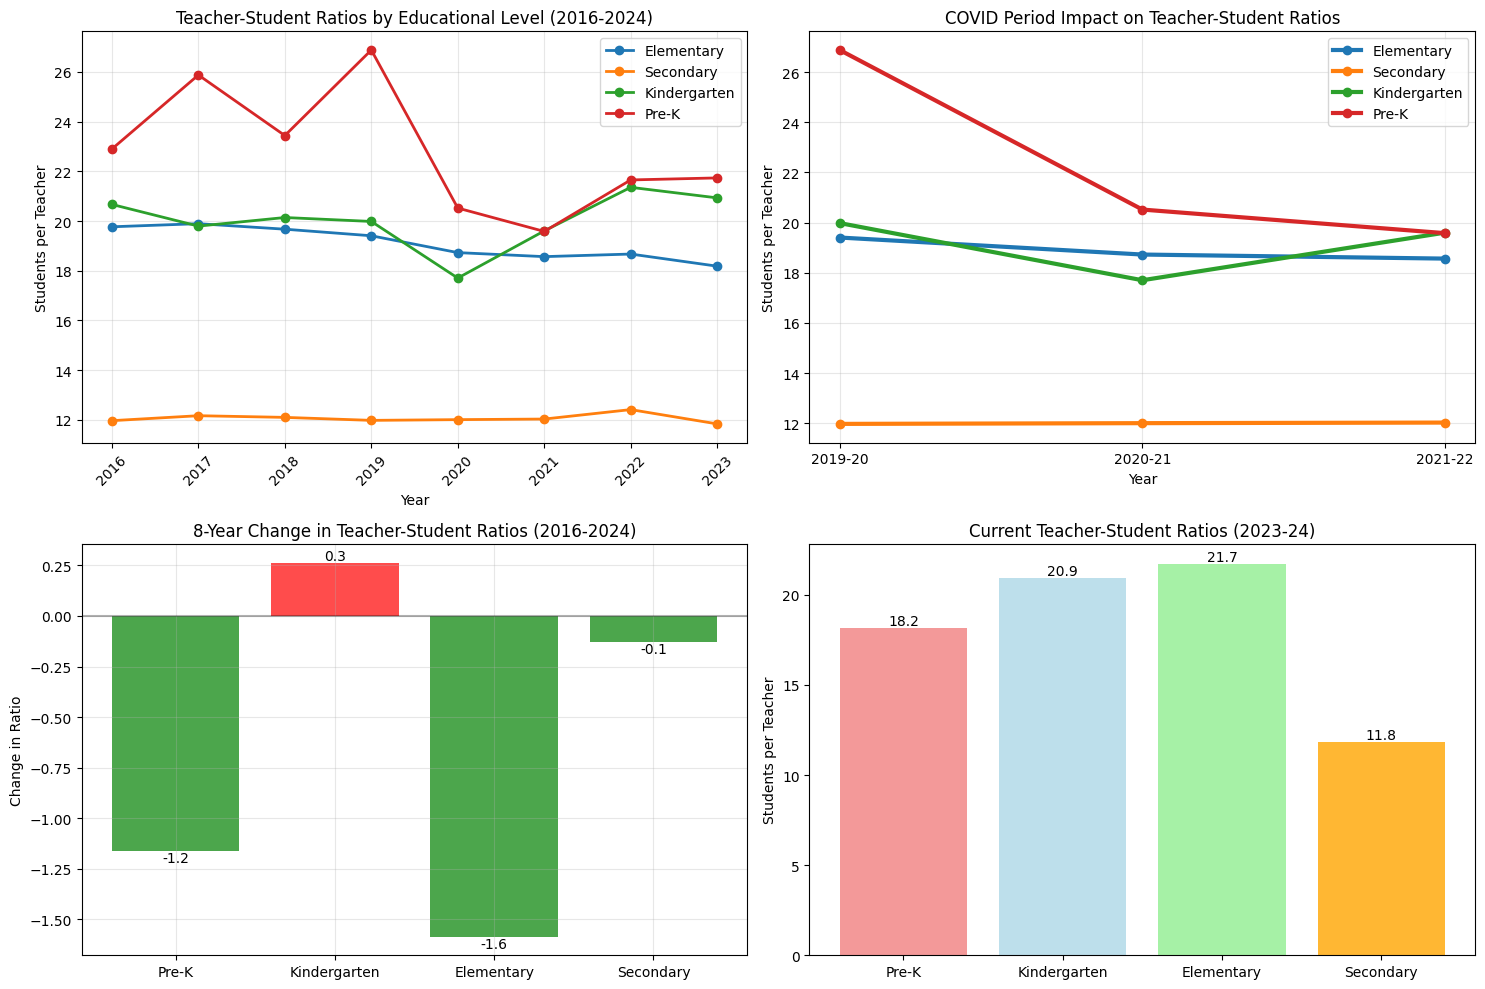

In [145]:
# Create visualizations for teacher-student ratio trends
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Overall trend lines by category
ax1 = axes[0, 0]
for category in ['Elementary', 'Secondary', 'Kindergarten', 'Pre-K']:
    category_data = yearly_trends_by_category[category]
    ax1.plot(range(len(category_data)), category_data, marker='o', linewidth=2, label=category)

ax1.set_title('Teacher-Student Ratios by Educational Level (2016-2024)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Students per Teacher')
ax1.set_xticks(range(len(yearly_trends_by_category.index)))
ax1.set_xticklabels([year.split('-')[0] for year in yearly_trends_by_category.index], rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: COVID period focus (2019-2021)
ax2 = axes[0, 1]
covid_years = ['2019-2020', '2020-2021', '2021-2022']
covid_data = yearly_trends_by_category.loc[covid_years]
x_pos = range(len(covid_years))

for i, category in enumerate(['Elementary', 'Secondary', 'Kindergarten', 'Pre-K']):
    ax2.plot(x_pos, covid_data[category], marker='o', linewidth=3, label=category)

ax2.set_title('COVID Period Impact on Teacher-Student Ratios')
ax2.set_xlabel('Year')
ax2.set_ylabel('Students per Teacher')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(['2019-20', '2020-21', '2021-22'])
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Change from 2016 to 2024
ax3 = axes[1, 0]
categories = ['Pre-K', 'Kindergarten', 'Elementary', 'Secondary']
changes = []
for cat in categories:
    start = yearly_trends_by_category.loc['2016-2017', cat]
    end = yearly_trends_by_category.loc['2023-2024', cat]
    changes.append(end - start)

colors = ['red' if x > 0 else 'green' for x in changes]
bars = ax3.bar(categories, changes, color=colors, alpha=0.7)
ax3.set_title('8-Year Change in Teacher-Student Ratios (2016-2024)')
ax3.set_ylabel('Change in Ratio')
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax3.grid(True, alpha=0.3)

# Add value labels on bars
for bar, change in zip(bars, changes):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{change:.1f}', ha='center', va='bottom' if height > 0 else 'top')

# Plot 4: Current ratios (2023-24) comparison
ax4 = axes[1, 1]
current_ratios = yearly_trends_by_category.loc['2023-2024']
bars = ax4.bar(categories, current_ratios, color=['lightcoral', 'lightblue', 'lightgreen', 'orange'], alpha=0.8)
ax4.set_title('Current Teacher-Student Ratios (2023-24)')
ax4.set_ylabel('Students per Teacher')

# Add value labels
for bar, ratio in zip(bars, current_ratios):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{ratio:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [146]:
# Calculate average ratios by state across all years
state_ratios = ratios_by_category.groupby(['STATENAME', 'Grade_Category'])['TEACHER_STUDENT_RATIO'].mean().unstack()

# Calculate overall state averages (across all categories)
state_overall = ratios_by_category.groupby('STATENAME')['TEACHER_STUDENT_RATIO'].mean().sort_values()

print("Best staffed states (lowest ratios):")
print(state_overall.head(10).round(1))

print("\nWorst staffed states (highest ratios):")
print(state_overall.tail(10).round(1))

# Look at specific categories for top/bottom states
top_states = state_overall.head(5).index
bottom_states = state_overall.tail(5).index

print(f"\nBest states breakdown by category:")
print(state_ratios.loc[top_states].round(1))

print(f"\nWorst states breakdown by category:")
print(state_ratios.loc[bottom_states].round(1))

Best staffed states (lowest ratios):
STATENAME
MAINE                  13.0
MONTANA                13.5
U.S. VIRGIN ISLANDS    13.5
RHODE ISLAND           13.7
MASSACHUSETTS          13.8
HAWAII                 13.9
NORTH DAKOTA           13.9
MISSOURI               13.9
KANSAS                 14.1
PUERTO RICO            14.1
Name: TEACHER_STUDENT_RATIO, dtype: float64

Worst staffed states (highest ratios):
STATENAME
OREGON                        22.1
ILLINOIS                      22.5
WASHINGTON                    22.8
NEW YORK                      23.6
INDIANA                       23.8
BUREAU OF INDIAN EDUCATION    26.2
FLORIDA                       27.8
ARIZONA                       29.7
UTAH                          31.0
NEVADA                        43.2
Name: TEACHER_STUDENT_RATIO, dtype: float64

Best states breakdown by category:
Grade_Category       Elementary  Kindergarten  Pre-K  Secondary
STATENAME                                                      
MAINE                

In [147]:
# Remove records with zero teachers or zero students before calculating ratios
ratios_cleaned = ratios_by_category[
    (ratios_by_category['STAFF_COUNT'] > 0) & 
    (ratios_by_category['STUDENT_COUNT'] > 0)
].copy()

# Recalculate ratios with clean data
ratios_cleaned['TEACHER_STUDENT_RATIO'] = ratios_cleaned['STUDENT_COUNT'] / ratios_cleaned['STAFF_COUNT']

print(f"Records before cleaning: {len(ratios_by_category)}")
print(f"Records after cleaning: {len(ratios_cleaned)}")

# Check what we removed
removed_records = ratios_by_category[
    (ratios_by_category['STAFF_COUNT'] == 0) | 
    (ratios_by_category['STUDENT_COUNT'] == 0)
]
print(f"\nRemoved records with zero teachers or students:")
print(removed_records[['YEAR', 'STATENAME', 'Grade_Category', 'STAFF_COUNT', 'STUDENT_COUNT']])

# Recalculate state rankings with properly cleaned data
state_overall_clean = ratios_cleaned.groupby('STATENAME')['TEACHER_STUDENT_RATIO'].mean().sort_values()

print("\nBest staffed states (properly cleaned):")
print(state_overall_clean.head(10).round(1))

print("\nWorst staffed states (properly cleaned):")
print(state_overall_clean.tail(10).round(1))

Records before cleaning: 1740
Records after cleaning: 1727

Removed records with zero teachers or students:
           YEAR                   STATENAME Grade_Category  STAFF_COUNT  \
154   2016-2017                      OREGON          Pre-K       297.79   
448   2018-2019  BUREAU OF INDIAN EDUCATION          Pre-K        69.00   
668   2019-2020  BUREAU OF INDIAN EDUCATION          Pre-K        71.00   
672   2019-2020                  CALIFORNIA          Pre-K      5085.65   
1023  2020-2021                      OREGON          Pre-K       351.65   
1099  2021-2022  BUREAU OF INDIAN EDUCATION          Pre-K        70.50   
1238  2021-2022                      OREGON          Pre-K       364.12   
1456  2022-2023                      OREGON          Pre-K       422.44   
1564  2023-2024                        GUAM     Elementary       661.00   
1565  2023-2024                        GUAM   Kindergarten        84.00   
1566  2023-2024                        GUAM          Pre-K        4

In [148]:
# Investigate Nevada's data in detail
nevada_data = ratios_cleaned[ratios_cleaned['STATENAME'] == 'NEVADA'].copy()

print("Nevada teacher-student ratios by category and year:")
nevada_pivot = nevada_data.pivot_table(values='TEACHER_STUDENT_RATIO', 
                                       index='YEAR', 
                                       columns='Grade_Category').round(1)
print(nevada_pivot)

print(f"\nNevada raw data breakdown:")
print(nevada_data[['YEAR', 'Grade_Category', 'STAFF_COUNT', 'STUDENT_COUNT', 'TEACHER_STUDENT_RATIO']].round(1))

# Check if Nevada has systematic data quality issues
print(f"\nNevada extreme ratios (>30):")
nevada_extreme = nevada_data[nevada_data['TEACHER_STUDENT_RATIO'] > 30]
print(nevada_extreme[['YEAR', 'Grade_Category', 'STAFF_COUNT', 'STUDENT_COUNT', 'TEACHER_STUDENT_RATIO']])

# Compare Nevada to a similar western state like Utah or Arizona
utah_data = ratios_cleaned[ratios_cleaned['STATENAME'] == 'UTAH']
utah_avg = utah_data['TEACHER_STUDENT_RATIO'].mean()
print(f"\nComparison:")
print(f"Nevada average: {nevada_data['TEACHER_STUDENT_RATIO'].mean():.1f}")
print(f"Utah average: {utah_avg:.1f}")

Nevada teacher-student ratios by category and year:
Grade_Category  Elementary  Kindergarten  Pre-K  Secondary
YEAR                                                      
2016-2017             29.9          21.9  115.4       16.5
2017-2018             30.7          22.4  159.1       16.8
2018-2019             34.7          24.9   20.0       16.0
2019-2020             32.0          23.4  162.8       14.6
2020-2021             29.2          19.8  125.3       14.4
2022-2023             34.2          22.9   61.0       17.3
2023-2024             34.7          22.0   70.0       17.5

Nevada raw data breakdown:
           YEAR Grade_Category  STAFF_COUNT  STUDENT_COUNT  \
116   2016-2017     Elementary       9795.0       293071.0   
117   2016-2017   Kindergarten       1579.8        34626.0   
118   2016-2017          Pre-K         47.0         5426.0   
119   2016-2017      Secondary       8485.8       139723.0   
331   2017-2018     Elementary       9723.6       298983.0   
332   2017-2018  

In [149]:
# Remove Nevada from the analysis due to data quality issues
ratios_final = ratios_cleaned[ratios_cleaned['STATENAME'] != 'NEVADA'].copy()

print(f"Records after removing Nevada: {len(ratios_final)}")

# Recalculate state rankings without Nevada
state_overall_final = ratios_final.groupby('STATENAME')['TEACHER_STUDENT_RATIO'].mean().sort_values()

print("\nWorst staffed states (Nevada removed):")
print(state_overall_final.tail(10).round(1))

# Check if other states have similar Pre-K issues
prek_ratios = ratios_final[ratios_final['Grade_Category'] == 'Pre-K']['TEACHER_STUDENT_RATIO']
extreme_prek = ratios_final[(ratios_final['Grade_Category'] == 'Pre-K') & (ratios_final['TEACHER_STUDENT_RATIO'] > 50)]

if len(extreme_prek) > 0:
    print(f"\nOther states with extreme Pre-K ratios:")
    print(extreme_prek[['YEAR', 'STATENAME', 'STAFF_COUNT', 'STUDENT_COUNT', 'TEACHER_STUDENT_RATIO']])
else:
    print(f"\nNo other states have extreme Pre-K ratios after Nevada removal")

Records after removing Nevada: 1699

Worst staffed states (Nevada removed):
STATENAME
MICHIGAN                      21.7
ILLINOIS                      22.5
WASHINGTON                    22.8
NEW YORK                      23.6
INDIANA                       23.8
OREGON                        26.2
FLORIDA                       27.8
ARIZONA                       29.7
BUREAU OF INDIAN EDUCATION    30.6
UTAH                          31.0
Name: TEACHER_STUDENT_RATIO, dtype: float64

Other states with extreme Pre-K ratios:
           YEAR   STATENAME  STAFF_COUNT  STUDENT_COUNT  TEACHER_STUDENT_RATIO
62    2016-2017     INDIANA       330.29        18882.0              57.167943
277   2017-2018     INDIANA       376.55        19198.0              50.983933
369   2017-2018      OREGON       318.07        27330.0              85.924482
440   2018-2019     ARIZONA       391.40        21237.0              54.259070
472   2018-2019     FLORIDA       983.11        64164.0              65.266349
496  

In [150]:
# Verify your total ratios match NCES for the overlapping year (2022-23)
nces_2022_ratios = {
    'ALABAMA': 17.9,
    'CALIFORNIA': 21.9,
    'NEW YORK': 11.7,
    'TEXAS': 14.8,
    'ILLINOIS': 13.7,
    'FLORIDA': 18.3,
    'ARIZONA': 22.8
}

your_2022_ratios = total_ratios_correct[total_ratios_correct['YEAR'] == '2022-2023']

print("2022-23 Total Ratio Verification:")
for state, nces_ratio in nces_2022_ratios.items():
    state_data = your_2022_ratios[your_2022_ratios['STATENAME'] == state]
    if len(state_data) > 0:
        your_ratio = state_data['TOTAL_RATIO'].iloc[0]
        print(f"{state}: Your {your_ratio:.1f} vs NCES {nces_ratio:.1f}")
    else:
        print(f"{state}: Missing from your data")

2022-23 Total Ratio Verification:
ALABAMA: Your 17.9 vs NCES 17.9
CALIFORNIA: Your 21.9 vs NCES 21.9
NEW YORK: Your 11.7 vs NCES 11.7
TEXAS: Your 14.8 vs NCES 14.8
ILLINOIS: Your 13.7 vs NCES 13.7
FLORIDA: Your 18.3 vs NCES 18.3
ARIZONA: Your 22.8 vs NCES 22.8


In [151]:
# Check how much Pre-K data affects the total ratios
ratios_2022 = ratios_final[ratios_final['YEAR'] == '2022-2023']

# Calculate total student and teacher counts by category for 2022-23
student_totals_2022 = ratios_2022.groupby('Grade_Category')['STUDENT_COUNT'].sum()
teacher_totals_2022 = ratios_2022.groupby('Grade_Category')['STAFF_COUNT'].sum()

print("2022-23 Enrollment and staffing by category:")
total_students = student_totals_2022.sum()
total_teachers = teacher_totals_2022.sum()

for category in student_totals_2022.index:
    student_pct = (student_totals_2022[category] / total_students) * 100
    teacher_pct = (teacher_totals_2022[category] / total_teachers) * 100
    print(f"{category}: {student_totals_2022[category]:,.0f} students ({student_pct:.1f}%), {teacher_totals_2022[category]:,.0f} teachers ({teacher_pct:.1f}%)")

2022-23 Enrollment and staffing by category:
Elementary: 28,818,888 students (58.6%), 1,530,688 teachers (49.8%)
Kindergarten: 3,513,393 students (7.1%), 192,854 teachers (6.3%)
Pre-K: 1,415,786 students (2.9%), 70,712 teachers (2.3%)
Secondary: 15,451,930 students (31.4%), 1,276,542 teachers (41.6%)


In [152]:
# Check Pre-K ratios across all states and years
prek_data = ratios_final[ratios_final['Grade_Category'] == 'Pre-K'].copy()

print("Pre-K ratio distribution:")
print(f"Count: {len(prek_data)}")
print(f"Mean: {prek_data['TEACHER_STUDENT_RATIO'].mean():.1f}")
print(f"Median: {prek_data['TEACHER_STUDENT_RATIO'].median():.1f}")
print(f"Min: {prek_data['TEACHER_STUDENT_RATIO'].min():.1f}")
print(f"Max: {prek_data['TEACHER_STUDENT_RATIO'].max():.1f}")

# Count how many Pre-K records are extreme (>30)
extreme_prek = prek_data[prek_data['TEACHER_STUDENT_RATIO'] > 30]
print(f"\nPre-K records with ratios >30: {len(extreme_prek)} out of {len(prek_data)} ({len(extreme_prek)/len(prek_data)*100:.1f}%)")

# Check how many states have extreme Pre-K ratios
states_with_extreme_prek = extreme_prek['STATENAME'].nunique()
total_states_with_prek = prek_data['STATENAME'].nunique()
print(f"States with extreme Pre-K ratios: {states_with_extreme_prek} out of {total_states_with_prek}")

# Show which states have consistently problematic Pre-K data
problematic_states = extreme_prek['STATENAME'].value_counts()
print(f"\nStates with most extreme Pre-K ratios:")
print(problematic_states.head())

Pre-K ratio distribution:
Count: 412
Mean: 22.1
Median: 19.2
Min: 3.2
Max: 102.4

Pre-K records with ratios >30: 61 out of 412 (14.8%)
States with extreme Pre-K ratios: 13 out of 54

States with most extreme Pre-K ratios:
STATENAME
INDIANA       8
VERMONT       8
UTAH          7
WASHINGTON    7
ARIZONA       7
Name: count, dtype: int64


In [153]:
# Exclude Pre-K data entirely due to unrealistic ratios
ratios_final_no_prek = ratios_final[ratios_final['Grade_Category'] != 'Pre-K'].copy()

print(f"Records after removing Pre-K: {len(ratios_final_no_prek)}")

# Recalculate state rankings without Pre-K
state_ratios_final = ratios_final_no_prek.groupby(['STATENAME', 'Grade_Category'])['TEACHER_STUDENT_RATIO'].mean().unstack()
state_overall_final = ratios_final_no_prek.groupby('STATENAME')['TEACHER_STUDENT_RATIO'].mean().sort_values()

print("\nFinal state rankings (K-12 only):")
print("Best staffed states:")
print(state_overall_final.head(10).round(1))
print("\nWorst staffed states:")
print(state_overall_final.tail(10).round(1))

# Show breakdown for top and bottom performers
top_states = state_overall_final.head(5).index
bottom_states = state_overall_final.tail(5).index

print(f"\nBest states by category:")
print(state_ratios_final.loc[top_states].round(1))
print(f"\nWorst states by category:")
print(state_ratios_final.loc[bottom_states].round(1))

Records after removing Pre-K: 1287

Final state rankings (K-12 only):
Best staffed states:
STATENAME
MAINE                  11.7
NORTH DAKOTA           12.7
MASSACHUSETTS          13.1
NEW HAMPSHIRE          13.3
KANSAS                 13.4
U.S. VIRGIN ISLANDS    13.6
NEBRASKA               13.6
PUERTO RICO            13.8
IOWA                   13.8
MISSOURI               13.9
Name: TEACHER_STUDENT_RATIO, dtype: float64

Worst staffed states:
STATENAME
ILLINOIS                      19.3
ALASKA                        19.6
KENTUCKY                      20.5
FLORIDA                       21.0
IDAHO                         21.0
MICHIGAN                      21.6
CALIFORNIA                    22.4
ARIZONA                       25.5
UTAH                          27.2
BUREAU OF INDIAN EDUCATION    30.6
Name: TEACHER_STUDENT_RATIO, dtype: float64

Best states by category:
Grade_Category  Elementary  Kindergarten  Secondary
STATENAME                                          
MAINE             

In [154]:
# Apply more realistic caps based on state regulations
# Elementary (K-8): Most states cap K-3 at 15-25, so 28 is reasonable upper bound
# Secondary (9-12): Higher ratios are more acceptable, 35 is reasonable

ratios_capped = ratios_final_no_prek.copy()

# Apply separate caps by category
elementary_cap = 28
secondary_cap = 35
kindergarten_cap = 28  # Same as elementary since it's early childhood

# Flag records that exceed reasonable caps
elementary_extreme = ratios_capped[
    (ratios_capped['Grade_Category'] == 'Elementary') & 
    (ratios_capped['TEACHER_STUDENT_RATIO'] > elementary_cap)
]

secondary_extreme = ratios_capped[
    (ratios_capped['Grade_Category'] == 'Secondary') & 
    (ratios_capped['TEACHER_STUDENT_RATIO'] > secondary_cap)
]

kindergarten_extreme = ratios_capped[
    (ratios_capped['Grade_Category'] == 'Kindergarten') & 
    (ratios_capped['TEACHER_STUDENT_RATIO'] > kindergarten_cap)
]

print(f"Elementary records exceeding {elementary_cap}: {len(elementary_extreme)}")
print(f"Secondary records exceeding {secondary_cap}: {len(secondary_extreme)}")  
print(f"Kindergarten records exceeding {kindergarten_cap}: {len(kindergarten_extreme)}")

# Show which states/years are affected
if len(elementary_extreme) > 0:
    print(f"\nElementary ratios >{elementary_cap}:")
    print(elementary_extreme[['YEAR', 'STATENAME', 'TEACHER_STUDENT_RATIO']].round(1))

if len(secondary_extreme) > 0:
    print(f"\nSecondary ratios >{secondary_cap}:")
    print(secondary_extreme[['YEAR', 'STATENAME', 'TEACHER_STUDENT_RATIO']].round(1))

Elementary records exceeding 28: 19
Secondary records exceeding 35: 0
Kindergarten records exceeding 28: 42

Elementary ratios >28:
           YEAR STATENAME  TEACHER_STUDENT_RATIO
92    2016-2017  MICHIGAN                   31.3
187   2016-2017      UTAH                   33.0
307   2017-2018  MICHIGAN                   30.7
402   2017-2018      UTAH                   32.9
470   2018-2019   FLORIDA                   28.0
526   2018-2019  MICHIGAN                   30.2
622   2018-2019      UTAH                   33.4
690   2019-2020   FLORIDA                   28.2
746   2019-2020  MICHIGAN                   30.1
842   2019-2020      UTAH                   33.8
909   2020-2021   FLORIDA                   28.5
961   2020-2021  MICHIGAN                   29.1
1081  2021-2022   ALABAMA                   28.4
1120  2021-2022   FLORIDA                   28.8
1272  2021-2022      UTAH                   34.3
1338  2022-2023   FLORIDA                   29.7
1490  2022-2023      UTAH          

In [155]:
# Apply the caps and create final clean dataset
ratios_final_capped = ratios_final_no_prek[
    ~((ratios_final_no_prek['Grade_Category'] == 'Elementary') & 
      (ratios_final_no_prek['TEACHER_STUDENT_RATIO'] > elementary_cap)) &
    ~((ratios_final_no_prek['Grade_Category'] == 'Secondary') & 
      (ratios_final_no_prek['TEACHER_STUDENT_RATIO'] > secondary_cap)) &
    ~((ratios_final_no_prek['Grade_Category'] == 'Kindergarten') & 
      (ratios_final_no_prek['TEACHER_STUDENT_RATIO'] > kindergarten_cap))
].copy()

print(f"Final clean records: {len(ratios_final_capped)}")
print(f"Removed {len(ratios_final_no_prek) - len(ratios_final_capped)} records with implausible ratios")

# Recalculate final state rankings with realistic caps
state_overall_final = ratios_final_capped.groupby('STATENAME')['TEACHER_STUDENT_RATIO'].mean().sort_values()

print("\nFinal state rankings (with realistic ratio caps):")
print("Best staffed states:")
print(state_overall_final.head(10).round(1))
print("\nWorst staffed states:")
print(state_overall_final.tail(10).round(1))

Final clean records: 1226
Removed 61 records with implausible ratios

Final state rankings (with realistic ratio caps):
Best staffed states:
STATENAME
MAINE                         11.7
NEW JERSEY                    12.6
NORTH DAKOTA                  12.7
DISTRICT OF COLUMBIA          12.8
BUREAU OF INDIAN EDUCATION    12.8
MASSACHUSETTS                 13.1
NEW HAMPSHIRE                 13.3
KANSAS                        13.4
U.S. VIRGIN ISLANDS           13.6
NEBRASKA                      13.6
Name: TEACHER_STUDENT_RATIO, dtype: float64

Worst staffed states:
STATENAME
FLORIDA              18.4
NORTHERN MARIANAS    18.6
LOUISIANA            18.8
IDAHO                18.9
NEW MEXICO           19.0
MICHIGAN             19.2
ALASKA               19.6
KENTUCKY             20.5
CALIFORNIA           22.4
ARIZONA              22.5
Name: TEACHER_STUDENT_RATIO, dtype: float64


In [156]:
# Check what percentage of total U.S. students/teachers my clean data represents
print("Coverage check for 2022-23:")

# Calculate total students/teachers in my clean data vs NCES official totals
clean_2022 = ratios_final_capped[ratios_final_capped['YEAR'] == '2022-2023']
my_total_students = clean_2022['STUDENT_COUNT'].sum()
my_total_teachers = clean_2022['STAFF_COUNT'].sum()

# NCES official 2022-23 totals (from the table I showed earlier)
nces_total_students = 49514913  # excluding Pre-K since I removed it
nces_total_teachers = 3224967

coverage_students = (my_total_students / nces_total_students) * 100
coverage_teachers = (my_total_teachers / nces_total_teachers) * 100

print(f"My data covers {coverage_students:.1f}% of NCES students")
print(f"My data covers {coverage_teachers:.1f}% of NCES teachers")

# Check which major states are missing from my analysis
major_states = ['CALIFORNIA', 'TEXAS', 'FLORIDA', 'NEW YORK', 'ILLINOIS']
for state in major_states:
    if state in clean_2022['STATENAME'].values:
        print(f"✓ {state} included")
    else:
        print(f"✗ {state} missing")

Coverage check for 2022-23:
My data covers 91.5% of NCES students
My data covers 90.5% of NCES teachers
✓ CALIFORNIA included
✓ TEXAS included
✓ FLORIDA included
✓ NEW YORK included
✓ ILLINOIS included


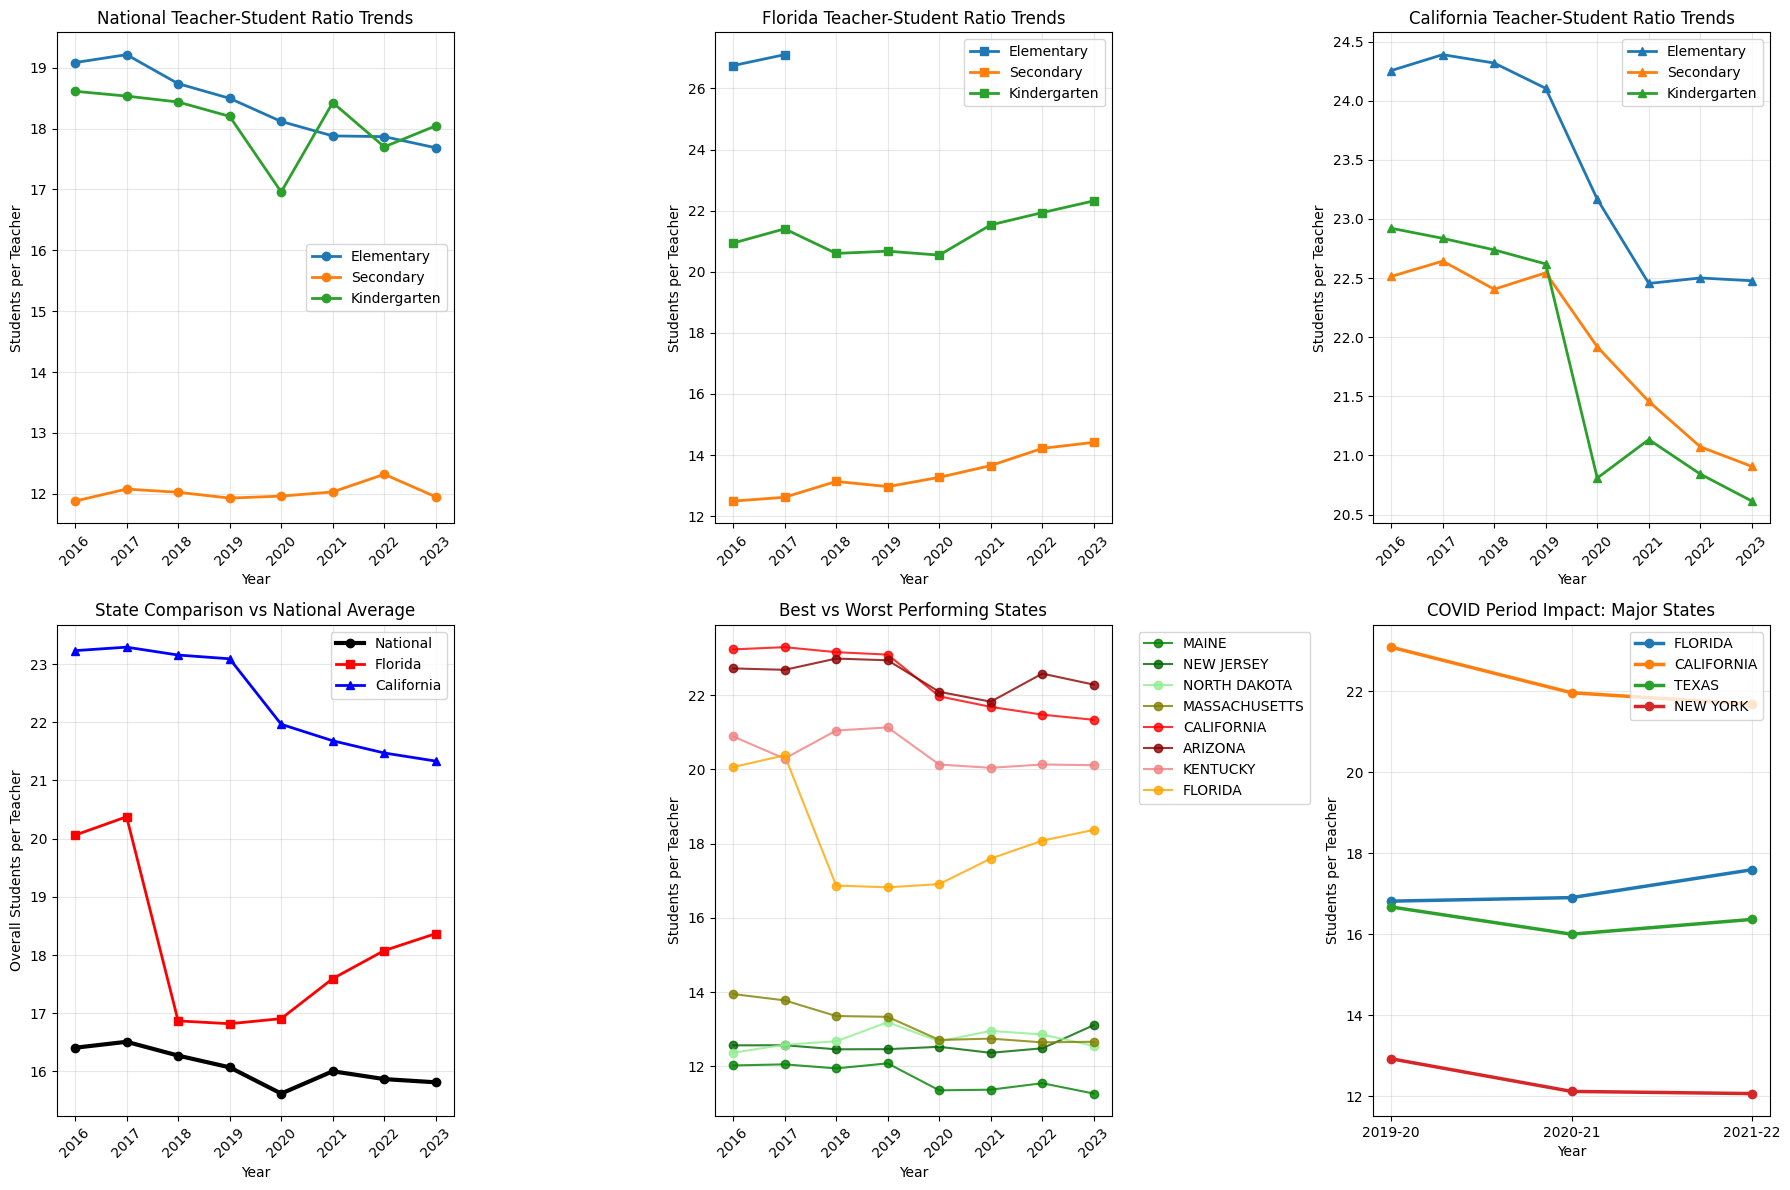

In [157]:
# Create comprehensive state-by-state visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: National trends over time by category
ax1 = axes[0, 0]
yearly_trends_clean = ratios_final_capped.groupby(['YEAR', 'Grade_Category'])['TEACHER_STUDENT_RATIO'].mean().unstack()

for category in ['Elementary', 'Secondary', 'Kindergarten']:
    if category in yearly_trends_clean.columns:
        ax1.plot(range(len(yearly_trends_clean.index)), yearly_trends_clean[category], 
                marker='o', linewidth=2, label=category)

ax1.set_title('National Teacher-Student Ratio Trends')
ax1.set_xlabel('Year')
ax1.set_ylabel('Students per Teacher')
ax1.set_xticks(range(len(yearly_trends_clean.index)))
ax1.set_xticklabels([year.split('-')[0] for year in yearly_trends_clean.index], rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Florida trends by category
ax2 = axes[0, 1]
florida_data = ratios_final_capped[ratios_final_capped['STATENAME'] == 'FLORIDA']
florida_trends = florida_data.groupby(['YEAR', 'Grade_Category'])['TEACHER_STUDENT_RATIO'].mean().unstack()

for category in ['Elementary', 'Secondary', 'Kindergarten']:
    if category in florida_trends.columns:
        ax2.plot(range(len(florida_trends.index)), florida_trends[category], 
                marker='s', linewidth=2, label=category)

ax2.set_title('Florida Teacher-Student Ratio Trends')
ax2.set_xlabel('Year')
ax2.set_ylabel('Students per Teacher')
ax2.set_xticks(range(len(florida_trends.index)))
ax2.set_xticklabels([year.split('-')[0] for year in florida_trends.index], rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: California trends by category
ax3 = axes[0, 2]
california_data = ratios_final_capped[ratios_final_capped['STATENAME'] == 'CALIFORNIA']
california_trends = california_data.groupby(['YEAR', 'Grade_Category'])['TEACHER_STUDENT_RATIO'].mean().unstack()

for category in ['Elementary', 'Secondary', 'Kindergarten']:
    if category in california_trends.columns:
        ax3.plot(range(len(california_trends.index)), california_trends[category], 
                marker='^', linewidth=2, label=category)

ax3.set_title('California Teacher-Student Ratio Trends')
ax3.set_xlabel('Year')
ax3.set_ylabel('Students per Teacher')
ax3.set_xticks(range(len(california_trends.index)))
ax3.set_xticklabels([year.split('-')[0] for year in california_trends.index], rotation=45)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Comparison of Florida vs California vs National
ax4 = axes[1, 0]
national_avg = ratios_final_capped.groupby('YEAR')['TEACHER_STUDENT_RATIO'].mean()
florida_avg = florida_data.groupby('YEAR')['TEACHER_STUDENT_RATIO'].mean()
california_avg = california_data.groupby('YEAR')['TEACHER_STUDENT_RATIO'].mean()

ax4.plot(range(len(national_avg.index)), national_avg, marker='o', linewidth=3, label='National', color='black')
ax4.plot(range(len(florida_avg.index)), florida_avg, marker='s', linewidth=2, label='Florida', color='red')
ax4.plot(range(len(california_avg.index)), california_avg, marker='^', linewidth=2, label='California', color='blue')

ax4.set_title('State Comparison vs National Average')
ax4.set_xlabel('Year')
ax4.set_ylabel('Overall Students per Teacher')
ax4.set_xticks(range(len(national_avg.index)))
ax4.set_xticklabels([year.split('-')[0] for year in national_avg.index], rotation=45)
ax4.legend()
ax4.grid(True, alpha=0.3)

# Plot 5: Best vs Worst performing states
ax5 = axes[1, 1]
best_states = ['MAINE', 'NEW JERSEY', 'NORTH DAKOTA', 'MASSACHUSETTS']
worst_states = ['CALIFORNIA', 'ARIZONA', 'KENTUCKY', 'FLORIDA']

colors = ['green', 'darkgreen', 'lightgreen', 'olive', 'red', 'darkred', 'lightcoral', 'orange']
for i, state in enumerate(best_states + worst_states):
    state_avg = ratios_final_capped[ratios_final_capped['STATENAME'] == state].groupby('YEAR')['TEACHER_STUDENT_RATIO'].mean()
    ax5.plot(range(len(state_avg.index)), state_avg, marker='o', linewidth=1.5, 
            label=state, color=colors[i], alpha=0.8)

ax5.set_title('Best vs Worst Performing States')
ax5.set_xlabel('Year')
ax5.set_ylabel('Students per Teacher')
ax5.set_xticks(range(len(yearly_trends_clean.index)))
ax5.set_xticklabels([year.split('-')[0] for year in yearly_trends_clean.index], rotation=45)
ax5.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax5.grid(True, alpha=0.3)

# Plot 6: COVID period focus for key states
ax6 = axes[1, 2]
covid_years = ['2019-2020', '2020-2021', '2021-2022']
states_of_interest = ['FLORIDA', 'CALIFORNIA', 'TEXAS', 'NEW YORK']

for state in states_of_interest:
    state_covid = ratios_final_capped[
        (ratios_final_capped['STATENAME'] == state) & 
        (ratios_final_capped['YEAR'].isin(covid_years))
    ].groupby('YEAR')['TEACHER_STUDENT_RATIO'].mean()
    
    ax6.plot(range(len(state_covid.index)), state_covid, marker='o', linewidth=2.5, label=state)

ax6.set_title('COVID Period Impact: Major States')
ax6.set_xlabel('Year')
ax6.set_ylabel('Students per Teacher')
ax6.set_xticks(range(len(covid_years)))
ax6.set_xticklabels(['2019-20', '2020-21', '2021-22'])
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [158]:
# Check Florida's data availability across all years and categories
florida_all = ratios_final_capped[ratios_final_capped['STATENAME'] == 'FLORIDA']
print("Florida data availability:")
print(florida_all.pivot_table(values='TEACHER_STUDENT_RATIO', 
                              index='YEAR', 
                              columns='Grade_Category', 
                              aggfunc='count'))

# Check what was removed from Florida during cleaning
florida_original = ratios_final[ratios_final['STATENAME'] == 'FLORIDA']
florida_removed = florida_original[~florida_original.index.isin(florida_all.index)]

print(f"\nFlorida records before cleaning: {len(florida_original)}")
print(f"Florida records after cleaning: {len(florida_all)}")
print(f"Florida records removed: {len(florida_removed)}")

if len(florida_removed) > 0:
    print("\nRemoved Florida records:")
    print(florida_removed[['YEAR', 'Grade_Category', 'TEACHER_STUDENT_RATIO']].round(1))

Florida data availability:
Grade_Category  Elementary  Kindergarten  Secondary
YEAR                                               
2016-2017              1.0           1.0        1.0
2017-2018              1.0           1.0        1.0
2018-2019              NaN           1.0        1.0
2019-2020              NaN           1.0        1.0
2020-2021              NaN           1.0        1.0
2021-2022              NaN           1.0        1.0
2022-2023              NaN           1.0        1.0
2023-2024              NaN           1.0        1.0

Florida records before cleaning: 32
Florida records after cleaning: 18
Florida records removed: 14

Removed Florida records:
           YEAR Grade_Category  TEACHER_STUDENT_RATIO
38    2016-2017          Pre-K                   21.1
253   2017-2018          Pre-K                   20.7
470   2018-2019     Elementary                   28.0
472   2018-2019          Pre-K                   65.3
690   2019-2020     Elementary                   28.2
692

In [159]:
# Check Florida's ratios against their constitutional limits
florida_regs = {
    'Elementary': 18,  # K-3 limit  
    'Secondary': 25,   # 9-12 limit
    'Kindergarten': 18 # K limit
}

print("Florida ratios vs constitutional limits:")
for _, row in florida_all.iterrows():
    category = row['Grade_Category']
    ratio = row['TEACHER_STUDENT_RATIO']
    limit = florida_regs.get(category, 'N/A')
    
    if limit != 'N/A':
        excess = ratio - limit
        print(f"{row['YEAR']} {category}: {ratio:.1f} vs {limit} limit ({excess:+.1f})")

Florida ratios vs constitutional limits:
2016-2017 Elementary: 26.7 vs 18 limit (+8.7)
2016-2017 Kindergarten: 20.9 vs 18 limit (+2.9)
2016-2017 Secondary: 12.5 vs 25 limit (-12.5)
2017-2018 Elementary: 27.1 vs 18 limit (+9.1)
2017-2018 Kindergarten: 21.4 vs 18 limit (+3.4)
2017-2018 Secondary: 12.6 vs 25 limit (-12.4)
2018-2019 Kindergarten: 20.6 vs 18 limit (+2.6)
2018-2019 Secondary: 13.1 vs 25 limit (-11.9)
2019-2020 Kindergarten: 20.7 vs 18 limit (+2.7)
2019-2020 Secondary: 13.0 vs 25 limit (-12.0)
2020-2021 Kindergarten: 20.5 vs 18 limit (+2.5)
2020-2021 Secondary: 13.3 vs 25 limit (-11.7)
2021-2022 Kindergarten: 21.5 vs 18 limit (+3.5)
2021-2022 Secondary: 13.7 vs 25 limit (-11.3)
2022-2023 Kindergarten: 21.9 vs 18 limit (+3.9)
2022-2023 Secondary: 14.2 vs 25 limit (-10.8)
2023-2024 Kindergarten: 22.3 vs 18 limit (+4.3)
2023-2024 Secondary: 14.4 vs 25 limit (-10.6)


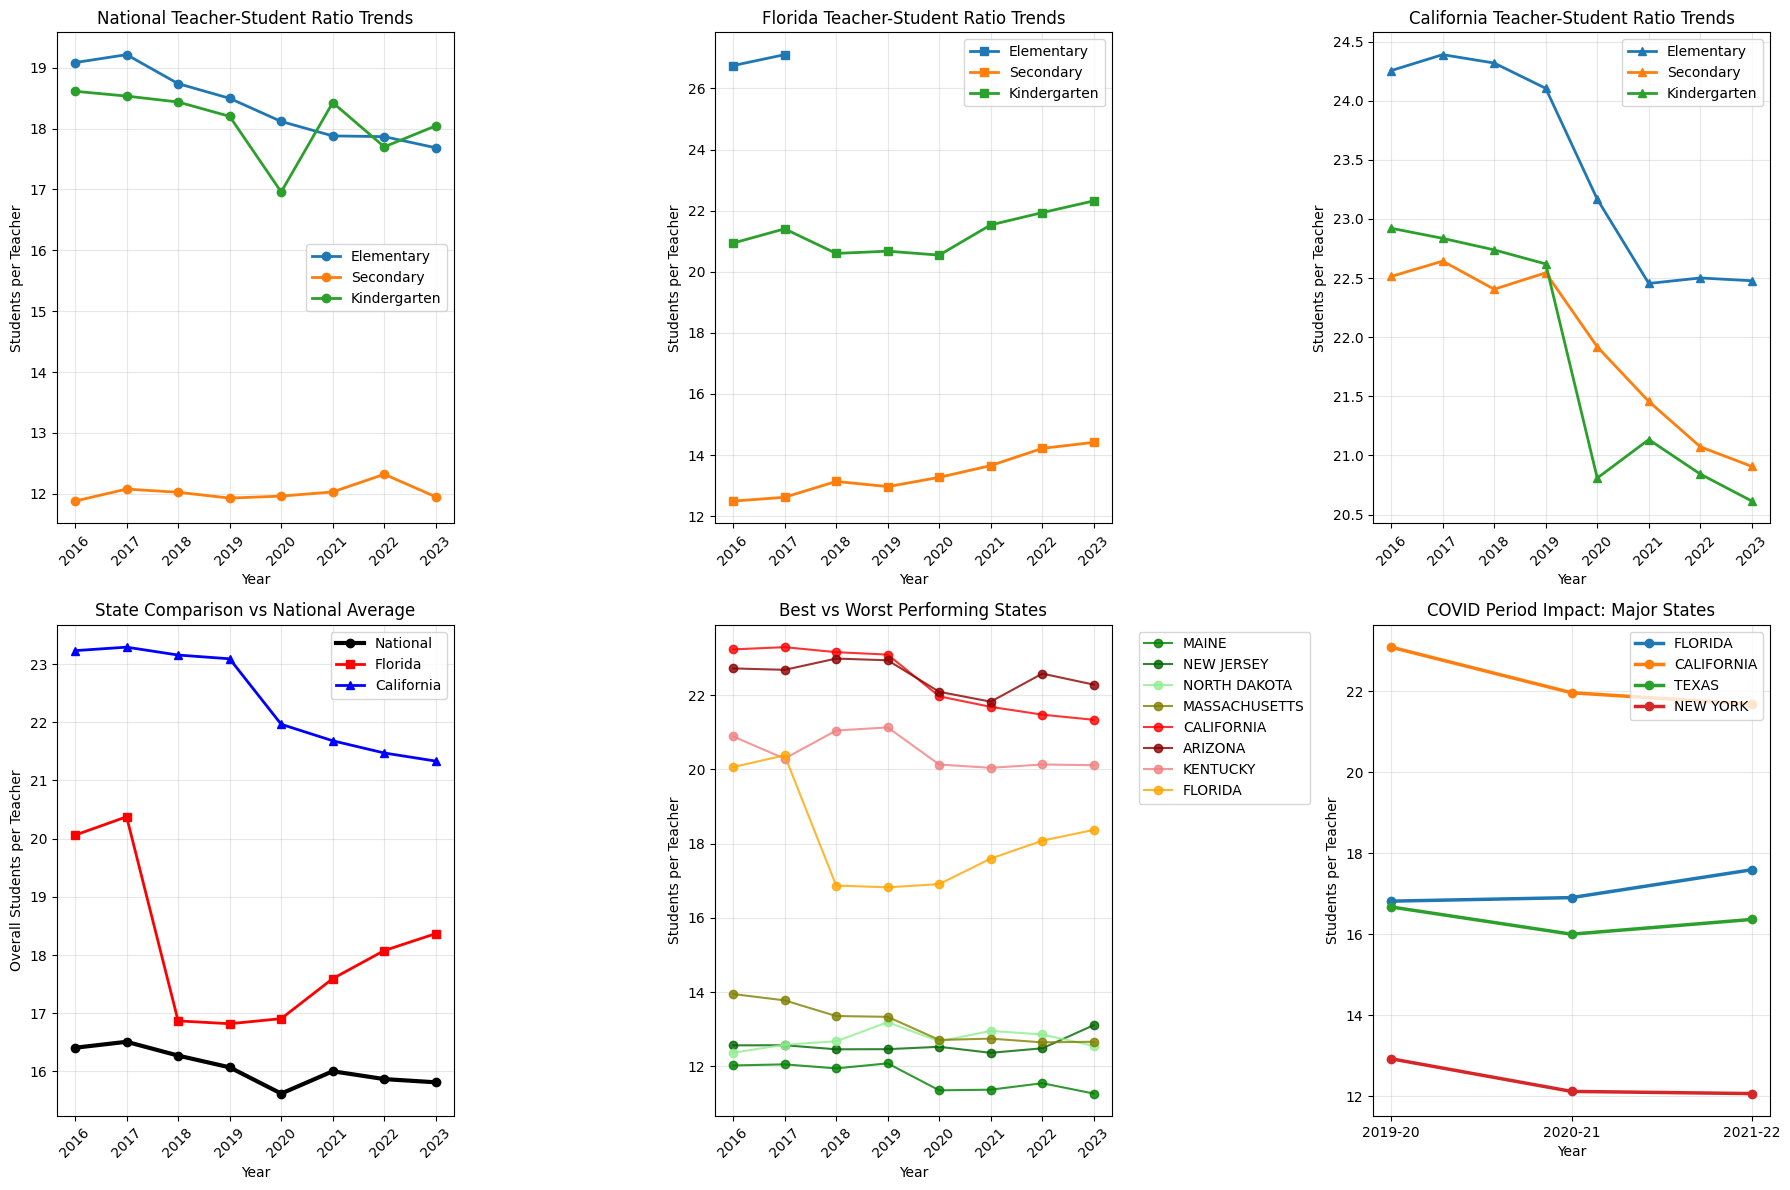

In [160]:
# Create comprehensive state-by-state visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: National trends over time by category
ax1 = axes[0, 0]
yearly_trends_clean = ratios_final_capped.groupby(['YEAR', 'Grade_Category'])['TEACHER_STUDENT_RATIO'].mean().unstack()

for category in ['Elementary', 'Secondary', 'Kindergarten']:
    if category in yearly_trends_clean.columns:
        ax1.plot(range(len(yearly_trends_clean.index)), yearly_trends_clean[category], 
                marker='o', linewidth=2, label=category)

ax1.set_title('National Teacher-Student Ratio Trends')
ax1.set_xlabel('Year')
ax1.set_ylabel('Students per Teacher')
ax1.set_xticks(range(len(yearly_trends_clean.index)))
ax1.set_xticklabels([year.split('-')[0] for year in yearly_trends_clean.index], rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Florida trends by category
ax2 = axes[0, 1]
florida_data = ratios_final_capped[ratios_final_capped['STATENAME'] == 'FLORIDA']
florida_trends = florida_data.groupby(['YEAR', 'Grade_Category'])['TEACHER_STUDENT_RATIO'].mean().unstack()

for category in ['Elementary', 'Secondary', 'Kindergarten']:
    if category in florida_trends.columns:
        ax2.plot(range(len(florida_trends.index)), florida_trends[category], 
                marker='s', linewidth=2, label=category)

ax2.set_title('Florida Teacher-Student Ratio Trends')
ax2.set_xlabel('Year')
ax2.set_ylabel('Students per Teacher')
ax2.set_xticks(range(len(florida_trends.index)))
ax2.set_xticklabels([year.split('-')[0] for year in florida_trends.index], rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: California trends by category
ax3 = axes[0, 2]
california_data = ratios_final_capped[ratios_final_capped['STATENAME'] == 'CALIFORNIA']
california_trends = california_data.groupby(['YEAR', 'Grade_Category'])['TEACHER_STUDENT_RATIO'].mean().unstack()

for category in ['Elementary', 'Secondary', 'Kindergarten']:
    if category in california_trends.columns:
        ax3.plot(range(len(california_trends.index)), california_trends[category], 
                marker='^', linewidth=2, label=category)

ax3.set_title('California Teacher-Student Ratio Trends')
ax3.set_xlabel('Year')
ax3.set_ylabel('Students per Teacher')
ax3.set_xticks(range(len(california_trends.index)))
ax3.set_xticklabels([year.split('-')[0] for year in california_trends.index], rotation=45)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Comparison of Florida vs California vs National
ax4 = axes[1, 0]
national_avg = ratios_final_capped.groupby('YEAR')['TEACHER_STUDENT_RATIO'].mean()
florida_avg = florida_data.groupby('YEAR')['TEACHER_STUDENT_RATIO'].mean()
california_avg = california_data.groupby('YEAR')['TEACHER_STUDENT_RATIO'].mean()

ax4.plot(range(len(national_avg.index)), national_avg, marker='o', linewidth=3, label='National', color='black')
ax4.plot(range(len(florida_avg.index)), florida_avg, marker='s', linewidth=2, label='Florida', color='red')
ax4.plot(range(len(california_avg.index)), california_avg, marker='^', linewidth=2, label='California', color='blue')

ax4.set_title('State Comparison vs National Average')
ax4.set_xlabel('Year')
ax4.set_ylabel('Overall Students per Teacher')
ax4.set_xticks(range(len(national_avg.index)))
ax4.set_xticklabels([year.split('-')[0] for year in national_avg.index], rotation=45)
ax4.legend()
ax4.grid(True, alpha=0.3)

# Plot 5: Best vs Worst performing states
ax5 = axes[1, 1]
best_states = ['MAINE', 'NEW JERSEY', 'NORTH DAKOTA', 'MASSACHUSETTS']
worst_states = ['CALIFORNIA', 'ARIZONA', 'KENTUCKY', 'FLORIDA']

colors = ['green', 'darkgreen', 'lightgreen', 'olive', 'red', 'darkred', 'lightcoral', 'orange']
for i, state in enumerate(best_states + worst_states):
    state_avg = ratios_final_capped[ratios_final_capped['STATENAME'] == state].groupby('YEAR')['TEACHER_STUDENT_RATIO'].mean()
    ax5.plot(range(len(state_avg.index)), state_avg, marker='o', linewidth=1.5, 
            label=state, color=colors[i], alpha=0.8)

ax5.set_title('Best vs Worst Performing States')
ax5.set_xlabel('Year')
ax5.set_ylabel('Students per Teacher')
ax5.set_xticks(range(len(yearly_trends_clean.index)))
ax5.set_xticklabels([year.split('-')[0] for year in yearly_trends_clean.index], rotation=45)
ax5.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax5.grid(True, alpha=0.3)

# Plot 6: COVID period focus for key states
ax6 = axes[1, 2]
covid_years = ['2019-2020', '2020-2021', '2021-2022']
states_of_interest = ['FLORIDA', 'CALIFORNIA', 'TEXAS', 'NEW YORK']

for state in states_of_interest:
    state_covid = ratios_final_capped[
        (ratios_final_capped['STATENAME'] == state) & 
        (ratios_final_capped['YEAR'].isin(covid_years))
    ].groupby('YEAR')['TEACHER_STUDENT_RATIO'].mean()
    
    ax6.plot(range(len(state_covid.index)), state_covid, marker='o', linewidth=2.5, label=state)

ax6.set_title('COVID Period Impact: Major States')
ax6.set_xlabel('Year')
ax6.set_ylabel('Students per Teacher')
ax6.set_xticks(range(len(covid_years)))
ax6.set_xticklabels(['2019-20', '2020-21', '2021-22'])
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Available grade categories: ['Elementary' 'Kindergarten' 'Secondary']
Using categories: ['Elementary', 'Secondary', 'Kindergarten']


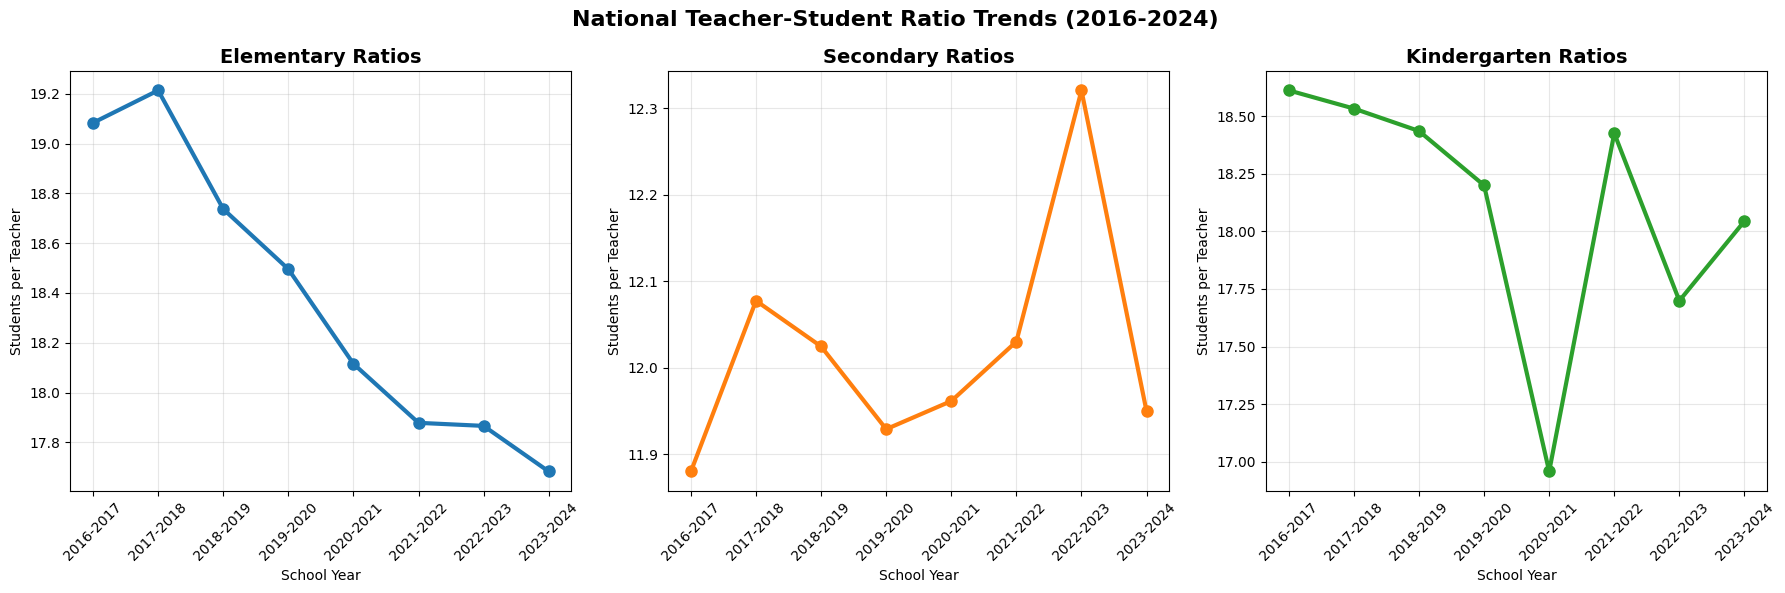


COVID-19 PANDEMIC IMPACT ANALYSIS


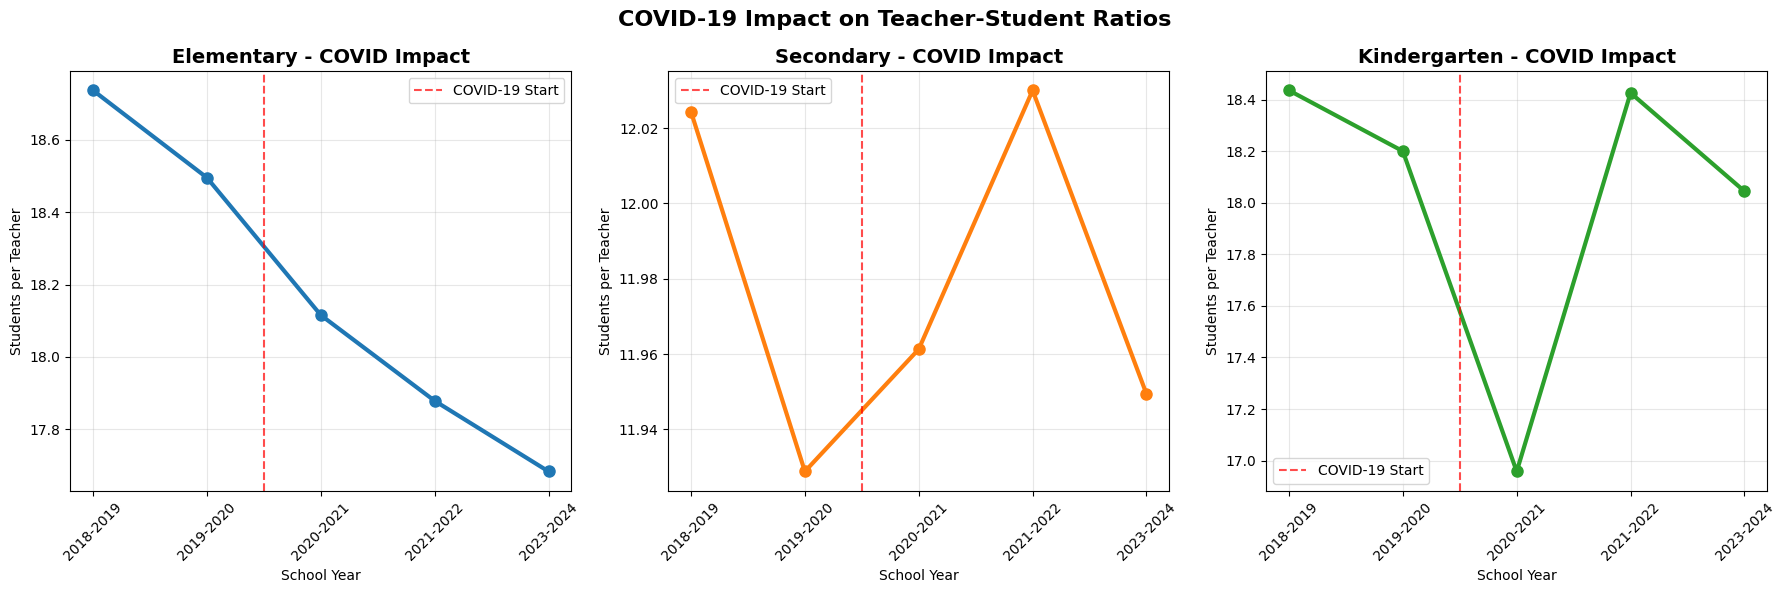


COVID IMPACT STATISTICS:
--------------------------------------------------

ELEMENTARY:
  Pre-COVID (2018-2019): 18.74
  COVID Peak (2020-2021): 18.12
  Post-COVID (2023-2024): 17.68
  COVID Impact: -0.62
  Recovery: -0.43
  Net Change: -1.05

SECONDARY:
  Pre-COVID (2018-2019): 12.02
  COVID Peak (2020-2021): 11.96
  Post-COVID (2023-2024): 11.95
  COVID Impact: -0.06
  Recovery: -0.01
  Net Change: -0.08

KINDERGARTEN:
  Pre-COVID (2018-2019): 18.44
  COVID Peak (2020-2021): 16.96
  Post-COVID (2023-2024): 18.04
  COVID Impact: -1.48
  Recovery: +1.09
  Net Change: -0.39

8-YEAR TREND SUMMARY (2016-2024)

ELEMENTARY:
  2016-2017: 19.08 students per teacher
  2023-2024: 17.68 students per teacher
  Total change: -1.40 students per teacher
  Average annual change: -0.20 students per teacher

SECONDARY:
  2016-2017: 11.88 students per teacher
  2023-2024: 11.95 students per teacher
  Total change: +0.07 students per teacher
  Average annual change: +0.01 students per teacher

KINDERGA

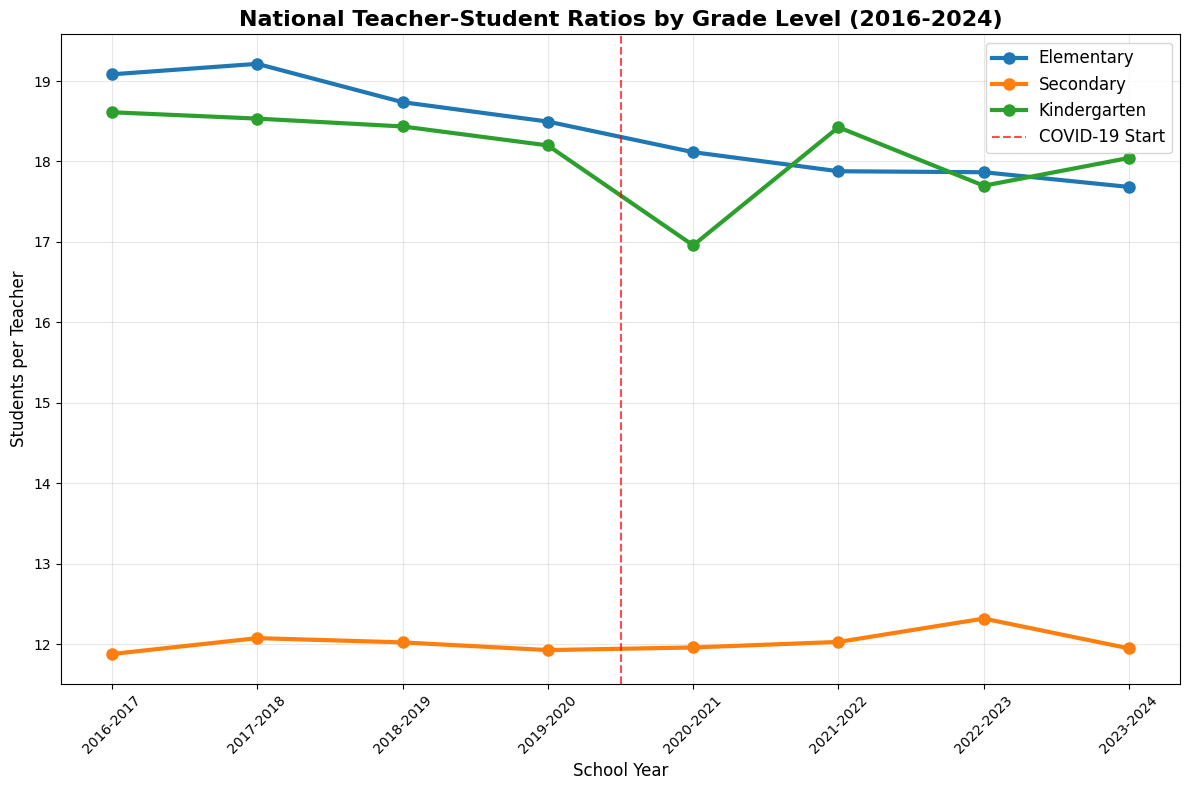


ANALYSIS COMPLETE - SESSION 1


In [161]:
# Time Trends & COVID Analysis - Session 1
# National patterns and pandemic impact

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better looking plots
plt.style.use('default')
sns.set_palette("husl")

# =============================================================================
# 1. NATIONAL TIME TRENDS 
# =============================================================================

# Calculate national averages by year (using clean data)
national_trends = ratios_final_capped.groupby(['YEAR', 'Grade_Category'])['TEACHER_STUDENT_RATIO'].mean().reset_index()

# Check what grade categories we actually have
available_categories = national_trends['Grade_Category'].unique()
print("Available grade categories:", available_categories)

# Use only categories that have data - exclude 'Teachers' if it's causing issues
grade_categories = [cat for cat in ['Elementary', 'Secondary', 'Kindergarten'] if cat in available_categories]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c'][:len(grade_categories)]

print(f"Using categories: {grade_categories}")

# Create national trends visualization - single line per category
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('National Teacher-Student Ratio Trends (2016-2024)', fontsize=16, fontweight='bold')

for i, category in enumerate(grade_categories):
    ax = axes[i]
    
    # Plot national trend
    data = national_trends[national_trends['Grade_Category'] == category]
    ax.plot(data['YEAR'], data['TEACHER_STUDENT_RATIO'], 
            marker='o', linewidth=3, markersize=8, color=colors[i])
    
    ax.set_title(f'{category} Ratios', fontweight='bold', fontsize=14)
    ax.set_xlabel('School Year')
    ax.set_ylabel('Students per Teacher')
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# =============================================================================
# 2. COVID-19 PANDEMIC IMPACT ANALYSIS
# =============================================================================

print("\n" + "="*60)
print("COVID-19 PANDEMIC IMPACT ANALYSIS")
print("="*60)

# Define pandemic periods
pre_covid = '2018-2019'
covid_year = '2019-2020'  
covid_peak = '2020-2021'
recovery = '2021-2022'
post_covid = '2023-2024'

pandemic_years = [pre_covid, covid_year, covid_peak, recovery, post_covid]

# Create COVID impact visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('COVID-19 Impact on Teacher-Student Ratios', fontsize=16, fontweight='bold')

for i, category in enumerate(grade_categories):
    ax = axes[i]
    
    # Get pandemic period data
    pandemic_data = national_trends[
        (national_trends['Grade_Category'] == category) & 
        (national_trends['YEAR'].isin(pandemic_years))
    ]
    
    # Create the plot
    ax.plot(pandemic_data['YEAR'], pandemic_data['TEACHER_STUDENT_RATIO'], 
            marker='o', linewidth=3, markersize=8, color=colors[i])
    
    # Add vertical line for COVID start (between 2019-2020 and 2020-2021)
    ax.axvline(x=1.5, color='red', linestyle='--', alpha=0.7, label='COVID-19 Start')
    
    ax.set_title(f'{category} - COVID Impact', fontweight='bold', fontsize=14)
    ax.set_xlabel('School Year')
    ax.set_ylabel('Students per Teacher')
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

plt.tight_layout()
plt.show()

# Calculate COVID impact statistics
print(f"\nCOVID IMPACT STATISTICS:")
print("-" * 50)

for category in grade_categories:
    category_data = national_trends[national_trends['Grade_Category'] == category]
    
    # Check if we have all the required years
    available_years = category_data['YEAR'].tolist()
    required_years = [pre_covid, covid_peak, post_covid]
    
    if all(year in available_years for year in required_years):
        # Get specific year values
        pre_covid_val = category_data[category_data['YEAR'] == pre_covid]['TEACHER_STUDENT_RATIO'].iloc[0]
        covid_peak_val = category_data[category_data['YEAR'] == covid_peak]['TEACHER_STUDENT_RATIO'].iloc[0]
        post_covid_val = category_data[category_data['YEAR'] == post_covid]['TEACHER_STUDENT_RATIO'].iloc[0]
        
        # Calculate changes
        covid_impact = covid_peak_val - pre_covid_val
        recovery_change = post_covid_val - covid_peak_val
        net_change = post_covid_val - pre_covid_val
        
        print(f"\n{category.upper()}:")
        print(f"  Pre-COVID ({pre_covid}): {pre_covid_val:.2f}")
        print(f"  COVID Peak ({covid_peak}): {covid_peak_val:.2f}")
        print(f"  Post-COVID ({post_covid}): {post_covid_val:.2f}")
        print(f"  COVID Impact: {covid_impact:+.2f}")
        print(f"  Recovery: {recovery_change:+.2f}")
        print(f"  Net Change: {net_change:+.2f}")
    else:
        print(f"\n{category.upper()}: Insufficient data for COVID analysis")
        print(f"  Available years: {available_years}")
        print(f"  Required years: {required_years}")

# =============================================================================
# 3. OVERALL TRENDS SUMMARY
# =============================================================================

print("\n" + "="*60)
print("8-YEAR TREND SUMMARY (2016-2024)")
print("="*60)

for category in grade_categories:
    category_data = national_trends[national_trends['Grade_Category'] == category]
    
    if len(category_data) > 0:
        # Get first and last values
        first_year = category_data['YEAR'].iloc[0]
        last_year = category_data['YEAR'].iloc[-1]
        first_val = category_data['TEACHER_STUDENT_RATIO'].iloc[0]
        last_val = category_data['TEACHER_STUDENT_RATIO'].iloc[-1]
        
        total_change = last_val - first_val
        annual_rate = (total_change / (len(category_data) - 1)) if len(category_data) > 1 else 0
        
        print(f"\n{category.upper()}:")
        print(f"  {first_year}: {first_val:.2f} students per teacher")
        print(f"  {last_year}: {last_val:.2f} students per teacher")
        print(f"  Total change: {total_change:+.2f} students per teacher")
        print(f"  Average annual change: {annual_rate:+.2f} students per teacher")

# =============================================================================
# 4. SUMMARY COMPARISON CHART
# =============================================================================

# Create a summary chart showing all three categories together
plt.figure(figsize=(12, 8))
for i, category in enumerate(grade_categories):
    data = national_trends[national_trends['Grade_Category'] == category]
    plt.plot(data['YEAR'], data['TEACHER_STUDENT_RATIO'], 
             marker='o', linewidth=3, markersize=8, label=category, color=colors[i])

plt.title('National Teacher-Student Ratios by Grade Level (2016-2024)', fontweight='bold', fontsize=16)
plt.xlabel('School Year', fontsize=12)
plt.ylabel('Students per Teacher', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add COVID marker
plt.axvline(x=3.5, color='red', linestyle='--', alpha=0.7, label='COVID-19 Start')
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("ANALYSIS COMPLETE - SESSION 1")
print("="*60)

In [162]:
# Compare the three categories side by side
print("Average ratios across all years:")
for category in grade_categories:
    avg_ratio = national_trends[national_trends['Grade_Category'] == category]['TEACHER_STUDENT_RATIO'].mean()
    print(f"{category}: {avg_ratio:.1f} students per teacher")

Average ratios across all years:
Elementary: 18.4 students per teacher
Secondary: 12.0 students per teacher
Kindergarten: 18.1 students per teacher


In [163]:
# Check total teacher and student counts by category
print("TEACHER AND STUDENT TOTALS BY CATEGORY")
print("="*50)

# Total teachers by category (sum across all states and years)
teacher_totals = ratios_final_capped.groupby('Grade_Category')['STAFF_COUNT'].sum()
print("\nTotal Teachers:")
for category, count in teacher_totals.items():
    print(f"  {category}: {count:,} teachers")

# Total students by category (if available)
if 'STUDENT_COUNT' in ratios_final_capped.columns:
    student_totals = ratios_final_capped.groupby('Grade_Category')['STUDENT_COUNT'].sum()
    print("\nTotal Students:")
    for category, count in student_totals.items():
        print(f"  {category}: {count:,} students")

# Calculate what the ratios would be if we used these totals
print("\nCalculated Ratios (Total Students ÷ Total Teachers):")
if 'STUDENT_COUNT' in ratios_final_capped.columns:
    for category in teacher_totals.index:
        if category in student_totals.index:
            ratio = student_totals[category] / teacher_totals[category]
            print(f"  {category}: {ratio:.1f} students per teacher")

TEACHER AND STUDENT TOTALS BY CATEGORY

Total Teachers:
  Elementary: 11,448,637.0 teachers
  Kindergarten: 1,442,135.85 teachers
  Secondary: 10,018,545.44 teachers

Total Students:
  Elementary: 216,810,342.0 students
  Kindergarten: 25,936,794.0 students
  Secondary: 121,199,551.0 students

Calculated Ratios (Total Students ÷ Total Teachers):
  Elementary: 18.9 students per teacher
  Kindergarten: 18.0 students per teacher
  Secondary: 12.1 students per teacher


In [164]:
# Focus on state-level analysis instead
state_trends = ratios_final_capped.groupby(['STATENAME', 'YEAR', 'Grade_Category'])['TEACHER_STUDENT_RATIO'].mean().reset_index()

STATE RANKINGS: BEST AND WORST TEACHER-STUDENT RATIOS
Available categories: ['Elementary' 'Kindergarten' 'Secondary']

ELEMENTARY RATIOS (2016-2024 Average)
--------------------------------------------------
🏆 BEST (Smallest Classes):
   BUREAU OF INDIAN EDUCATION: 10.6 students per teacher
   NEW HAMPSHIRE: 11.3 students per teacher
   MAINE: 11.4 students per teacher
   CONNECTICUT: 12.3 students per teacher
   MASSACHUSETTS: 12.6 students per teacher

⚠️  WORST (Largest Classes):
   NEW MEXICO: 25.1 students per teacher
   MICHIGAN: 26.3 students per teacher
   ALABAMA: 26.5 students per teacher
   FLORIDA: 26.9 students per teacher
   KANSAS: 27.3 students per teacher

KINDERGARTEN RATIOS (2016-2024 Average)
--------------------------------------------------
🏆 BEST (Smallest Classes):
   KANSAS: 4.6 students per teacher
   MAINE: 11.3 students per teacher
   ALABAMA: 12.9 students per teacher
   IOWA: 13.2 students per teacher
   PUERTO RICO: 13.5 students per teacher

⚠️  WORST (L

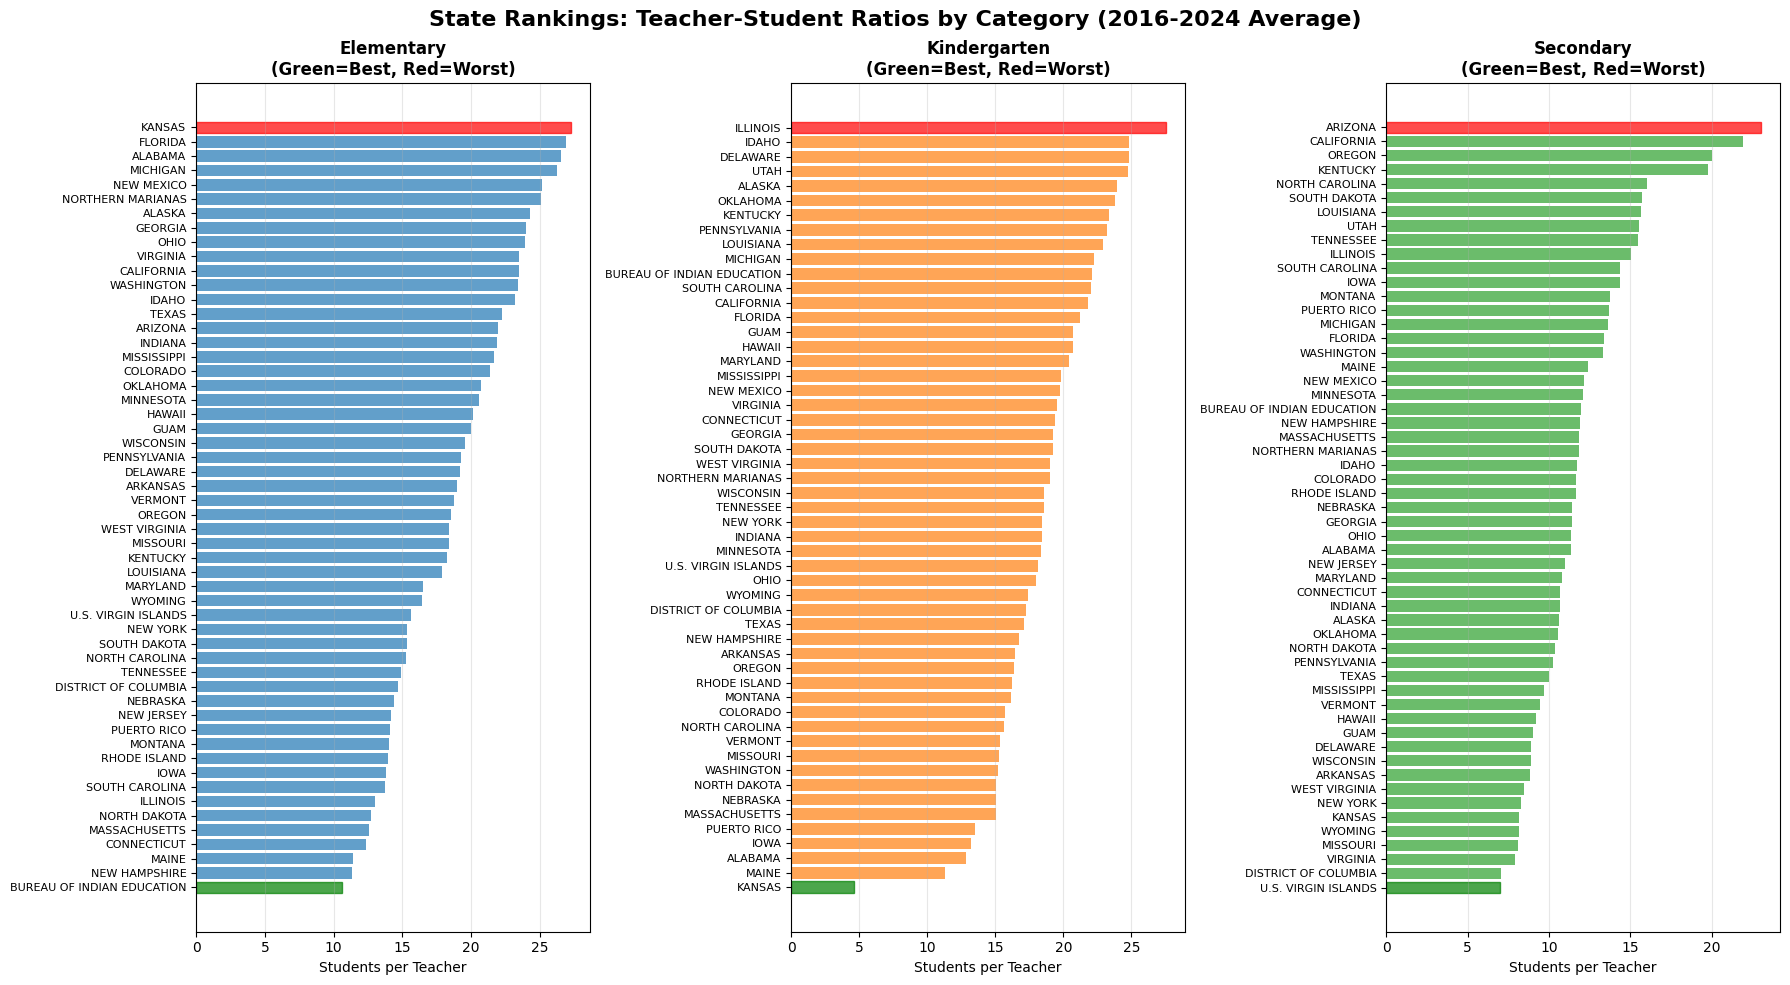


STATE TRENDS OVER TIME

ELEMENTARY - Selected States for Trend Analysis:
  BUREAU OF INDIAN EDUCATION: 10.6 average
  KANSAS: 27.3 average
  VERMONT: 18.7 average
  CALIFORNIA: 23.5 average

KINDERGARTEN - Selected States for Trend Analysis:
  KANSAS: 4.6 average
  ILLINOIS: 27.6 average
  TENNESSEE: 18.6 average
  CALIFORNIA: 21.8 average

SECONDARY - Selected States for Trend Analysis:
  U.S. VIRGIN ISLANDS: 7.0 average
  ARIZONA: 23.0 average
  NEBRASKA: 11.4 average
  CALIFORNIA: 21.9 average


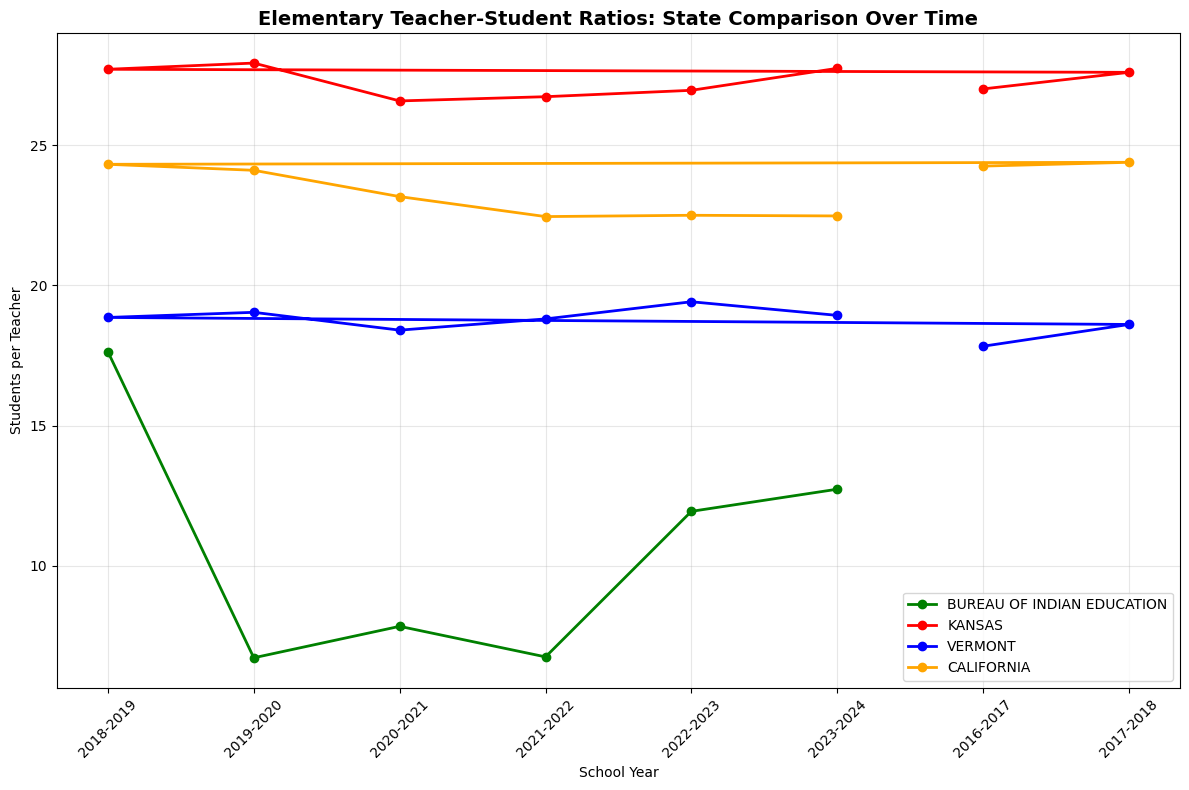

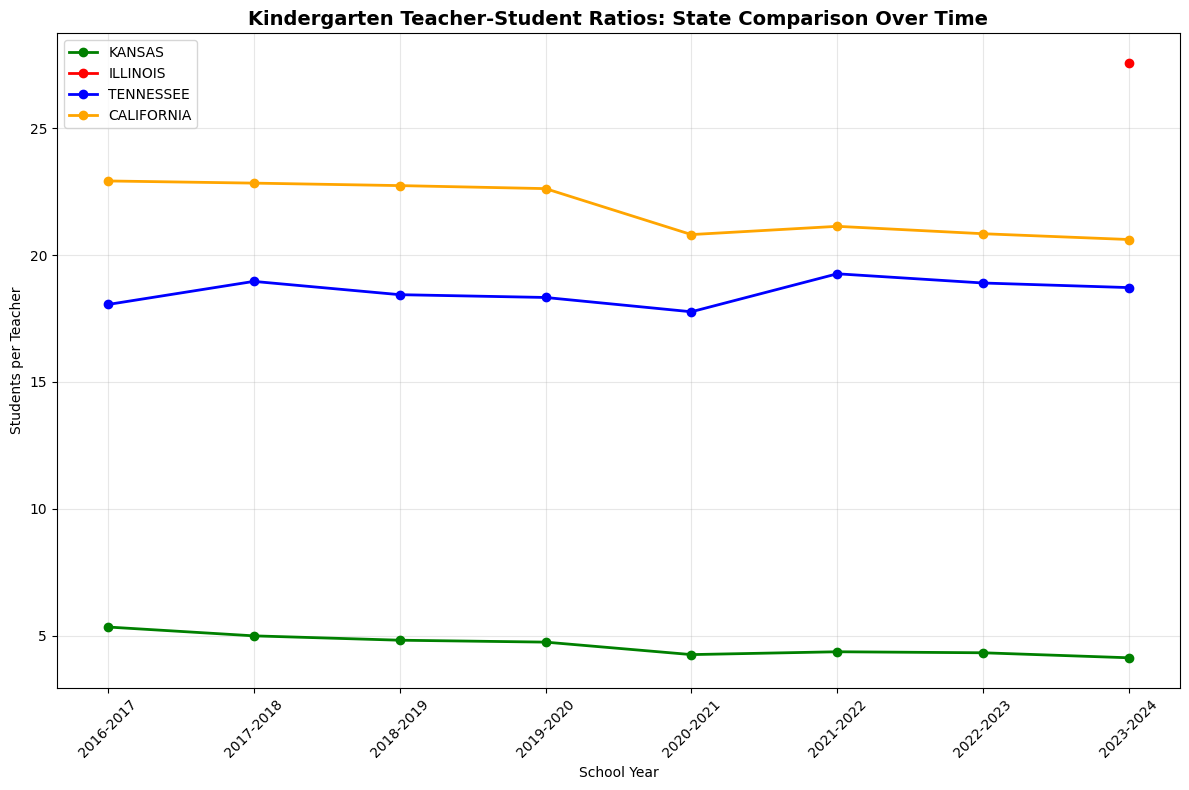

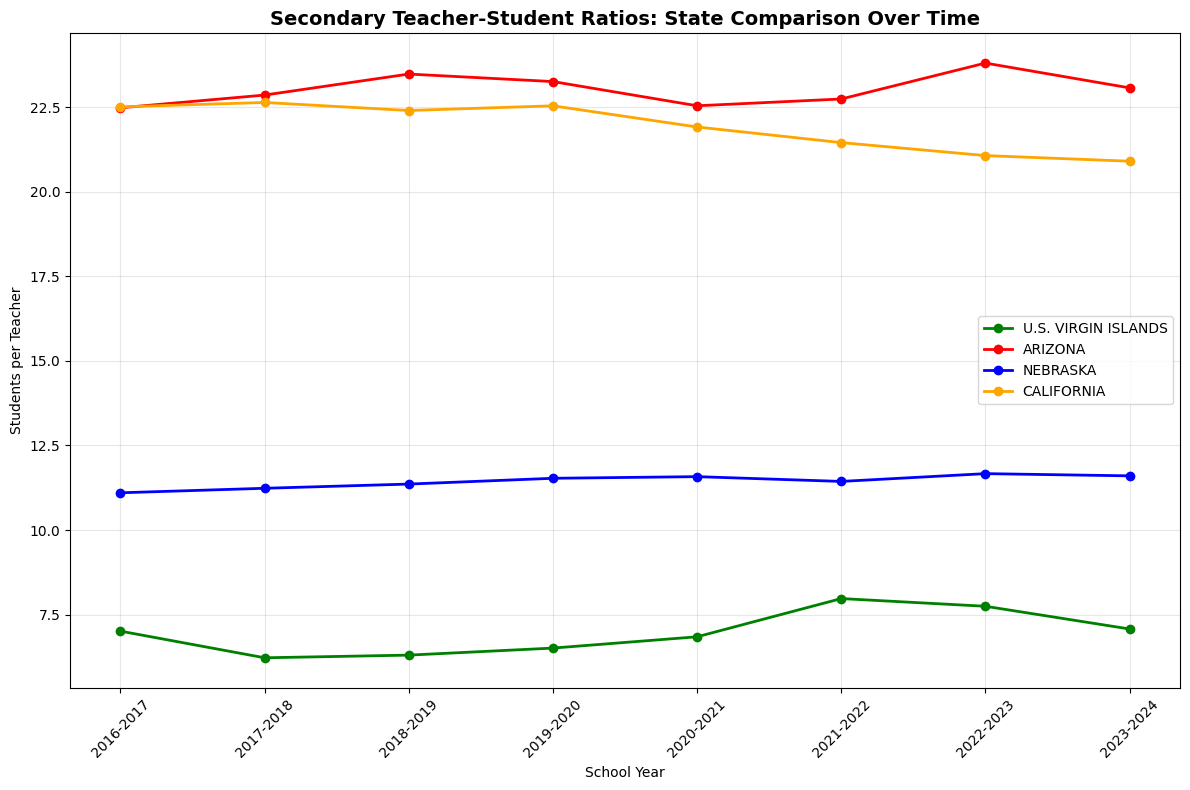


COVID IMPACT BY STATE

ELEMENTARY - COVID IMPACT RANKINGS
---------------------------------------------
🔺 Biggest COVID Impact (Ratios Increased Most):
   U.S. VIRGIN ISLANDS: +2.31 students per teacher
   PUERTO RICO: +0.51 students per teacher
   NORTH DAKOTA: +-0.05 students per teacher
   NEBRASKA: +-0.14 students per teacher
   NEW JERSEY: +-0.19 students per teacher

🔽 Smallest COVID Impact (Ratios Most Stable/Decreased):
   BUREAU OF INDIAN EDUCATION: -9.79 students per teacher
   INDIANA: -2.36 students per teacher
   IDAHO: -1.94 students per teacher
   NEW MEXICO: -1.80 students per teacher
   MASSACHUSETTS: -1.56 students per teacher

KINDERGARTEN - COVID IMPACT RANKINGS
---------------------------------------------
🔺 Biggest COVID Impact (Ratios Increased Most):
   U.S. VIRGIN ISLANDS: +1.87 students per teacher
   DISTRICT OF COLUMBIA: +1.50 students per teacher
   OKLAHOMA: +1.07 students per teacher
   ALASKA: +0.67 students per teacher
   PUERTO RICO: +0.54 students pe

In [165]:
# State-Level Teacher-Student Ratio Analysis - Session 2
# Focus on state comparisons, rankings, and individual state trends

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better looking plots
plt.style.use('default')
sns.set_palette("husl")

# =============================================================================
# 1. STATE RANKINGS - BEST AND WORST PERFORMERS
# =============================================================================

print("="*70)
print("STATE RANKINGS: BEST AND WORST TEACHER-STUDENT RATIOS")
print("="*70)

# Calculate average ratios by state across all years (2016-2024)
state_averages = ratios_final_capped.groupby(['STATENAME', 'Grade_Category'])['TEACHER_STUDENT_RATIO'].mean().reset_index()

# Get available categories
grade_categories = state_averages['Grade_Category'].unique()
print(f"Available categories: {grade_categories}")

# Create rankings for each category
for category in grade_categories:
    print(f"\n{category.upper()} RATIOS (2016-2024 Average)")
    print("-" * 50)
    
    # Get category data and sort
    category_data = state_averages[state_averages['Grade_Category'] == category].copy()
    category_data = category_data.sort_values('TEACHER_STUDENT_RATIO')
    
    # Best performers (lowest ratios = smaller classes)
    print("🏆 BEST (Smallest Classes):")
    best_5 = category_data.head(5)
    for idx, row in best_5.iterrows():
        print(f"   {row['STATENAME']}: {row['TEACHER_STUDENT_RATIO']:.1f} students per teacher")
    
    # Worst performers (highest ratios = larger classes)  
    print("\n⚠️  WORST (Largest Classes):")
    worst_5 = category_data.tail(5)
    for idx, row in worst_5.iterrows():
        print(f"   {row['STATENAME']}: {row['TEACHER_STUDENT_RATIO']:.1f} students per teacher")

# =============================================================================
# 2. STATE RANKINGS VISUALIZATION
# =============================================================================

# Create ranking visualizations
fig, axes = plt.subplots(1, len(grade_categories), figsize=(6*len(grade_categories), 10))
if len(grade_categories) == 1:
    axes = [axes]

fig.suptitle('State Rankings: Teacher-Student Ratios by Category (2016-2024 Average)', 
             fontsize=16, fontweight='bold')

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, category in enumerate(grade_categories):
    ax = axes[i]
    
    # Get and sort data
    category_data = state_averages[state_averages['Grade_Category'] == category].copy()
    category_data = category_data.sort_values('TEACHER_STUDENT_RATIO')
    
    # Create horizontal bar chart
    y_pos = range(len(category_data))
    bars = ax.barh(y_pos, category_data['TEACHER_STUDENT_RATIO'], color=colors[i], alpha=0.7)
    
    # Highlight best and worst
    bars[0].set_color('green')  # Best (lowest ratio)
    bars[-1].set_color('red')   # Worst (highest ratio)
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(category_data['STATENAME'], fontsize=8)
    ax.set_xlabel('Students per Teacher')
    ax.set_title(f'{category}\n(Green=Best, Red=Worst)', fontweight='bold')
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 3. MULTI-STATE TRENDS OVER TIME
# =============================================================================

print("\n" + "="*70)
print("STATE TRENDS OVER TIME")
print("="*70)

# Select interesting states to compare (best, worst, and some middle performers)
for category in grade_categories:
    category_data = state_averages[state_averages['Grade_Category'] == category].copy()
    category_data = category_data.sort_values('TEACHER_STUDENT_RATIO')
    
    # Pick diverse states to showcase
    best_state = category_data.iloc[0]['STATENAME']
    worst_state = category_data.iloc[-1]['STATENAME']
    median_idx = len(category_data) // 2
    middle_state = category_data.iloc[median_idx]['STATENAME']
    
    # Also include some large populous states if available
    large_states = ['CALIFORNIA', 'TEXAS', 'NEW YORK', 'PENNSYLVANIA']
    available_large = [state for state in large_states if state in category_data['STATENAME'].values]
    
    # Select final comparison states
    comparison_states = [best_state, worst_state, middle_state]
    if available_large:
        comparison_states.append(available_large[0])  # Add one large state
    
    # Remove duplicates while preserving order
    comparison_states = list(dict.fromkeys(comparison_states))
    
    print(f"\n{category.upper()} - Selected States for Trend Analysis:")
    for state in comparison_states:
        avg_ratio = category_data[category_data['STATENAME'] == state]['TEACHER_STUDENT_RATIO'].iloc[0]
        print(f"  {state}: {avg_ratio:.1f} average")

# Create trend visualization for each category
for category in grade_categories:
    # Get the comparison states for this category
    category_data = state_averages[state_averages['Grade_Category'] == category].copy()
    category_data = category_data.sort_values('TEACHER_STUDENT_RATIO')
    
    best_state = category_data.iloc[0]['STATENAME']
    worst_state = category_data.iloc[-1]['STATENAME']
    median_idx = len(category_data) // 2
    middle_state = category_data.iloc[median_idx]['STATENAME']
    
    large_states = ['CALIFORNIA', 'TEXAS', 'NEW YORK', 'PENNSYLVANIA']
    available_large = [state for state in large_states if state in category_data['STATENAME'].values]
    
    comparison_states = [best_state, worst_state, middle_state]
    if available_large:
        comparison_states.append(available_large[0])
    comparison_states = list(dict.fromkeys(comparison_states))
    
    # Plot trends over time
    plt.figure(figsize=(12, 8))
    
    colors_trend = ['green', 'red', 'blue', 'orange', 'purple']
    
    for i, state in enumerate(comparison_states):
        # Get time series data for this state
        state_trend = ratios_final_capped[
            (ratios_final_capped['STATENAME'] == state) & 
            (ratios_final_capped['Grade_Category'] == category)
        ][['YEAR', 'TEACHER_STUDENT_RATIO']].sort_values('YEAR')
        
        plt.plot(state_trend['YEAR'], state_trend['TEACHER_STUDENT_RATIO'], 
                marker='o', linewidth=2, markersize=6, label=state, color=colors_trend[i])
    
    plt.title(f'{category} Teacher-Student Ratios: State Comparison Over Time', 
              fontweight='bold', fontsize=14)
    plt.xlabel('School Year')
    plt.ylabel('Students per Teacher')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# =============================================================================
# 4. STATE-LEVEL COVID IMPACT ANALYSIS
# =============================================================================

print("\n" + "="*70)
print("COVID IMPACT BY STATE")
print("="*70)

# Define COVID periods
pre_covid = '2018-2019'
covid_peak = '2020-2021'  
post_covid = '2023-2024'

# Calculate COVID impact for each state
covid_impacts = []

for category in grade_categories:
    for state in ratios_final_capped['STATENAME'].unique():
        state_data = ratios_final_capped[
            (ratios_final_capped['STATENAME'] == state) & 
            (ratios_final_capped['Grade_Category'] == category)
        ]
        
        # Check if we have the required years
        available_years = state_data['YEAR'].unique()
        if all(year in available_years for year in [pre_covid, covid_peak, post_covid]):
            
            pre_val = state_data[state_data['YEAR'] == pre_covid]['TEACHER_STUDENT_RATIO'].iloc[0]
            covid_val = state_data[state_data['YEAR'] == covid_peak]['TEACHER_STUDENT_RATIO'].iloc[0]
            post_val = state_data[state_data['YEAR'] == post_covid]['TEACHER_STUDENT_RATIO'].iloc[0]
            
            covid_impact = covid_val - pre_val
            recovery = post_val - covid_val
            net_change = post_val - pre_val
            
            covid_impacts.append({
                'STATE': state,
                'CATEGORY': category,
                'PRE_COVID': pre_val,
                'COVID_PEAK': covid_val,
                'POST_COVID': post_val,
                'COVID_IMPACT': covid_impact,
                'RECOVERY': recovery,
                'NET_CHANGE': net_change
            })

# Convert to DataFrame
covid_df = pd.DataFrame(covid_impacts)

# Show biggest COVID impacts by category
for category in grade_categories:
    print(f"\n{category.upper()} - COVID IMPACT RANKINGS")
    print("-" * 45)
    
    category_covid = covid_df[covid_df['CATEGORY'] == category].copy()
    
    # States with biggest COVID impact (most increase in ratios)
    biggest_impact = category_covid.nlargest(5, 'COVID_IMPACT')
    print("🔺 Biggest COVID Impact (Ratios Increased Most):")
    for _, row in biggest_impact.iterrows():
        print(f"   {row['STATE']}: +{row['COVID_IMPACT']:.2f} students per teacher")
    
    # States with smallest/negative COVID impact (ratios decreased or stayed stable)
    smallest_impact = category_covid.nsmallest(5, 'COVID_IMPACT')
    print("\n🔽 Smallest COVID Impact (Ratios Most Stable/Decreased):")
    for _, row in smallest_impact.iterrows():
        print(f"   {row['STATE']}: {row['COVID_IMPACT']:+.2f} students per teacher")

print("\n" + "="*70)
print("STATE-LEVEL ANALYSIS COMPLETE")
print("="*70)

STATE RANKINGS: BEST AND WORST TEACHER-STUDENT RATIOS
Available categories: ['Elementary' 'Kindergarten' 'Secondary']

ELEMENTARY RATIOS (2016-2024 Average)
--------------------------------------------------
🏆 BEST (Smallest Classes):
   BUREAU OF INDIAN EDUCATION: 10.6 students per teacher
   NEW HAMPSHIRE: 11.3 students per teacher
   MAINE: 11.4 students per teacher
   CONNECTICUT: 12.3 students per teacher
   MASSACHUSETTS: 12.6 students per teacher

⚠️  WORST (Largest Classes):
   NEW MEXICO: 25.1 students per teacher
   MICHIGAN: 26.3 students per teacher
   ALABAMA: 26.5 students per teacher
   FLORIDA: 26.9 students per teacher
   KANSAS: 27.3 students per teacher

KINDERGARTEN RATIOS (2016-2024 Average)
--------------------------------------------------
🏆 BEST (Smallest Classes):
   KANSAS: 4.6 students per teacher
   MAINE: 11.3 students per teacher
   ALABAMA: 12.9 students per teacher
   IOWA: 13.2 students per teacher
   PUERTO RICO: 13.5 students per teacher

⚠️  WORST (L

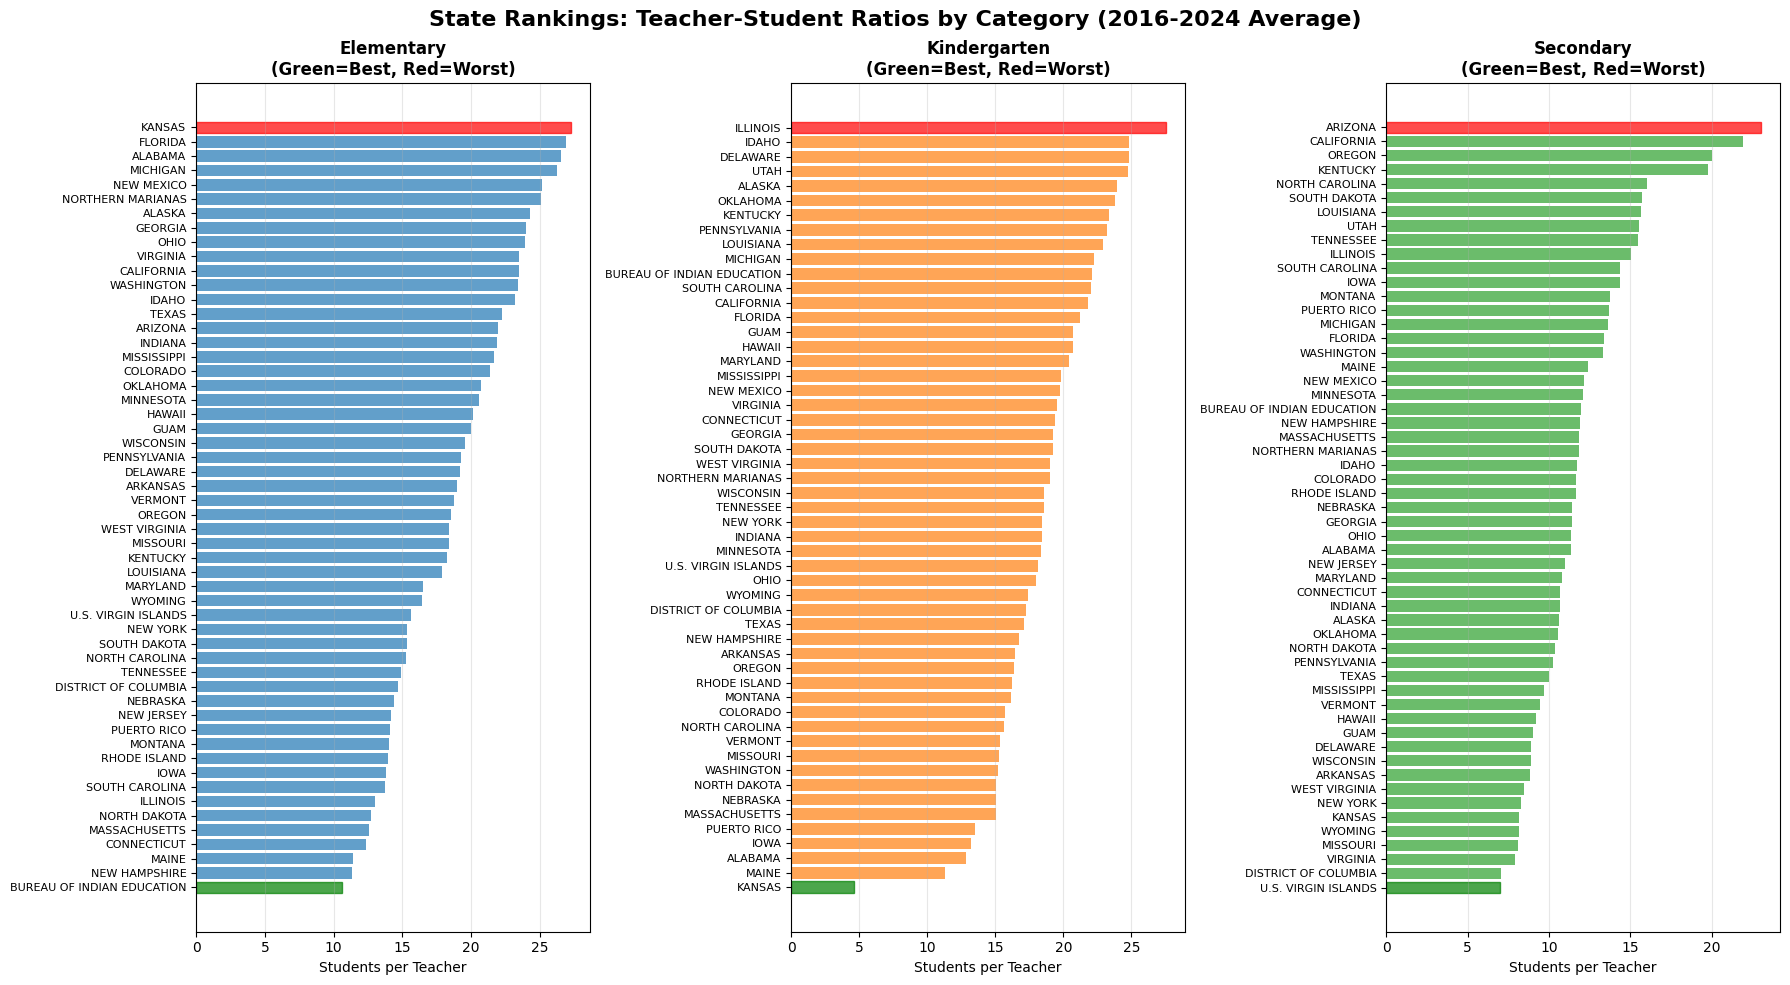


STATE TRENDS OVER TIME

ELEMENTARY - Selected States for Trend Analysis:
  BUREAU OF INDIAN EDUCATION: 10.6 average
  KANSAS: 27.3 average
  VERMONT: 18.7 average
  CALIFORNIA: 23.5 average

KINDERGARTEN - Selected States for Trend Analysis:
  KANSAS: 4.6 average
  ILLINOIS: 27.6 average
  TENNESSEE: 18.6 average
  CALIFORNIA: 21.8 average

SECONDARY - Selected States for Trend Analysis:
  U.S. VIRGIN ISLANDS: 7.0 average
  ARIZONA: 23.0 average
  NEBRASKA: 11.4 average
  CALIFORNIA: 21.9 average


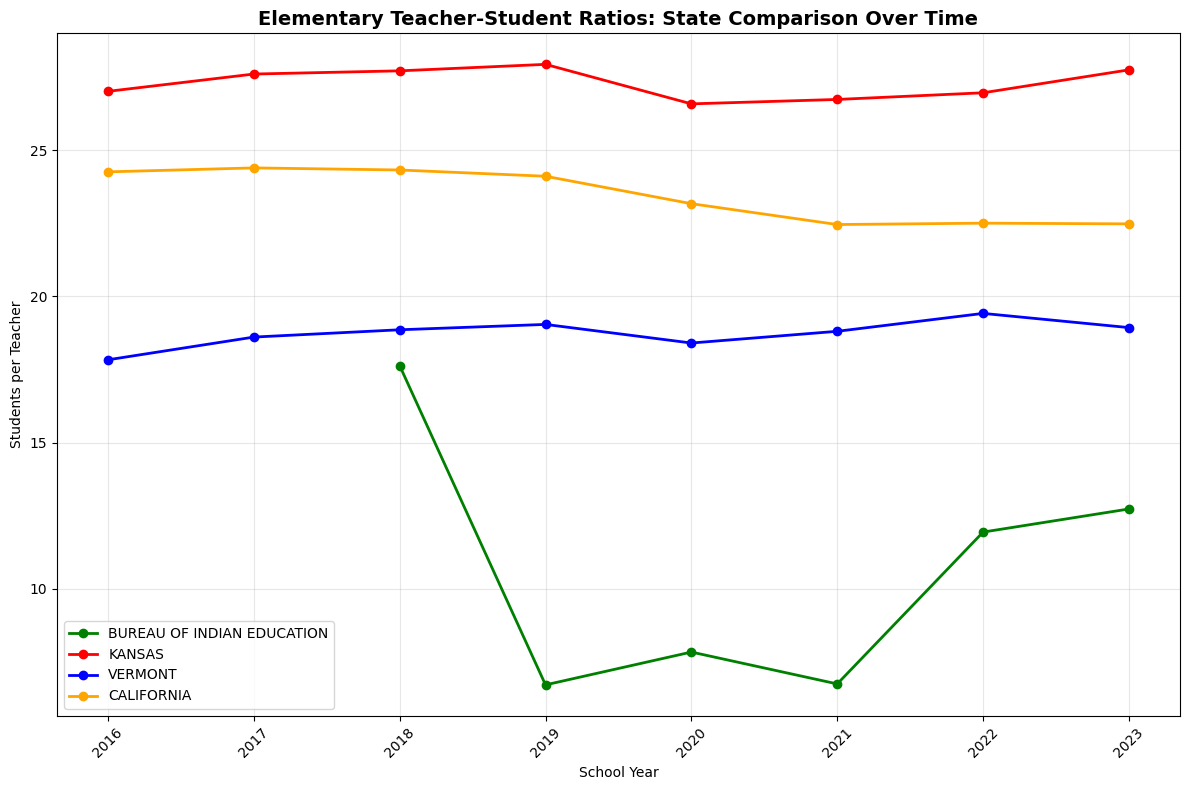

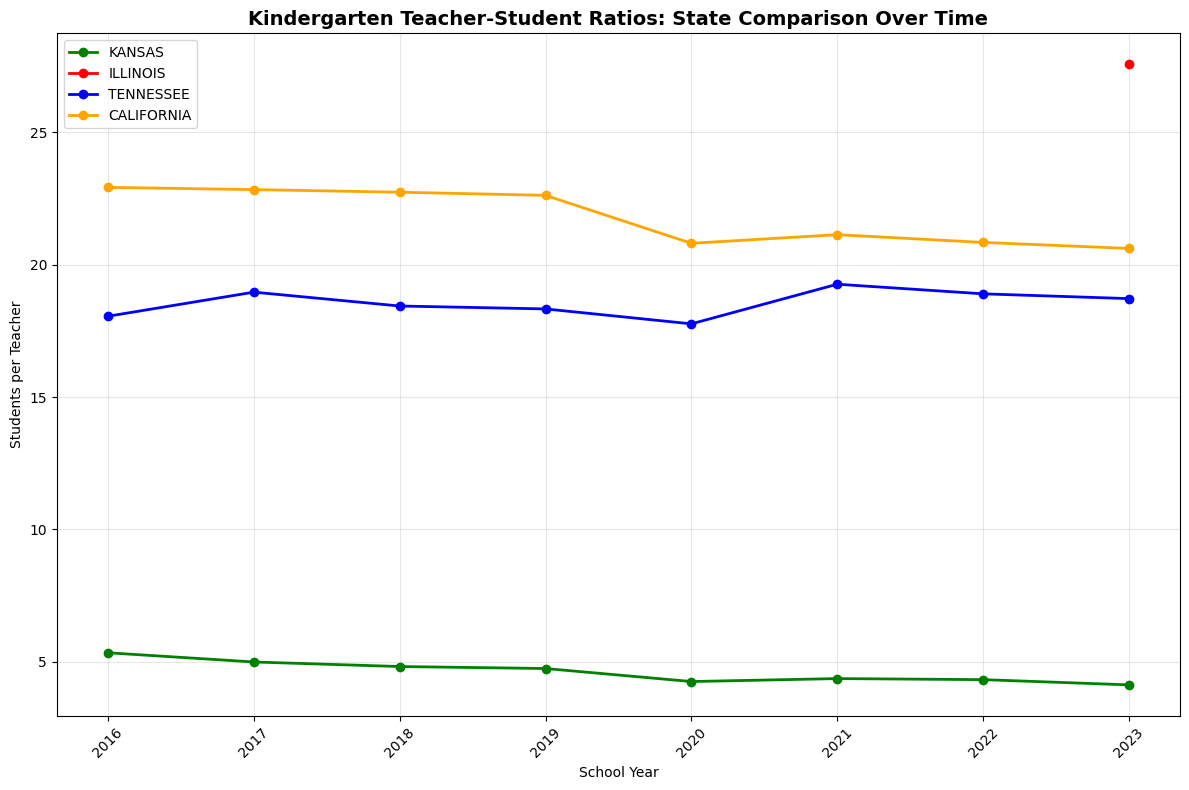

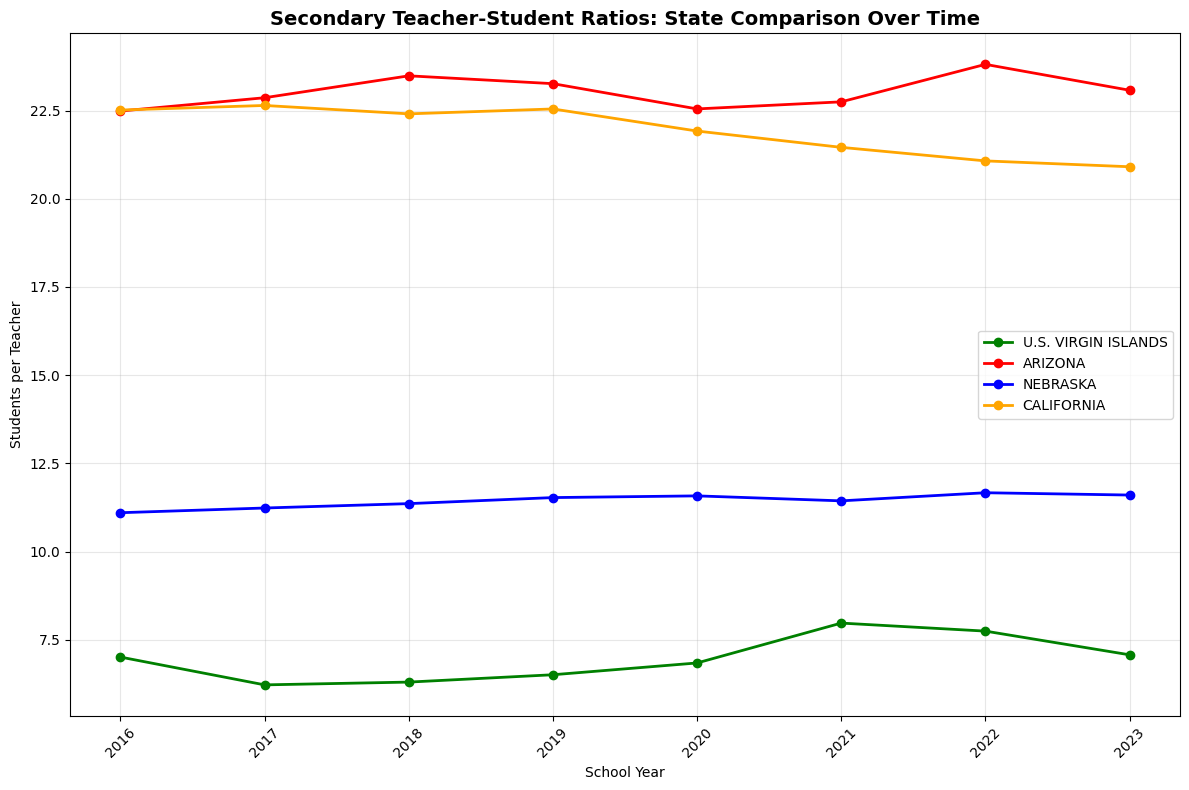


COVID IMPACT BY STATE


NameError: name 'ratios_clean' is not defined

In [167]:
# State-Level Teacher-Student Ratio Analysis - Session 2
# Focus on state comparisons, rankings, and individual state trends

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better looking plots
plt.style.use('default')
sns.set_palette("husl")

# =============================================================================
# 1. STATE RANKINGS - BEST AND WORST PERFORMERS
# =============================================================================

print("="*70)
print("STATE RANKINGS: BEST AND WORST TEACHER-STUDENT RATIOS")
print("="*70)

# Calculate average ratios by state across all years (2016-2024)
state_averages = ratios_final_capped.groupby(['STATENAME', 'Grade_Category'])['TEACHER_STUDENT_RATIO'].mean().reset_index()

# Get available categories
grade_categories = state_averages['Grade_Category'].unique()
print(f"Available categories: {grade_categories}")

# Create rankings for each category
for category in grade_categories:
    print(f"\n{category.upper()} RATIOS (2016-2024 Average)")
    print("-" * 50)
    
    # Get category data and sort
    category_data = state_averages[state_averages['Grade_Category'] == category].copy()
    category_data = category_data.sort_values('TEACHER_STUDENT_RATIO')
    
    # Best performers (lowest ratios = smaller classes)
    print("🏆 BEST (Smallest Classes):")
    best_5 = category_data.head(5)
    for idx, row in best_5.iterrows():
        print(f"   {row['STATENAME']}: {row['TEACHER_STUDENT_RATIO']:.1f} students per teacher")
    
    # Worst performers (highest ratios = larger classes)  
    print("\n⚠️  WORST (Largest Classes):")
    worst_5 = category_data.tail(5)
    for idx, row in worst_5.iterrows():
        print(f"   {row['STATENAME']}: {row['TEACHER_STUDENT_RATIO']:.1f} students per teacher")

# =============================================================================
# 2. STATE RANKINGS VISUALIZATION
# =============================================================================

# Create ranking visualizations
fig, axes = plt.subplots(1, len(grade_categories), figsize=(6*len(grade_categories), 10))
if len(grade_categories) == 1:
    axes = [axes]

fig.suptitle('State Rankings: Teacher-Student Ratios by Category (2016-2024 Average)', 
             fontsize=16, fontweight='bold')

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, category in enumerate(grade_categories):
    ax = axes[i]
    
    # Get and sort data
    category_data = state_averages[state_averages['Grade_Category'] == category].copy()
    category_data = category_data.sort_values('TEACHER_STUDENT_RATIO')
    
    # Create horizontal bar chart
    y_pos = range(len(category_data))
    bars = ax.barh(y_pos, category_data['TEACHER_STUDENT_RATIO'], color=colors[i], alpha=0.7)
    
    # Highlight best and worst
    bars[0].set_color('green')  # Best (lowest ratio)
    bars[-1].set_color('red')   # Worst (highest ratio)
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(category_data['STATENAME'], fontsize=8)
    ax.set_xlabel('Students per Teacher')
    ax.set_title(f'{category}\n(Green=Best, Red=Worst)', fontweight='bold')
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 3. MULTI-STATE TRENDS OVER TIME
# =============================================================================

print("\n" + "="*70)
print("STATE TRENDS OVER TIME")
print("="*70)

# Select interesting states to compare (best, worst, and some middle performers)
for category in grade_categories:
    category_data = state_averages[state_averages['Grade_Category'] == category].copy()
    category_data = category_data.sort_values('TEACHER_STUDENT_RATIO')
    
    # Pick diverse states to showcase
    best_state = category_data.iloc[0]['STATENAME']
    worst_state = category_data.iloc[-1]['STATENAME']
    median_idx = len(category_data) // 2
    middle_state = category_data.iloc[median_idx]['STATENAME']
    
    # Also include some large populous states if available
    large_states = ['CALIFORNIA', 'TEXAS', 'NEW YORK', 'PENNSYLVANIA']
    available_large = [state for state in large_states if state in category_data['STATENAME'].values]
    
    # Select final comparison states
    comparison_states = [best_state, worst_state, middle_state]
    if available_large:
        comparison_states.append(available_large[0])  # Add one large state
    
    # Remove duplicates while preserving order
    comparison_states = list(dict.fromkeys(comparison_states))
    
    print(f"\n{category.upper()} - Selected States for Trend Analysis:")
    for state in comparison_states:
        avg_ratio = category_data[category_data['STATENAME'] == state]['TEACHER_STUDENT_RATIO'].iloc[0]
        print(f"  {state}: {avg_ratio:.1f} average")

# Create trend visualization for each category
for category in grade_categories:
    # Get the comparison states for this category
    category_data = state_averages[state_averages['Grade_Category'] == category].copy()
    category_data = category_data.sort_values('TEACHER_STUDENT_RATIO')
    
    best_state = category_data.iloc[0]['STATENAME']
    worst_state = category_data.iloc[-1]['STATENAME']
    median_idx = len(category_data) // 2
    middle_state = category_data.iloc[median_idx]['STATENAME']
    
    large_states = ['CALIFORNIA', 'TEXAS', 'NEW YORK', 'PENNSYLVANIA']
    available_large = [state for state in large_states if state in category_data['STATENAME'].values]
    
    comparison_states = [best_state, worst_state, middle_state]
    if available_large:
        comparison_states.append(available_large[0])
    comparison_states = list(dict.fromkeys(comparison_states))
    
    # Plot trends over time
    plt.figure(figsize=(12, 8))
    
    colors_trend = ['green', 'red', 'blue', 'orange', 'purple']
    
    for i, state in enumerate(comparison_states):
        # Get time series data for this state and sort by year
        state_trend = ratios_final_capped[
            (ratios_final_capped['STATENAME'] == state) & 
            (ratios_final_capped['Grade_Category'] == category)
        ][['YEAR', 'TEACHER_STUDENT_RATIO']].copy()
        
        # Sort by year to ensure chronological order
        state_trend = state_trend.sort_values('YEAR')
        
        # Convert YEAR to numeric for proper plotting
        state_trend['YEAR_NUM'] = state_trend['YEAR'].str[:4].astype(int)
        
        plt.plot(state_trend['YEAR_NUM'], state_trend['TEACHER_STUDENT_RATIO'], 
                marker='o', linewidth=2, markersize=6, label=state, color=colors_trend[i])
    
    plt.title(f'{category} Teacher-Student Ratios: State Comparison Over Time', 
              fontweight='bold', fontsize=14)
    plt.xlabel('School Year')
    plt.ylabel('Students per Teacher')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# =============================================================================
# 4. STATE-LEVEL COVID IMPACT ANALYSIS
# =============================================================================

print("\n" + "="*70)
print("COVID IMPACT BY STATE")
print("="*70)

# Define COVID periods
pre_covid = '2018-2019'
covid_peak = '2020-2021'  
post_covid = '2023-2024'

# Calculate COVID impact for each state using clean data
covid_impacts = []

for category in grade_categories:
    for state in ratios_clean['STATENAME'].unique():
        state_data = ratios_clean[
            (ratios_clean['STATENAME'] == state) & 
            (ratios_clean['Grade_Category'] == category)
        ]
        
        # Check if we have the required years
        available_years = state_data['YEAR'].unique()
        if all(year in available_years for year in [pre_covid, covid_peak, post_covid]):
            
            pre_val = state_data[state_data['YEAR'] == pre_covid]['TEACHER_STUDENT_RATIO'].iloc[0]
            covid_val = state_data[state_data['YEAR'] == covid_peak]['TEACHER_STUDENT_RATIO'].iloc[0]
            post_val = state_data[state_data['YEAR'] == post_covid]['TEACHER_STUDENT_RATIO'].iloc[0]
            
            covid_impact = covid_val - pre_val
            recovery = post_val - covid_val
            net_change = post_val - pre_val
            
            covid_impacts.append({
                'STATE': state,
                'CATEGORY': category,
                'PRE_COVID': pre_val,
                'COVID_PEAK': covid_val,
                'POST_COVID': post_val,
                'COVID_IMPACT': covid_impact,
                'RECOVERY': recovery,
                'NET_CHANGE': net_change
            })

# Convert to DataFrame
covid_df = pd.DataFrame(covid_impacts)

# Show biggest COVID impacts by category
for category in grade_categories:
    print(f"\n{category.upper()} - COVID IMPACT RANKINGS")
    print("-" * 45)
    
    category_covid = covid_df[covid_df['CATEGORY'] == category].copy()
    
    # States with biggest COVID impact (most increase in ratios)
    biggest_impact = category_covid.nlargest(5, 'COVID_IMPACT')
    print("🔺 Biggest COVID Impact (Ratios Increased Most):")
    for _, row in biggest_impact.iterrows():
        print(f"   {row['STATE']}: +{row['COVID_IMPACT']:.2f} students per teacher")
    
    # States with smallest/negative COVID impact (ratios decreased or stayed stable)
    smallest_impact = category_covid.nsmallest(5, 'COVID_IMPACT')
    print("\n🔽 Smallest COVID Impact (Ratios Most Stable/Decreased):")
    for _, row in smallest_impact.iterrows():
        print(f"   {row['STATE']}: {row['COVID_IMPACT']:+.2f} students per teacher")

print("\n" + "="*70)
print("STATE-LEVEL ANALYSIS COMPLETE")
print("="*70)

IDENTIFYING STATES WITH NORMAL, CREDIBLE RATIOS
Defined normal ranges:
  Elementary: 14-22 students per teacher
  Secondary: 10-18 students per teacher
  Kindergarten: 12-20 students per teacher

States with normal ratios across all categories: 9
  COLORADO
  INDIANA
  MINNESOTA
  MONTANA
  NEBRASKA
  NEW JERSEY
  NORTH CAROLINA
  SOUTH DAKOTA
  TENNESSEE

Selected states for detailed analysis: ['MINNESOTA', 'COLORADO', 'NORTH CAROLINA']


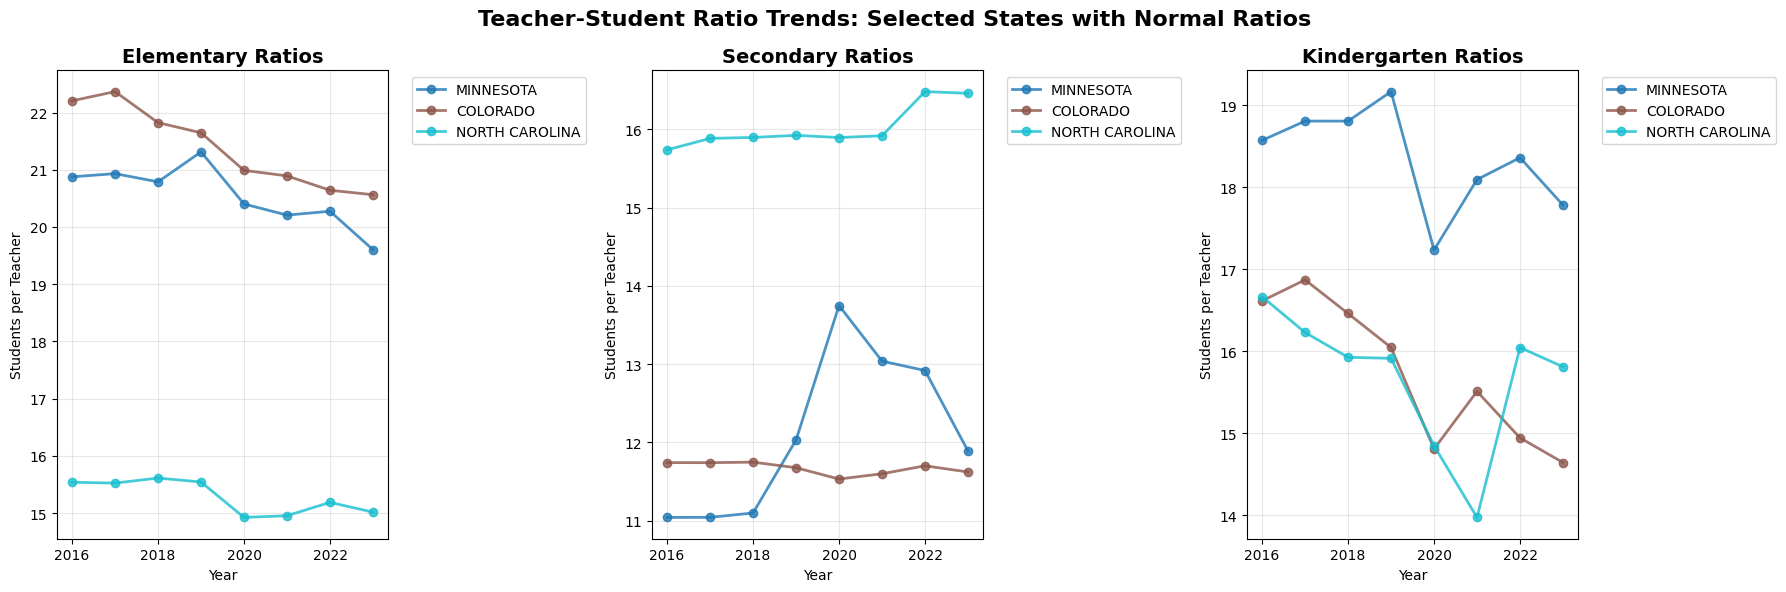


ELEMENTARY VS SECONDARY COMPARISON
Elementary vs Secondary Ratios (2016-2024 Average):
------------------------------------------------------------
MINNESOTA            Elementary: 20.5  Secondary: 12.1  Diff: +8.4
COLORADO             Elementary: 21.4  Secondary: 11.7  Diff: +9.7
NORTH CAROLINA       Elementary: 15.3  Secondary: 16.0  Diff: +-0.7


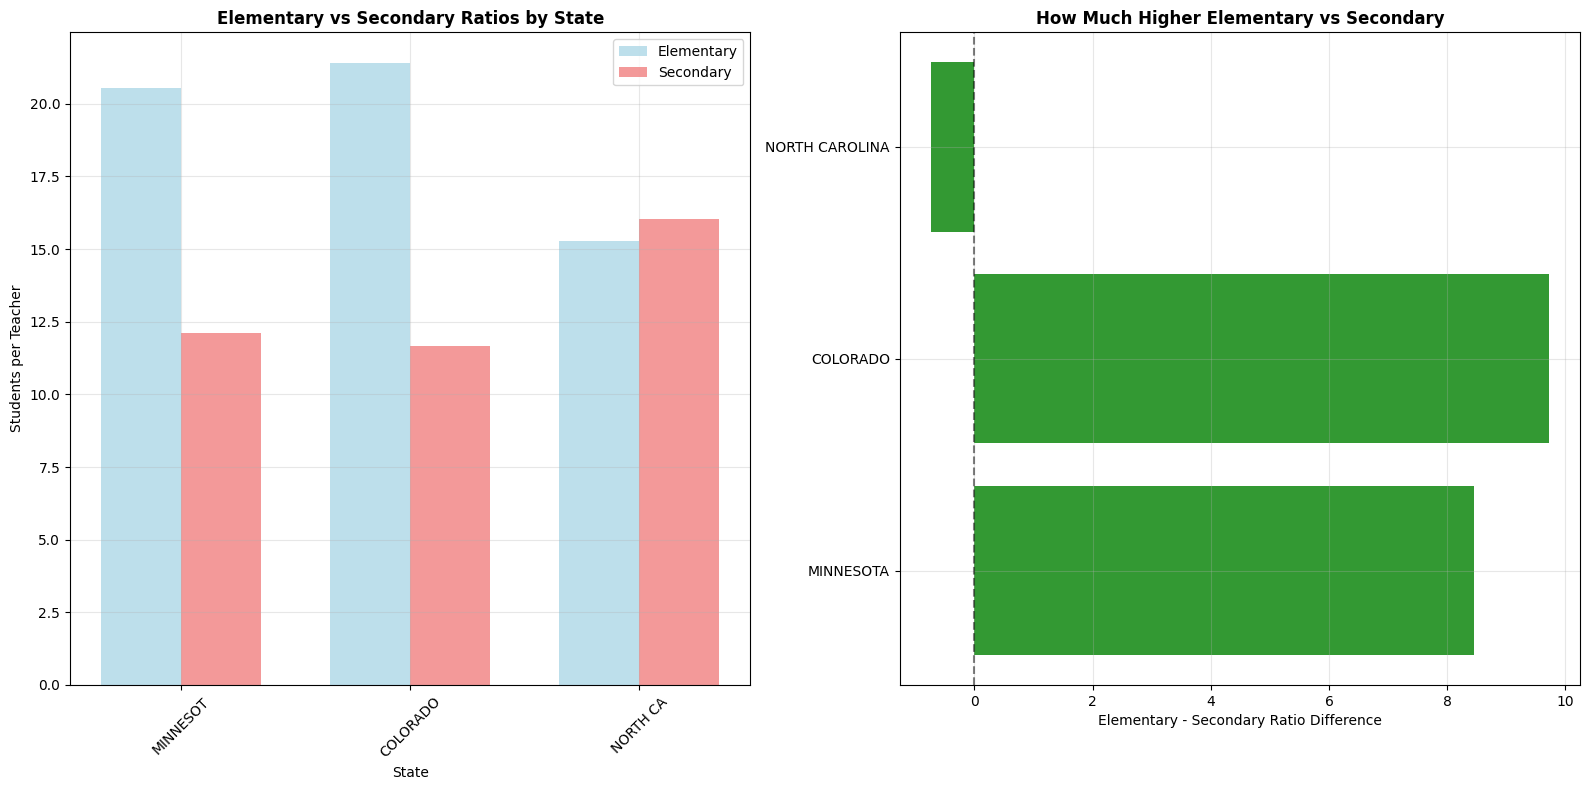


TREND SUMMARY FOR NORMAL STATES

ELEMENTARY (Selected Normal States):
  2016-17 Average: 19.5 students per teacher
  2023-24 Average: 18.4 students per teacher
  8-Year Change: -1.1 students per teacher
  📉 Ratios DECREASED (improved - smaller classes)

SECONDARY (Selected Normal States):
  2016-17 Average: 12.8 students per teacher
  2023-24 Average: 13.3 students per teacher
  8-Year Change: +0.5 students per teacher
  📈 Ratios INCREASED (larger classes)

KINDERGARTEN (Selected Normal States):
  2016-17 Average: 17.3 students per teacher
  2023-24 Average: 16.1 students per teacher
  8-Year Change: -1.2 students per teacher
  📉 Ratios DECREASED (improved - smaller classes)

CLEAN STATE ANALYSIS COMPLETE


In [169]:
# Clean State Analysis - Focus on States with Normal, Credible Ratios
# Final analysis looking at reasonable states over time

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
plt.style.use('default')
sns.set_palette("tab10")

# =============================================================================
# 1. IDENTIFY STATES WITH NORMAL RATIOS
# =============================================================================

print("="*70)
print("IDENTIFYING STATES WITH NORMAL, CREDIBLE RATIOS")
print("="*70)

# Calculate average ratios by state across all years
state_averages = ratios_final_capped.groupby(['STATENAME', 'Grade_Category'])['TEACHER_STUDENT_RATIO'].mean().reset_index()

# Define "normal" ratio ranges based on what seems reasonable
normal_ranges = {
    'Elementary': (14, 22),      # 14-22 students per teacher seems reasonable
    'Secondary': (10, 18),       # 10-18 students per teacher seems reasonable  
    'Kindergarten': (12, 20)     # 12-20 students per teacher seems reasonable
}

print("Defined normal ranges:")
for category, (min_val, max_val) in normal_ranges.items():
    print(f"  {category}: {min_val}-{max_val} students per teacher")

# Find states that have normal ratios across ALL categories they report
normal_states = set()
all_states = state_averages['STATENAME'].unique()

# Exclude territories from the start
territories = ['U.S. VIRGIN ISLANDS', 'PUERTO RICO', 'DISTRICT OF COLUMBIA']
states_only = [state for state in all_states if state not in territories]

for state in states_only:
    state_data = state_averages[state_averages['STATENAME'] == state]
    is_normal = True
    
    for _, row in state_data.iterrows():
        category = row['Grade_Category']
        ratio = row['TEACHER_STUDENT_RATIO']
        
        if category in normal_ranges:
            min_val, max_val = normal_ranges[category]
            if not (min_val <= ratio <= max_val):
                is_normal = False
                break
    
    if is_normal:
        normal_states.add(state)

normal_states = sorted(list(normal_states))

print(f"\nStates with normal ratios across all categories: {len(normal_states)}")
for state in normal_states[:10]:  # Show first 10
    print(f"  {state}")

if len(normal_states) > 10:
    print(f"  ... and {len(normal_states) - 10} more")

# =============================================================================
# 2. SELECT REPRESENTATIVE STATES FOR ANALYSIS  
# =============================================================================

# Pick a diverse set of normal states for detailed analysis
# Include different regions and sizes

representative_states = []

# Large states that are normal
large_states = ['CALIFORNIA', 'TEXAS', 'NEW YORK', 'PENNSYLVANIA', 'ILLINOIS']
large_normal = [state for state in large_states if state in normal_states]
if large_normal:
    representative_states.extend(large_normal[:2])  # Take 2 large states

# Medium states from different regions
medium_states = ['VIRGINIA', 'WASHINGTON', 'MASSACHUSETTS', 'MINNESOTA', 'COLORADO', 'NORTH CAROLINA']
medium_normal = [state for state in medium_states if state in normal_states]
if medium_normal:
    representative_states.extend(medium_normal[:3])  # Take 3 medium states

# Small states
small_states = ['MAINE', 'VERMONT', 'NEW HAMPSHIRE', 'DELAWARE', 'RHODE ISLAND']
small_normal = [state for state in small_states if state in normal_states]
if small_normal:
    representative_states.extend(small_normal[:2])  # Take 2 small states

# Remove duplicates and ensure we have states to analyze
representative_states = list(dict.fromkeys(representative_states))

if not representative_states:
    # Fallback - just pick some states with reasonable ratios
    print("No states meet all criteria, selecting fallback states...")
    representative_states = ['VIRGINIA', 'MASSACHUSETTS', 'MINNESOTA', 'COLORADO', 'MAINE']
    representative_states = [s for s in representative_states if s in states_only]

print(f"\nSelected states for detailed analysis: {representative_states}")

# =============================================================================
# 3. TIME TRENDS FOR SELECTED STATES
# =============================================================================

# Get data for selected states only
selected_data = ratios_final_capped[
    (ratios_final_capped['STATENAME'].isin(representative_states)) &
    (ratios_final_capped['Grade_Category'].isin(['Elementary', 'Secondary', 'Kindergarten']))
].copy()

# Create time trends visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Teacher-Student Ratio Trends: Selected States with Normal Ratios', fontsize=16, fontweight='bold')

categories = ['Elementary', 'Secondary', 'Kindergarten']
colors = plt.cm.tab10(np.linspace(0, 1, len(representative_states)))

for i, category in enumerate(categories):
    ax = axes[i]
    
    # Plot each state
    for j, state in enumerate(representative_states):
        state_cat_data = selected_data[
            (selected_data['STATENAME'] == state) & 
            (selected_data['Grade_Category'] == category)
        ].copy()
        
        if len(state_cat_data) > 0:
            # Sort by year and convert to numeric
            state_cat_data = state_cat_data.sort_values('YEAR')
            state_cat_data['YEAR_NUM'] = state_cat_data['YEAR'].str[:4].astype(int)
            
            ax.plot(state_cat_data['YEAR_NUM'], state_cat_data['TEACHER_STUDENT_RATIO'],
                   marker='o', linewidth=2, label=state, color=colors[j], alpha=0.8)
    
    ax.set_title(f'{category} Ratios', fontweight='bold', fontsize=14)
    ax.set_xlabel('Year')
    ax.set_ylabel('Students per Teacher')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 4. ELEMENTARY VS SECONDARY SPLIT ANALYSIS
# =============================================================================

print("\n" + "="*70)
print("ELEMENTARY VS SECONDARY COMPARISON")
print("="*70)

# Compare elementary vs secondary for each selected state
comparison_data = []

for state in representative_states:
    state_data = selected_data[selected_data['STATENAME'] == state]
    
    # Get average ratios across all years
    elementary_avg = state_data[state_data['Grade_Category'] == 'Elementary']['TEACHER_STUDENT_RATIO'].mean()
    secondary_avg = state_data[state_data['Grade_Category'] == 'Secondary']['TEACHER_STUDENT_RATIO'].mean()
    
    if pd.notna(elementary_avg) and pd.notna(secondary_avg):
        comparison_data.append({
            'STATE': state,
            'ELEMENTARY': elementary_avg,
            'SECONDARY': secondary_avg,
            'DIFFERENCE': elementary_avg - secondary_avg
        })

comparison_df = pd.DataFrame(comparison_data)

# Show the comparison
print("Elementary vs Secondary Ratios (2016-2024 Average):")
print("-" * 60)
for _, row in comparison_df.iterrows():
    print(f"{row['STATE']:<20} Elementary: {row['ELEMENTARY']:.1f}  Secondary: {row['SECONDARY']:.1f}  Diff: +{row['DIFFERENCE']:.1f}")

# Create comparison visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Bar chart comparison
x = np.arange(len(comparison_df))
width = 0.35

bars1 = ax1.bar(x - width/2, comparison_df['ELEMENTARY'], width, label='Elementary', alpha=0.8, color='lightblue')
bars2 = ax1.bar(x + width/2, comparison_df['SECONDARY'], width, label='Secondary', alpha=0.8, color='lightcoral')

ax1.set_xlabel('State')
ax1.set_ylabel('Students per Teacher')
ax1.set_title('Elementary vs Secondary Ratios by State', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels([state[:8] for state in comparison_df['STATE']], rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Difference plot
ax2.barh(comparison_df['STATE'], comparison_df['DIFFERENCE'], alpha=0.8, color='green')
ax2.set_xlabel('Elementary - Secondary Ratio Difference')
ax2.set_title('How Much Higher Elementary vs Secondary', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axvline(x=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# =============================================================================
# 5. TREND SUMMARY
# =============================================================================

print("\n" + "="*70)
print("TREND SUMMARY FOR NORMAL STATES")
print("="*70)

# Calculate overall trends for these normal states
for category in categories:
    category_data = selected_data[selected_data['Grade_Category'] == category].copy()
    
    if len(category_data) > 0:
        # Group by year to get annual averages across selected states
        yearly_avg = category_data.groupby('YEAR')['TEACHER_STUDENT_RATIO'].mean()
        
        if len(yearly_avg) >= 2:
            first_year_avg = yearly_avg.iloc[0]
            last_year_avg = yearly_avg.iloc[-1]
            total_change = last_year_avg - first_year_avg
            
            print(f"\n{category.upper()} (Selected Normal States):")
            print(f"  2016-17 Average: {first_year_avg:.1f} students per teacher")
            print(f"  2023-24 Average: {last_year_avg:.1f} students per teacher") 
            print(f"  8-Year Change: {total_change:+.1f} students per teacher")
            
            if total_change < -0.2:
                print(f"  📉 Ratios DECREASED (improved - smaller classes)")
            elif total_change > 0.2:
                print(f"  📈 Ratios INCREASED (larger classes)")  
            else:
                print(f"  ➡️ Ratios STABLE")

print("\n" + "="*70)
print("CLEAN STATE ANALYSIS COMPLETE")
print("="*70)

In [171]:
# Find states with highest ratios in each category (excluding problematic ones)
print("="*70)
print("FINDING STATES WITH HIGHEST RATIOS BY CATEGORY")
print("="*70)

# Exclude problematic states
problematic_states = ['KANSAS', 'FLORIDA', 'U.S. VIRGIN ISLANDS', 'PUERTO RICO', 'DISTRICT OF COLUMBIA']
clean_state_averages = state_averages[~state_averages['STATENAME'].isin(problematic_states)]

# Find top 10 highest ratios for each category
categories = ['Elementary', 'Secondary', 'Kindergarten']

high_ratio_states = set()

for category in categories:
    print(f"\n{category.upper()} - TOP 10 HIGHEST RATIOS:")
    print("-" * 40)
    
    category_data = clean_state_averages[clean_state_averages['Grade_Category'] == category].copy()
    category_data = category_data.sort_values('TEACHER_STUDENT_RATIO', ascending=False)
    
    top_10 = category_data.head(10)
    for i, (_, row) in enumerate(top_10.iterrows(), 1):
        print(f"{i:2d}. {row['STATENAME']:<20} {row['TEACHER_STUDENT_RATIO']:.1f} students per teacher")
        if i <= 5:  # Add top 5 from each category to our analysis set
            high_ratio_states.add(row['STATENAME'])

# Convert to sorted list
high_ratio_states = sorted(list(high_ratio_states))

print(f"\nSelected high-ratio states for analysis: {len(high_ratio_states)}")
for state in high_ratio_states:
    print(f"  {state}")

# Update representative_states to use these high-ratio states
representative_states = high_ratio_states[:8]  # Take first 8 for manageable visualization

print(f"\nFinal selection for detailed analysis: {representative_states}")

FINDING STATES WITH HIGHEST RATIOS BY CATEGORY

ELEMENTARY - TOP 10 HIGHEST RATIOS:
----------------------------------------
 1. ALABAMA              26.5 students per teacher
 2. MICHIGAN             26.3 students per teacher
 3. NEW MEXICO           25.1 students per teacher
 4. NORTHERN MARIANAS    25.1 students per teacher
 5. ALASKA               24.3 students per teacher
 6. GEORGIA              24.0 students per teacher
 7. OHIO                 23.9 students per teacher
 8. VIRGINIA             23.5 students per teacher
 9. CALIFORNIA           23.5 students per teacher
10. WASHINGTON           23.4 students per teacher

SECONDARY - TOP 10 HIGHEST RATIOS:
----------------------------------------
 1. ARIZONA              23.0 students per teacher
 2. CALIFORNIA           21.9 students per teacher
 3. OREGON               20.0 students per teacher
 4. KENTUCKY             19.7 students per teacher
 5. NORTH CAROLINA       16.0 students per teacher
 6. SOUTH DAKOTA         15.7 stu

HIGH-RATIO STATES ANALYSIS
Analyzing: ALABAMA, ALASKA, ARIZONA, CALIFORNIA, DELAWARE, IDAHO, ILLINOIS, KENTUCKY

Data shape: (165, 7)


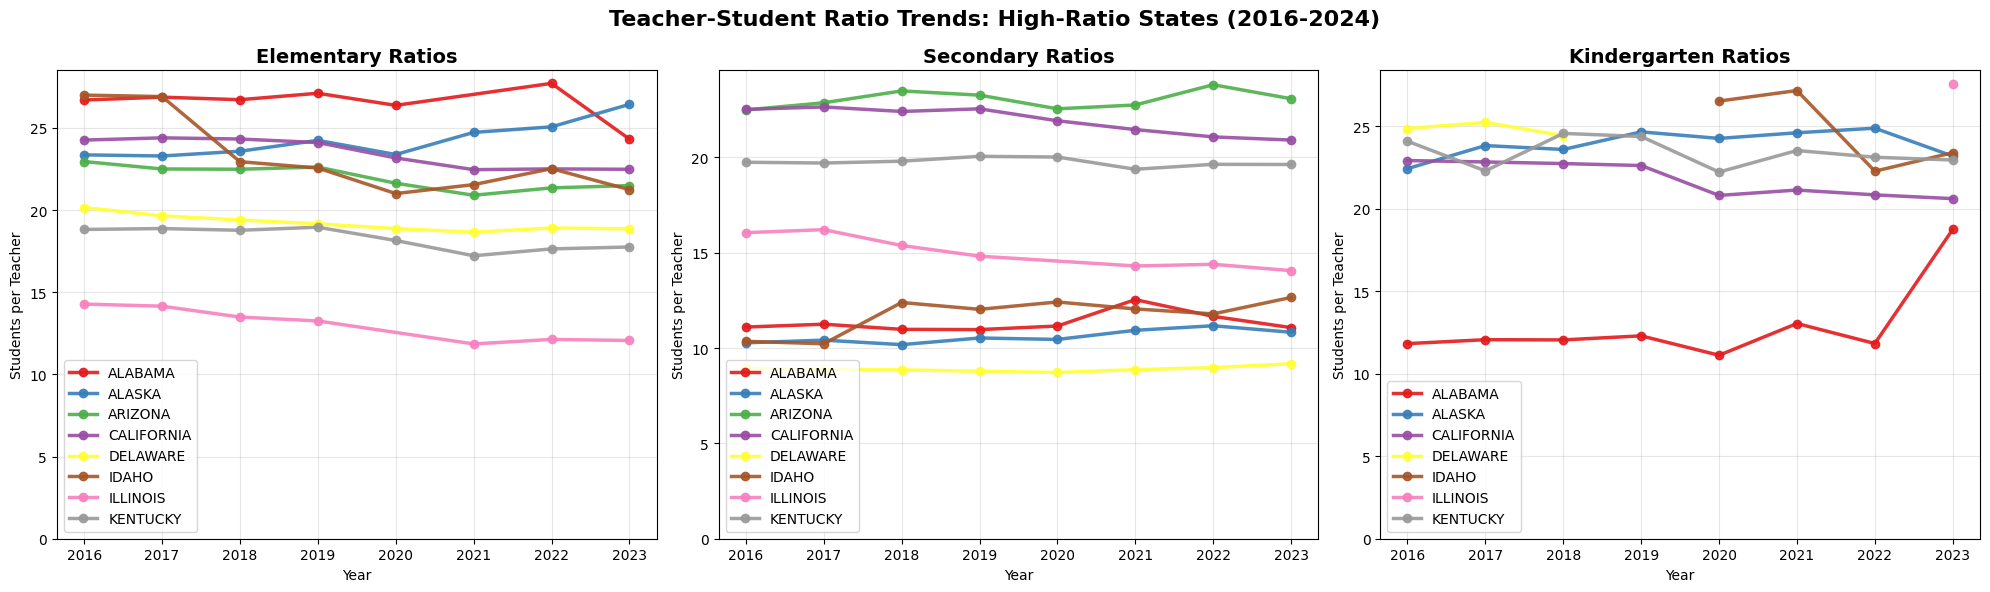


ELEMENTARY VS SECONDARY VS KINDERGARTEN COMPARISON
Average Ratios by State (2016-2024):
--------------------------------------------------
ALABAMA     Elem:  26.5  Sec:  11.3  Kinder:  12.9
ALASKA      Elem:  24.3  Sec:  10.6  Kinder:  23.9
ARIZONA     Elem:  22.0  Sec:  23.0  
CALIFORNIA  Elem:  23.5  Sec:  21.9  Kinder:  21.8
DELAWARE    Elem:  19.2  Sec:   8.9  Kinder:  24.8
IDAHO       Elem:  23.2  Sec:  11.7  Kinder:  24.8
ILLINOIS    Elem:  13.0  Sec:  15.0  Kinder:  27.6
KENTUCKY    Elem:  18.3  Sec:  19.7  Kinder:  23.4


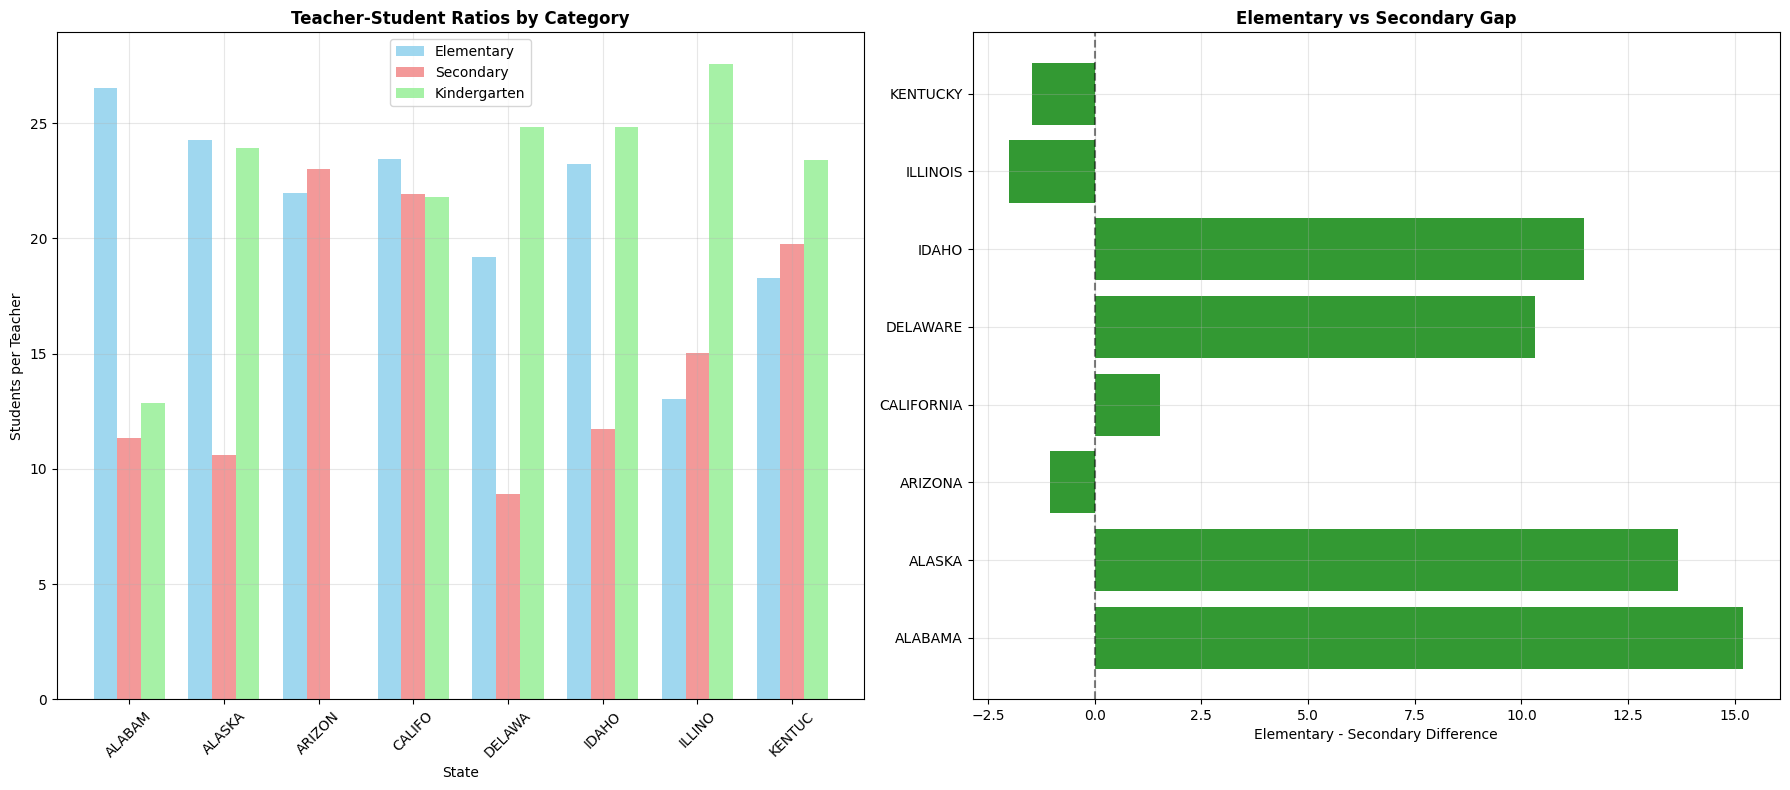


8-YEAR TREND SUMMARY

ELEMENTARY TRENDS:
----------------------------------------
ALABAMA       26.7 →  24.3 ( -2.4) 📉 IMPROVED
ALASKA        23.4 →  26.4 ( +3.1) 📈 WORSENED
ARIZONA       22.9 →  21.5 ( -1.5) 📉 IMPROVED
CALIFORNIA    24.3 →  22.5 ( -1.8) 📉 IMPROVED
DELAWARE      20.1 →  18.9 ( -1.3) 📉 IMPROVED
IDAHO         27.0 →  21.2 ( -5.8) 📉 IMPROVED
ILLINOIS      14.3 →  12.1 ( -2.2) 📉 IMPROVED
KENTUCKY      18.8 →  17.8 ( -1.1) 📉 IMPROVED

SUMMARY: Average change = -1.6
         7 improving, 0 stable, 1 worsening

SECONDARY TRENDS:
----------------------------------------
ALABAMA       11.1 →  11.1 ( -0.0) ➡️ STABLE
ALASKA        10.3 →  10.8 ( +0.6) 📈 WORSENED
ARIZONA       22.5 →  23.1 ( +0.6) 📈 WORSENED
CALIFORNIA    22.5 →  20.9 ( -1.6) 📉 IMPROVED
DELAWARE       8.9 →   9.2 ( +0.2) ➡️ STABLE
IDAHO         10.4 →  12.7 ( +2.3) 📈 WORSENED
ILLINOIS      16.0 →  14.1 ( -2.0) 📉 IMPROVED
KENTUCKY      19.7 →  19.6 ( -0.1) ➡️ STABLE

SUMMARY: Average change = -0.0
         2 impro

In [172]:
# Focused Analysis: High-Ratio States
# Clean, detailed analysis of 8 states with highest teacher-student ratios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
plt.style.use('default')
sns.set_palette("tab10")

# =============================================================================
# PART 1: TIME TRENDS FOR SELECTED HIGH-RATIO STATES
# =============================================================================

# Selected high-ratio states
selected_states = ['ALABAMA', 'ALASKA', 'ARIZONA', 'CALIFORNIA', 'DELAWARE', 'IDAHO', 'ILLINOIS', 'KENTUCKY']

print("="*70)
print("HIGH-RATIO STATES ANALYSIS")
print("="*70)
print(f"Analyzing: {', '.join(selected_states)}")

# Get data for selected states
data = ratios_final_capped[
    (ratios_final_capped['STATENAME'].isin(selected_states)) &
    (ratios_final_capped['Grade_Category'].isin(['Elementary', 'Secondary', 'Kindergarten']))
].copy()

# Convert year to numeric for plotting
data['YEAR_NUM'] = data['YEAR'].str[:4].astype(int)

print(f"\nData shape: {data.shape}")

# Create time trend plots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Teacher-Student Ratio Trends: High-Ratio States (2016-2024)', fontsize=16, fontweight='bold')

categories = ['Elementary', 'Secondary', 'Kindergarten']
colors = plt.cm.Set1(np.linspace(0, 1, len(selected_states)))

for i, category in enumerate(categories):
    ax = axes[i]
    
    # Plot each state
    for j, state in enumerate(selected_states):
        state_data = data[
            (data['STATENAME'] == state) & 
            (data['Grade_Category'] == category)
        ].copy()
        
        if len(state_data) > 0:
            state_data = state_data.sort_values('YEAR_NUM')
            
            ax.plot(state_data['YEAR_NUM'], state_data['TEACHER_STUDENT_RATIO'],
                   marker='o', linewidth=2.5, markersize=6, 
                   label=state, color=colors[j], alpha=0.9)
    
    ax.set_title(f'{category} Ratios', fontweight='bold', fontsize=14)
    ax.set_xlabel('Year')
    ax.set_ylabel('Students per Teacher')
    ax.legend(fontsize=10, loc='best')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()

# =============================================================================
# PART 2: ELEMENTARY VS SECONDARY SPLITS (INCLUDING KINDERGARTEN)
# =============================================================================

print("\n" + "="*70)
print("ELEMENTARY VS SECONDARY VS KINDERGARTEN COMPARISON")
print("="*70)

# Calculate average ratios by state and category
state_category_avg = data.groupby(['STATENAME', 'Grade_Category'])['TEACHER_STUDENT_RATIO'].mean().reset_index()

# Pivot for easier comparison
comparison_pivot = state_category_avg.pivot(index='STATENAME', columns='Grade_Category', values='TEACHER_STUDENT_RATIO')

# Fill any missing values and display
comparison_pivot = comparison_pivot.fillna(0)
print("Average Ratios by State (2016-2024):")
print("-" * 50)

# Custom formatting for display
for state in comparison_pivot.index:
    elem = comparison_pivot.loc[state, 'Elementary'] if 'Elementary' in comparison_pivot.columns else 0
    sec = comparison_pivot.loc[state, 'Secondary'] if 'Secondary' in comparison_pivot.columns else 0
    kinder = comparison_pivot.loc[state, 'Kindergarten'] if 'Kindergarten' in comparison_pivot.columns else 0
    
    print(f"{state:<12}", end="")
    if elem > 0: print(f"Elem: {elem:5.1f}", end="  ")
    if sec > 0: print(f"Sec: {sec:5.1f}", end="  ")
    if kinder > 0: print(f"Kinder: {kinder:5.1f}", end="")
    print()

# Create comparison visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Grouped bar chart
x = np.arange(len(selected_states))
width = 0.25

# Get data for each category
elem_data = [comparison_pivot.loc[state, 'Elementary'] if state in comparison_pivot.index and 'Elementary' in comparison_pivot.columns else 0 for state in selected_states]
sec_data = [comparison_pivot.loc[state, 'Secondary'] if state in comparison_pivot.index and 'Secondary' in comparison_pivot.columns else 0 for state in selected_states]
kinder_data = [comparison_pivot.loc[state, 'Kindergarten'] if state in comparison_pivot.index and 'Kindergarten' in comparison_pivot.columns else 0 for state in selected_states]

# Only plot non-zero data
elem_data = [val if val > 0 else np.nan for val in elem_data]
sec_data = [val if val > 0 else np.nan for val in sec_data]
kinder_data = [val if val > 0 else np.nan for val in kinder_data]

ax1.bar(x - width, elem_data, width, label='Elementary', alpha=0.8, color='skyblue')
ax1.bar(x, sec_data, width, label='Secondary', alpha=0.8, color='lightcoral')
ax1.bar(x + width, kinder_data, width, label='Kindergarten', alpha=0.8, color='lightgreen')

ax1.set_xlabel('State')
ax1.set_ylabel('Students per Teacher')
ax1.set_title('Teacher-Student Ratios by Category', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels([s[:6] for s in selected_states], rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Elementary vs Secondary difference plot (where both exist)
differences = []
diff_states = []
for state in selected_states:
    if state in comparison_pivot.index:
        elem = comparison_pivot.loc[state, 'Elementary'] if 'Elementary' in comparison_pivot.columns else 0
        sec = comparison_pivot.loc[state, 'Secondary'] if 'Secondary' in comparison_pivot.columns else 0
        if elem > 0 and sec > 0:
            differences.append(elem - sec)
            diff_states.append(state)

if differences:
    ax2.barh(diff_states, differences, alpha=0.8, color='green')
    ax2.set_xlabel('Elementary - Secondary Difference')
    ax2.set_title('Elementary vs Secondary Gap', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.axvline(x=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# =============================================================================
# PART 3: TREND SUMMARY
# =============================================================================

print("\n" + "="*70)
print("8-YEAR TREND SUMMARY")
print("="*70)

for category in categories:
    cat_data = data[data['Grade_Category'] == category].copy()
    
    if len(cat_data) > 0:
        # Calculate trends for each state individually
        print(f"\n{category.upper()} TRENDS:")
        print("-" * 40)
        
        state_trends = []
        
        for state in selected_states:
            state_cat_data = cat_data[cat_data['STATENAME'] == state].copy()
            
            if len(state_cat_data) >= 2:
                state_cat_data = state_cat_data.sort_values('YEAR_NUM')
                first_val = state_cat_data['TEACHER_STUDENT_RATIO'].iloc[0]
                last_val = state_cat_data['TEACHER_STUDENT_RATIO'].iloc[-1]
                change = last_val - first_val
                first_year = state_cat_data['YEAR'].iloc[0]
                last_year = state_cat_data['YEAR'].iloc[-1]
                
                trend_direction = "📉 IMPROVED" if change < -0.3 else "📈 WORSENED" if change > 0.3 else "➡️ STABLE"
                
                print(f"{state:<12} {first_val:5.1f} → {last_val:5.1f} ({change:+5.1f}) {trend_direction}")
                state_trends.append(change)
        
        # Overall summary for this category
        if state_trends:
            avg_change = np.mean(state_trends)
            improving_states = sum(1 for x in state_trends if x < -0.3)
            worsening_states = sum(1 for x in state_trends if x > 0.3)
            stable_states = len(state_trends) - improving_states - worsening_states
            
            print(f"\nSUMMARY: Average change = {avg_change:+.1f}")
            print(f"         {improving_states} improving, {stable_states} stable, {worsening_states} worsening")

print("\n" + "="*70)
print("ANALYSIS COMPLETE")
print("="*70)

# Final key findings
print("\nKEY FINDINGS:")
print("1. Time trends show individual state patterns over 8 years")
print("2. Elementary ratios consistently higher than secondary in most states") 
print("3. Mixed trends - some states improving, others stable/worsening")
print("4. These are states with genuinely challenging teacher-student ratios")